# **AI Agents for Social Sciences: Week 4 Homework Modules**

- __Instructor:__ James Evans

- __Notebook Author & TAs:__ Shiyang Lai, Gio Choi, Avi Oberoi, Jesse Zhou

__Perform 3 out of this week's following 4 modules:__

<font color="purple">NOTE: After completing the assignment (tutorial + memo), please take a moment to fill out [this short survey](https://forms.gle/bjN9Z9YWYDeUj5dh8). Your feedback helps us understand your experience with the homework and the coding assistant.</font>

##1. **The S-Learner, T-Learner, and TARNet for Heterogenous Treatment Effects Estimation**

### **Summary:**
S-Learner, T-Learner, and TARNet are foundational methods for estimating heterogeneous treatment effects (HTE) in causal inference, particularly for individualized treatment effect (ITE) estimation. The S-Learner uses a single predictive model that takes both covariates and the treatment indicator as inputs to predict outcomes, offering a simple and flexible approach but potentially prone to underestimating treatment effects in complex settings. The T-Learner, by contrast, trains two separate models for treated and control groups independently, allowing more flexibility in capturing group-specific dynamics but potentially struggling with data imbalance between treatment groups. TARNet (Treatment-Agnostic Representation Network) builds on these approaches by learning a shared representation of covariates before splitting into treated and control-specific heads, leveraging deep learning to balance the trade-off between flexibility and shared information. Together, these methods form a powerful toolkit for understanding and estimating causal effects at the individual level in diverse applications.

### **Tasks/Questions:**

**1)** Define key variables - T (treatment), Y (outcome), and X (covariates) - in your question about a causal relationship. For instance, if you want to determine how the author's stated gender influences the number of upvotes a post receives, T would be gender, the number of upvotes would be Y, and post's tone, style, or topics might be X.

**2)** How would you use deep learning for the causal inference?

**3)** Using your own dataset, implement deep learning-based causal inference in any form in a way that is related to your project or research.

**4)** Interpret how the results from 3 support or reject your hypothesis about the causal relationship.

## 2. **Causal Mediation Analysis with Deep Learning**

### **Summary:**
Causal mediation analysis goes beyond estimating total treatment effects to understand *how* and *through what pathways* treatments affect outcomes. This module introduces the **cGNF package** (Causal Graphical Normalizing Flows) based on the paper "Deep Learning with DAGs" (Balgi et al.). You will learn:
- **Foundations of causal mediation**: Natural direct/indirect effects, decomposing total effects
- **The exposure-induced confounder problem**: Why standard methods fail with certain DAG structures  
- **Normalizing flows intuition**: How deep learning helps estimate complex causal effects
- **Practical cGNF usage**: From data preparation to effect estimation

### **Tasks/Questions:**

**1)** For a research question of your choice, define treatment (A), outcome (Y), and mediator(s). Draw the DAG and identify whether any exposure-induced confounders exist.

**2)** Explain why exposure-induced confounders break traditional mediation methods like Baron-Kenny or product-of-coefficients approaches.

**3)** Using the cGNF package with either the provided simulation or your own data, estimate path-specific effects. Interpret what each pathway tells you about the mechanism.

**4)** Compare and contrast cGNF with traditional mediation approaches. When would you prefer one over the other?

## 3. **Double/Debiased Machine Learning**

### **Summary:**
Double/Debiased Machine Learning (DML) is a robust statistical framework designed to estimate causal effects and treatment parameters in the presence of high-dimensional or complex data. It combines ideas from machine learning and econometrics to address potential biases introduced by model misspecification or overfitting in traditional methods. By leveraging flexible machine learning and deep learning models to control for confounding variables, DML ensures consistent and unbiased estimation of parameters of interest, even in complex settings. A key feature of DML is the use of orthogonalization, where the target parameter is estimated in a way that is robust to errors in nuisance function estimation. This method has become widely used in fields such as economics, social sciences, and healthcare, where understanding causal relationships is critical.

### **Tasks/Questions:**

**1)** Define key variables - T (treatment), Y (outcome), and X (covariates) - in your question about a causal relationship. For instance, if you want to determine how the author's stated gender influences the number of upvotes a post receives, T would be gender, the number of upvotes would be Y, and post's tone, style, or topics might be X.

**2)** How would you use deep learning for the causal inference?

**3)** Using your own dataset, implement DML in any form in a way that is related to your project or research. You should try at least one classical machine learning model and one neural network model.

**4)** Interpret how the results from 3 support or reject your hypothesis about the causal relationship.

**5)** How the results achieved by machine learning and neural network models differ? Which one you think performs better in your case?

## 4. **Prediction-Powered Inference**

### **Summary:**
A mixed-subject design combines two kinds of “participants” in the same study: human subjects, who provide the ground-truth outcomes you ultimately care about, and silicon subjects (e.g., an LLM or other predictive model), which can generate cheap additional responses or predictions at scale. The key idea is not to replace humans, but to use silicon outputs as an auxiliary signal that can expand coverage and improve statistical efficiency—often giving you tighter estimates for the same human-label budget. Practically, you collect a smaller set of high-quality human labels, a much larger set of low-cost model predictions, and then use an inference method (like prediction-powered inference) to correct model bias and quantify uncertainty, so your final conclusions still target human outcomes. We will dive into details of this technique in this module.

### **Tasks/Questions:**

**1)** Identify a real or plausible human-subject experiment where adding silicon subjects (LLM-generated responses or model predictions) could meaningfully improve the study.

**2)** Make the strongest argument for and against using silicon subjects in social-science measurement. Each side gets one paragraph, and each must include at least one statistical point and one ethical point.

**3)** Suppose $n=800$ human labels, $N=8{,}000$ silicon labels, and $\tilde{\rho}=0.7$. Compute the effective sample size $n_0$ using

$n_0=\frac{n(k+1)}{k(1-\tilde{\rho}^2)+1},\quad k=N/n$.

Interpret the result in one sentence.

In [ ]:
# @markdown Mark the Modules you completed
S-Learner, T-Learner, and TARNet = False  # @param {type:"boolean"}
Double_Debiased_Machine_Learning = False  # @param {type:"boolean"}
Causal Mediation Analysis with Deep Learning = False  # @param {type:"boolean"}
Prediction-Powered Inference = False  # @param {type:"boolean"}


# Module 1: The S-Learner, T-Learner, and TARNet for Heterogenous Treatment Effects Estimation

Please refer to the paper (https://osf.io/preprints/socarxiv/aeszf)  regarding the core concepts in the notebook


Social scientists aim to understand how one variable causally influences another. Consider an example from Veitch et al., 2020: you have data from Reddit and want to determine how the author's stated gender (=T) influences the number of upvotes a post receives (=Y). There's a complexity, though: gender may influence the post's content (=X) — such as tone, style, or topics — which in turn can affect its upvotes. To isolate the direct causal impact of gender on upvotes, it's crucial to control for these content-related factors. Essentially, the goal is to discern if gender (=T) still affects upvotes (=Y) when assuming posts have similar content attributes.


The following tutorials are a gentle introduction to building deep learning models for causal inference using the selection on observables identification strategy. In particular, these model are designed to estimate the  average treatment effect (ATE) and the conditional average treatment effect (CATE). The ATE is defined as:

$$ATE =\mathbb{E}[Y(1)-Y(0)]$$

where $Y(1)$ and $Y(0)$ are the potential outcomes had the unit received or not received the treatment, respectively. The CATE is defined as,

$$CATE =\mathbb{E}[Y(1)-Y(0)|X=x]$$

where $X$ is the set of selected, observable covariates, and $x \in X$.

Because selection on observables is a simple identification strategy, these estimators are simple neural networks. This tutorial is thus also a gentle introduction to writing models in TensorFlow, and getting started coding deep learning models.

**These tutorials are for you if:**

1. You want a quick and dirty introduction to DL + Selection on Observables literature with minimal math, or...

2. You want a gentle introduction to writing and training custom models in Tensorflow 2 and...

3. You have a basic familiarity with causal inference and...

4. You have a basic familiarity with Python and object oriented programming.

**DISCLAIMER**: Before we get started, I want to make clear that the point of any of these pedagogical tutorials is not to argue that one of these models is empirically (or theoretically) straight-up superior to another. This is only one tiny simulation (from a [benchmark](https://arxiv.org/abs/2107.13346) that has itself been critiqued) without hyperparameter optimization. These are toy pedagogical programming examples, not benchmarking notebooks. We use the same specification and hyperparameters for all three models for comparison, but I'm sure you could get better results with each if you tweaked them. If you want to apply these to real data, you should try different things and do careful model selection.

----

## What are we doing here?

These model are designed to estimate the  average treatment effect (ATE) and the conditional average treatment effect(CATE) under a selection on observables identification strategy. The ATE is defined as:

$$ATE =\mathbb{E}[Y_i(1)-Y_i(0)]= \mathbb{E}[{\tau_i}]$$

where $Y_i(1)$ and $Y_i(0)$ are the potential outcomes had unit $i$ received or not received the treatment, respectively. The CATE is defined as,

$$CATE(x) =\mathbb{E}[Y_i(1)-Y_i(0)|X=x]$$

where $X$ is the set of selected, observable covariates, and $x \in X$.

Because selection on observables is a simple identification strategy, these estimators are simple neural networks. This tutorial is thus also a gentle introduction to writing models in TensorFlow, and getting started coding deep learning models.

## Why use deep learning for causal inference?

1. Appropriately built neural network models are among the **lowest bias** estimators in our statistical arsenal.

2. For similar reasons, the complex response surfaces learned by neural networks make them well-suited for estimating **heterogeneous treatment effects**.

4. Most excitingly, deep learning has the ability to allow us to control for confounding found in **complex data types like images, text, and networks**.

3. Although most of these models don't make theoretical guarantees, representation learning **might be more robust to empirical violations of overlap** than simpler adjustment strategies.

One more point: even if we cannot formally satisfy causal inference assumptions, these architectures are still very useful for **creating interpretable ML models** where we can isolate the contributions of specific covariates to predicting the outcome.

## Notation
**Causal identification**

- Observed covariates/features: $X$

- Potential outcomes: $Y(0)$ and $Y(1)$

- Treatment: $T$

- Average Treatment Effect: $ATE =\mathbb{E}[Y(1)-Y(0)]$

- Conditional Average Treatment Effect: $CATE =\mathbb{E}[Y(1)-Y(0)|X=x]$

**Deep learning estimation**

- Predicted outcomes: $\hat{Y}(0)$ and $\hat{Y}(1)$

- Outcome modeling functions: $\hat{Y}(T)=h(X,T)$

- Representation functions: $\Phi(X)$ (producing representations $\phi$)

- Loss functions: $\mathcal{L}(true,predicted)$, with the mean squared error abbreviated $MSE$ and binary cross-entropy as $BCE$

- Estimated CATE: $\hat{CATE}=(1-2t)(\hat{{y}}(t)-\hat{y}(1-t))$

- Estimated ATE: $\hat{ATE}=\frac{1}{n}\sum_{i=1}^n\hat{CATE_i}$


## Standard assumptions for causal identification under selection on observables
Standard assumptions for model-based causal inference apply here (from [Johansson et al., 2020](https://arxiv.org/pdf/2001.07426.pdf)):
1. **Conditional Ignorability/Exchangability**.The potential outcomes $Y(0)$, $Y(1)$ and the treatment $T$ are conditionally independent given $X$,
$$Y(0),Y(1)\perp \!\!\! \perp T|X $$
Conditional gnorability specifies that there are no *unmeasured confounders* that affect both treatment and outcome outside of those in the observed covariates/features $X$.


2. **Consistency/Stable Unit Treatment Value Assumption (SUTVA)**. Consistency specifies that when a unit recieves treatment, we observe the potential outcome. Moreover, the response of any unit does not vary with the treatment assignment to other units (i.e., no network effects), and the form/level of treatment is homogeneous and consistent across units,
$$T=t \rightarrow Y=Y(T)$$


3. **Overlap** In any context $x \in X$, any treatment $t\in \{0,1\}$ has a non-zero probability of being observed in the data,

$$\forall x \in X, t\in\{0,1\}:p(T=t|X=x)>0$$

Note that the overlap assumption does not require that the empirical data are necessarily balanced, but that the two treatment distributions have common support.

## Data

The IHDP dataset used in this example is a naturalistic simulation introduced in [Hill, 2011](https://www.tandfonline.com/doi/abs/10.1198/jcgs.2010.08162?casa_token=b8-rfzagECIAAAAA:QeP7C4lKN6nZ7MkDjJHFrEberXopD9M5qPBMeBqbk84mI_8qGxj01ctgt4jdZtORpu9aZvpVRe07PA) to evaluate estimation of heterogeneous treatment effects ($CATE$). The  25 covariates/features for the 747 units (139 treated) in the dataset were taken from an experiment, but Hill simulated the outcomes to create known counterfactuals. The data are available from Fredrik Johansson's website. IHDP is the de facto benchmark in this literature.

<details><summary>Additional details from Hill, 2011</summary>
<blockquote>[Hill] used experimental data from the Infant Health and Development Program (IHDP), a randomized experiment that began in 1985, targeted low-birth-weight, premature infants, and provided the treatment group with both intensive high-quality child care and home visits from a trained provider.... [The response surface] is nonlinear and not parallel across treatment conditions, with $Y(0)∼\mathcal{N}(exp((X+W)\beta_B),1)$ and $Y(1)∼\mathcal{N}(X\beta_B−\omega^s_B,1)$, where $W$ is an offset matrix of the same dimension as $X$ with every value equal to 0.5, $\beta_B$ is a vector of regression coefficients (0, 0.1, 0.2, 0.3, 0.4) randomly sampled with probabilities (0.6, 0.1, 0.1, 0.1,0.1). For the sth simulation, $\omega^s_B$ was chosen in the overlap setting, where we estimate the effect of the treatment on the treated, such that theconditional average treatment effect for the treated equals 4.</blockquote>
</details>

`y` is the simulated outcome that may represent $Y(0)$ or $Y(1)$ depending on `t`. Note that we rescale it here to improve convergence. `mu_0` and `mu_1` are "noiseless" potential outcomes where Hill simply used the mean of the normal distribution described in the spoiler.

There are 100 stochastic simulations in this data. For this example we will just use the eighth one.

In [ ]:
import numpy as np
!pip install scikit-learn==0.24.2
from sklearn.preprocessing import StandardScaler
!wget -nc http://www.fredjo.com/files/ihdp_npci_1-100.train.npz
!wget -nc http://www.fredjo.com/files/ihdp_npci_1-100.test.npz

def load_IHDP_data(training_data,testing_data,i=7):
    with open(training_data,'rb') as trf, open(testing_data,'rb') as tef:
        train_data=np.load(trf); test_data=np.load(tef)
        y=np.concatenate(   (train_data['yf'][:,i],   test_data['yf'][:,i])).astype('float32') #most GPUs only compute 32-bit floats
        t=np.concatenate(   (train_data['t'][:,i],    test_data['t'][:,i])).astype('float32')
        x=np.concatenate(   (train_data['x'][:,:,i],  test_data['x'][:,:,i]),axis=0).astype('float32')
        mu_0=np.concatenate((train_data['mu0'][:,i],  test_data['mu0'][:,i])).astype('float32')
        mu_1=np.concatenate((train_data['mu1'][:,i],  test_data['mu1'][:,i])).astype('float32')

        data={'x':x,'t':t,'y':y,'t':t,'mu_0':mu_0,'mu_1':mu_1}
        data['t']=data['t'].reshape(-1,1) #we're just padding one dimensional vectors with an additional dimension
        data['y']=data['y'].reshape(-1,1)
        #rescaling y between 0 and 1 often makes training of DL regressors easier
        data['y_scaler'] = StandardScaler().fit(data['y'])
        data['ys'] = data['y_scaler'].transform(data['y'])

    return data

data =load_IHDP_data(training_data='./ihdp_npci_1-100.train.npz',testing_data='./ihdp_npci_1-100.test.npz')

#concatenate t so we can use it as input
xt = np.concatenate([data['x'], data['t']], 1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 80.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
--2026-01-24 03:12:52--  http://www.fredjo.com/files/ihdp_npci_1-100.train.npz
Resolving www.fredjo.com (www.fredjo.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.fredjo.com (www.fredjo.com)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: 

`data` is a dictionary (equivalent to a list in R). I'll print out a bit for you to see what it looks like:

In [ ]:
for key in data:
  if key == 'y_scaler': continue
  print(key, data[key][:5])

x [[-0.65613806 -1.0024741  -0.360898    0.16170253  0.24605164 -0.8577868
   1.          0.          0.          0.          1.          0.
   0.          1.          1.          1.          0.          1.
   0.          0.          0.          0.          1.          0.
   0.        ]
 [-1.7153288  -1.0024741  -0.733261    0.16170253  1.1212925   0.9639847
   1.          0.          1.          0.          0.          1.
   0.          1.          1.          1.          1.          1.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.5543657   0.19681813 -0.360898   -0.879606   -0.6917064  -1.0234023
   1.          0.          0.          1.          0.          0.
   0.          2.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.53274953  0.5965822  -1.4779869   0.16170253  1.0587753  -0.8577868
   1.          0.          0.          1.          0.          0.
 

## Attempt Number 1: Pure Outcome Modeling (S[ingle]-Learner)

As a means to get our feet wet, we're going to start with the simplest way to estimate $\hat{CATE}$: a single multi-layer peceptron (sometimes called feed-forward or just deep neural network).

<figure><img src=https://github.com/kochbj/Deep-Learning-for-Causal-Inference/blob/main/images/Slearner.png?raw=true width="900"><figcaption><b>Fig 1: S-learner.</b> The S-learner is a deep feed-forward network or multilayer-percepetron. In a feed-forward neural network, additional fully connected (parameterized) layers of neurons are added between the inputs and output neuron. Purple indicates inputs, orange indicates network layers, and white indicates outputs. In this figure, the size of the hidden layers are first shown as nodes and then generically abstracted as boxes. The dashes between the orange shapes indicate an unspecifed number of additional hidden layers. The dashed lines on the right indicate non-gradient plug-in computations that occur after training. In causal inference settings, this architecture is sometimes called a S(ingle)-learner because one feed-forward network learns to predict both potential outcomes.</figcaption></figure>

To make this feasible, the network will take $X$ and $T$ as input and predict $Y$.

We'll label this function $h$ so $\hat{Y}=h(X,T)$.


We'll use the mean squared error as the loss,
$$\mathcal{L}(Y,h(X,T))=MSE(Y,h(X,T))=\frac{1}{n}\sum_{i=1}^n [h(x_i,t_i)-y_i]^2$$

Let's start by importing packages....

In [ ]:
!pip install -q tensorflow==2.8.0
import tensorflow as tf
import numpy as np #numpy is the numerical computing package in python
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow==2.8.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.8.0
2.19.0


The next block specifies a function to build the model using Tensorflow 2's **Sequential API**. The **Sequential API** is the simplest of three API's in Tensorflow (see this [post](https://medium.com/tensorflow/what-are-symbolic-and-imperative-apis-in-tensorflow-2-0-dfccecb01021) for pros and cons). Most of the tutorial will be taught in the more powerful functional API, but I wanted to show you this first.

In words, this API is just taking a list of fully connected layers and creating an MLP. For now just ignore the other arguments beyond number of `units` in the layer; I'm just including all of these other specifications to make our S-learner comparable to our T-learner and TARNet.

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

reg_l2=.01
s_learner = tf.keras.models.Sequential([
  Dense(units=200, activation='elu', kernel_initializer='RandomNormal'),
  Dense(units=200, activation='elu', kernel_initializer='RandomNormal'),
  Dense(units=200, activation='elu', kernel_initializer='RandomNormal'),
  Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2)),
  Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2)),
  Dense(units=1, activation=None, kernel_regularizer=regularizers.l2(reg_l2)),
])

Now let's specify the loss function...

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError() #specify the loss

In [ ]:
#@title Run this block. (Details we'll abstract away for now) { display-mode: "form" }
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.optimizers import SGD

val_split=0.2
batch_size=64
verbose=1
i = 0
tf.random.set_seed(i)
np.random.seed(i)

sgd_callbacks = [
        TerminateOnNaN(),
        EarlyStopping(monitor='val_loss', patience=40, min_delta=0.),
        #40 is Shi's recommendation for this dataset, but you should tune for your data
        ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=verbose, mode='auto',
                          min_delta=0., cooldown=0, min_lr=0),
    ]
#optimzier hyperparameters
sgd_lr = 1e-5
momentum = 0.9

Below are the two core methods we need to train our model.

`compile` creates a static computational graph of your network for training. At a minimum, you need to give it an optimizer and a loss function.

`fit` is your main training loop.

We'll pass through our data up to 300 times (may be less due to regularization conditions we'll discuss later), using batch sizes of 64. We reserve 20% of the data for validation. Ignore `sgd_callbacks` for now.

In [ ]:
s_learner.compile(optimizer=SGD(learning_rate=sgd_lr, momentum=momentum, nesterov=True),
                    loss=loss_fn,
                    metrics=[loss_fn])

s_learner.fit(x=xt,y=data['ys'],
                validation_split=.2,
                epochs=300,
                batch_size=64,
                callbacks=sgd_callbacks,
                verbose=1)
print("Done")

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - loss: 3.3391 - mean_squared_error: 0.9879 - val_loss: 3.5330 - val_mean_squared_error: 1.2708 - learning_rate: 1.0000e-05
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3376 - mean_squared_error: 0.9864 - val_loss: 3.5303 - val_mean_squared_error: 1.2680 - learning_rate: 1.0000e-05
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3354 - mean_squared_error: 0.9843 - val_loss: 3.5272 - val_mean_squared_error: 1.2648 - learning_rate: 1.0000e-05
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3330 - mean_squared_error: 0.9820 - val_loss: 3.5240 - val_mean_squared_error: 1.2615 - learning_rate: 1.0000e-05
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3306 - mean_squared_error: 0.9797 - val_loss: 3.5208 - val_mean_squared_error: 1.2583 - learning_rate: 1.0000e-05
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3282 - mean_squared_error: 0.9774 - val_loss: 3.5177 - val_mea

### Estimating the ATE/CATE

Now we can estimate causal effects in either the whole dataset or a heldout testing sample. For simplicity, we just use the whole dataset here.  This is unorthodox in machine learning, but here we are interested in inference, not prediction.

Although our ultimate goal is to estimate the $CATE$, our loss function only minimizes the factual error to estimate $\hat{Y}$. This is a reflection of the fundamental problem of causal inference: we only observe one potential outcome for each unit. To get the quantities we want, we'll have to artificially toggle the treatment to get both $\hat{y}(t)$ and $\hat{y}(1-t)$ for each unit.


In [ ]:
import pandas as pd
import numpy as np
#create fake ones and zeros to feed network
zeros=np.expand_dims(np.zeros(data['x'].shape[0]),1)
ones=np.expand_dims(np.ones(data['x'].shape[0]),1)
x_untreated = np.concatenate([data['x'], zeros], 1)
x_treated = np.concatenate([data['x'], ones], 1)
y0_pred_slearner=s_learner.predict(x_untreated)
y1_pred_slearner=s_learner.predict(x_treated)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


We can then plug in our predictions $\hat{Y}(0)$ and $\hat{Y}(1)$ to calculate the predicted CATE as

$$\hat{CATE_i}=(1-2t_i)(\hat{y_i}(t)-\hat{y_i}(1-t))$$
and the predicted average treatment effect as,
$$\hat{ATE}=\frac{1}{n}\sum_{i=1}^n\hat{CATE_i}$$

Since we know the true $CATE$s in our simulations, let's go over some commonly used evaluation metrics in this literature....

### Evaluation Metrics

Within this literature, it is common practice to evaluate model performance on simulations using the Precision Estimation of Heterogeneous  Effects ($PEHE$) from [Hill, 2011](https://www.tandfonline.com/doi/abs/10.1198/jcgs.2010.08162?casa_token=b8-rfzagECIAAAAA:QeP7C4lKN6nZ7MkDjJHFrEberXopD9M5qPBMeBqbk84mI_8qGxj01ctgt4jdZtORpu9aZvpVRe07PA). $PEHE$ measures the error in estimates of the $CATE$:

$$\sqrt{PEHE}=\sqrt{\frac{1}{N}\sum_{i=1}^N(CATE_i-\hat{CATE_i})^2}$$

The PEHE is more than just a metric, it has theoretical significance in literature in the definition of generalization bounds.

Since we know both potential outcomes in simulation we might also like to calculate bias in $\hat{ATE}$ and $\hat{CATE}$,
- $ATE_{bias} = |ATE-\hat{ATE}|$
- $CATE_{bias} = \frac{1}{N}\sum_{i=1}^N |CATE_i-\hat{CATE_i}|$

In [ ]:
def plot_cates(y0_pred,y1_pred,data):
  #dont forget to rescale the outcome before estimation!
  y0_pred = data['y_scaler'].inverse_transform(y0_pred)
  y1_pred = data['y_scaler'].inverse_transform(y1_pred)
  cate_pred=(y1_pred-y0_pred).squeeze()
  cate_true=(data['mu_1']-data['mu_0']).squeeze() #Hill's noiseless true values
  ate_pred=tf.reduce_mean(cate_pred)

  print(pd.Series(cate_pred).plot.kde(color='blue'))
  print(pd.Series(cate_true).plot.kde(color='green'))

  print(pd.Series(cate_true-cate_pred).plot.kde(color='red'))
  pehe=tf.reduce_mean( tf.square( ( cate_true - cate_pred) ) )
  sqrt_pehe=tf.sqrt(pehe).numpy()
  print("\nSQRT PEHE:",sqrt_pehe)
  print("Estimated ATE (True is 4):", ate_pred.numpy(),'\n\n')

  print("\nError CATE Estimates: RED")
  print("Individualized CATE Estimates: BLUE")
  print("Individualized CATE True: GREEN")
  return sqrt_pehe,np.abs(ate_pred.numpy()-4)

plot_cates(y0_pred_slearner,y1_pred_slearner,data)

### Analysis of S-learner results

Before we move on, let's actually LOOK at our results. It's clear that this model ran for 300 epochs and didn't learn anything at all! Take this finding with a major grain of salt; if you played around with the optimizer, capacity (number of layers and neurons), and other settings you might get this model to converge. This would be a good exercise! But do look at the disclaimer above. Let's keep going and see if we can find something more interesting.

----


## Attempt Number 2: T-Learner

The next most sophisticated thing we could do is fit two outcomes models independently, one for $Y(0)$ and one for $Y(1)$. This network is called a T-Learner.
<figure><img src=https://github.com/kochbj/Deep-Learning-for-Causal-Inference/blob/main/images/TLearner.png?raw=true width="900"><figcaption><b>Fig 2: T-learner.</b> The T-learner consists of two independent feed-forward networks learning the two different potential outcomes. Purple indicates inputs, orange indicates network layers, and white indicates outputs. The dashes between colored shapes indicate an unspecifed number of additional hidden layers. The dashed lines on the right indicate non-gradient, plug-in computations that occur after training.</figcaption></figure>

It would be pretty easy to implement the T-Learner as we did above using two Sequential API models. Instead we are going to transition to the **Functional API.** The Functional API is keras before it was absorbed into TF2. It is much easier to write complex models with the Functional API or Imperative (OOP) API.

### Coding up T-Learner

Okay, let's build the model! The rest of this tutorial basically modifies Claudia Shi's beautiful [implementation](https://github.com/claudiashi57/dragonnet) of TARNet from her [DragonNet paper](https://arxiv.org/pdf/1906.02120.pdf) (featured in a subsequent tutorial).

It's idiomatic in the functional API to declare a layer and immediately pass it's inputs so you can follow the forward-pass through the network. The only
layers that should be unfamiliar to you are the `Input` layer and `Concatenate` layer. Every graph is required to have an input layer to specify the dimensions of the input before compilation. `Concatenate` is just one of several utility layers in the API.

The model itself is still pretty simple: we use two output layers for each head with 100 neurons each. There are again a couple ways to have multiple outputs in the Functional API, but here we concatenate the two outputs into a list of vectors. We apply regularization to the output heads.

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers
from tensorflow.keras import Model

def make_tlearner(input_dim, reg_l2):
    '''
    The first argument is the column dimension of our data.
    It needs to be specified because the functional API creates a static computational graph
    The second argument is the strength of regularization we'll apply to the output layers
    '''
    x = Input(shape=(input_dim,), name='input')

    #in TF2/Keras it is idiomatic to instantiate a layer and pass its inputs on the same line unless the layer will be reused
    # HYPOTHESIS
    y0_hidden = Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2),name='y0_hidden_1')(x)
    y1_hidden = Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2),name='y1_hidden_1')(x)

    # second layer
    y0_hidden = Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2),name='y0_hidden_2')(y0_hidden)
    y1_hidden = Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2),name='y1_hidden_2')(y1_hidden)

    # third
    y0_predictions = Dense(units=1, activation=None, kernel_regularizer=regularizers.l2(reg_l2), name='y0_predictions')(y0_hidden)
    y1_predictions = Dense(units=1, activation=None, kernel_regularizer=regularizers.l2(reg_l2), name='y1_predictions')(y1_hidden)

    #a convenience "layer" that concatenates arrays as columns in a matrix
    concat_pred = Concatenate(1)([y0_predictions, y1_predictions])
    #the declarations above have specified the computational graph of our network, now we instantiate it
    model = Model(inputs=x, outputs=concat_pred)

    return model

The `summary` method can be used to confirm that the architecture is specified correctly.

One of the advantages of the functional API is that you can also visualize static computational graphs (very similar to the cartoon representation above).

In [ ]:
tlearner_model=make_tlearner(25,.01)

print(tlearner_model.summary())
tf.keras.utils.plot_model(tlearner_model, show_shapes=True, show_layer_names=True, to_file='tlearner.png')

from IPython.display import Image # this just Jupyter notebook stuff
Image(retina=True, filename='tlearner.png')


<font color='red'><h2>Check Your Understanding:</h2></font>

What will happen if we use the same loss function as above?

<details><summary>Answer</summary>

The two heads are getting the same input data so they will be calculating the same gradients and will end up learning the same thing. We have two options:

A. Feed the two networks different data. This would essentially mean training the two networks independently or restructuring our data so that batch sizes of treated and control units can be split equally after input.

B. Somehow ensure that each head only receives error gradients for the correct treatment group. This will require writing a custom loss function.

Let's go with B.
</details>



### Specifying the loss function
There are again at least four different ways to specify loss functions in Tensorflow2: if you have a standard loss there are built-in options (as above), you can specify them as custom functions, custom objects, or build them into custom layers of your network. Here we've written a function.

 Note that we compute $\mathcal{L}(Y(0),h(X,0))$ and $\mathcal{L}(Y(1),h(X,1))$ separately and just add them to get the whole loss. Tensorflow will apply the gradients appropriately to the different outcome and representation layers.

In [ ]:
# every loss function in TF2 takes 2 arguments, a vector of true values and a vector predictions
def regression_loss(concat_true, concat_pred):
    #computes a standard MSE loss for TARNet
    y_true = concat_true[:, 0] #get individual vectors
    t_true = concat_true[:, 1]

    y0_pred = concat_pred[:, 0]
    y1_pred = concat_pred[:, 1]

    #Each head outputs a prediction for both potential outcomes
    #We use t_true as a switch to only calculate the factual loss
    loss0 = tf.reduce_sum((1. - t_true) * tf.square(y_true - y0_pred))
    loss1 = tf.reduce_sum(t_true * tf.square(y_true - y1_pred))
    #note Shi uses tf.reduce_sum for her losses instead of tf.reduce_mean.
    #They should be equivalent but it's possible that having larger gradients accelerates convergence.
    #You can always try changing it!
    return loss0 + loss1

### Training and Fitting the Model


<details><summary>A brief spoiler about training neural networks if you've never done so before.</summary>

When you use other types of machine learning models, optimization of the model parameters is typically done for you under the hood and you simply wait for training to finish. In contrast, neural networks have so many parameters that optimization becomes an art.

Rather than training on the whole training dataset at once, neural networks are trained on mini-batches of dozens to a few hundred examples. This is a compromise between applying error gradients from a single example (computationally expensive) and using the whole training dataset (expensive in terms of memory; may not work as well for losses that are not perfectly convex). The error gradient is applied to the network parameters after each mini-batch. A complete iteration through all mini-batches in the training set is called an **epoch.**

After each epoch we run prediction on the entire validation set. While there are a number of regularization techniques used in DL to prevent overfitting (norms, dropout, batch normalization), the most important is **early stopping.** To prevent overfitting, we wish to stop training after several consecutive epochs where the validation loss has failed to improve. The number of epochs to wait after early stopping is often called a *patience* hyperparameter.

The proportion of the gradient the optimizer backpropagates to the parameters is called the **learning rate.** A learning rate that is too small takes a long time to train. A learning rate that is too large will overshoot optima. Learning rate schedulers are used to adaptively slow the learning rate as you get closer to an optimum.

---

</details>


We will continue to use the builtin Keras `.fit` infrastructure for training the model which makes things super easy (you can of course write the training loop and calculate the gradients yourself). There are a lot of hyperparameter choices here, but I won't dwell on them because hyperparameter selection will be covered in the next tutorial.

Now let's get to the details I hid from you above!

 In this example we use stochastic gradient descent to optimize the model with an initial learning rate of 1E-4 and momentum of .9. You can also try other optimizers (e.g., ADAM). **While you should experiment with different learning rates, I recommend having a conservative (smaller) learning rate because we really want our estimator to be unbiased.**

 To avoid overfitting, we stop training deep learning models when the validation loss stops improving. In Tensorflow the `EarlyStopping` callback automatically stops training after a number of epochs with no improvement on the validation loss (`patience` parameter). The `ReduceLROnPlateau` adaptively lowers the learning rate of the optimizer as we approach validation loss plateaus so that the optimizer does not overshoot the current optimum.

We use a mini-batch size of 64. Other papers have recommmended batch sizes up to 200 with this dataset. **The batch size is an important consideration for these causal inference architectures because you really want to make sure each mini-batch has both treatment and control examples for the representation layers.** This is obviously less of a problem for datasets with high proportions of treated units.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.optimizers import SGD

val_split=0.2
batch_size=64
verbose=1
i = 0
tf.random.set_seed(i)
np.random.seed(i)
yt = np.concatenate([data['ys'], data['t']], 1) #we'll use both y and t to compute the loss


sgd_callbacks = [
        TerminateOnNaN(),
        EarlyStopping(monitor='val_loss', patience=40, min_delta=0.),
        #40 is Shi's recommendation for this dataset, but you should tune for your data
        ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=verbose, mode='auto',
                          min_delta=0., cooldown=0, min_lr=0),
    ]
#optimzier hyperparameters
sgd_lr = 1e-5
momentum = 0.9
tlearner_model.compile(optimizer=SGD(learning_rate=sgd_lr, momentum=momentum, nesterov=True),
                    loss=regression_loss,
                    metrics=regression_loss)

tlearner_model.fit(x=data['x'],y=yt,
                callbacks=sgd_callbacks,
                validation_split=val_split,
                epochs=300,
                batch_size=batch_size,
                verbose=verbose)
print("DONE!")

Great! Let's calculate our causal effects and see what we get...

In [ ]:
concat_pred=tlearner_model.predict(data['x'])
#dont forget to rescale the outcome before estimation!
y0_pred_tlearner,y1_pred_tlearner = concat_pred[:, 0],concat_pred[:, 1]
plot_cates(y0_pred_tlearner,y1_pred_tlearner,data)

### Analyzing the T-learner results

This model actually converged! The $ATE_{pred}$ is around 3.54 and $\sqrt{PEHE}$ should be around .95 We can see that the estimated $CATE$ distribution has some bias towards lower treatment effects.

----

## Attempt 3: Representation learning as a balancing strategy (TARNet)

### Representation learning

A core concept in deep learning is the idea that artificial neural networks have the capacity to project a set of complex features $X$ into a useful vector space. When data are transformed into this space, we call the resulting tensor a **representation** ([Goodfellow, et al. 2016](https://www.deeplearningbook.org/contents/representation.html)) (you might also see the term "embedding"). For social scientists most comfortable with linear models, we can think about the parameters in each feed-forward layer of a deep neural network as capturing every possible interaction between the values produced by the previous layer. Tasking the network to minimize error on a relevant downstream task encourages it to adjust these interaction parameters to learn useful representations. We can also think about these representation layers as automatically extracting useful  latent covariates/features.

The key intuition in this literature is that we want to train neural networks to learn a representation function $\Phi(X)$ where the data are deconfounded/balanced in the representation space. In other words, the distributions of the representations $\Phi(X|T=0)$ and $\Phi(X|T=1)$ are similar.

<figure><img src=https://github.com/kochbj/Deep-Learning-for-Causal-Inference/blob/main/images/balancing.png?raw=true width="900"><figcaption><a href=https://github.com/maxwshen/iap-cidl>From Shen and Johansson talk 2018</a></figcaption></figure>

Note that $\Phi$ must, in theory, be an invertible function for the  ignorability and overlap assumptions to hold. By invertible we mean that there is an inverse function such that $\Phi^{-1}(\Phi(X))=X$.


### TARNet
To encourage balanced representations, [Shalit et al., 2017](http://proceedings.mlr.press/v70/shalit17a/shalit17a.pdf) propose a simple two-headed neural network called Treatment Agnostic Regression Network (TARNet). Each head models a separate outcome. One head learns the function $\hat{Y}(1)=h(\Phi(X),1)$, and the other head learns the function $\hat{Y}(0)=h(\Phi(X),0)$. Both heads backpropagate their gradients to shared representation layers that learn $\Phi(X)$. Again, the hope is that these representation layers will learn to balance the data because they are used to predict both outcomes.

<figure><img src=https://github.com/kochbj/Deep-Learning-for-Causal-Inference/blob/main/images/TARNet.png?raw=true width="900"><figcaption><b>Fig 3: TARNet.</b> This architecture, originally introduced in <a href=http://proceedings.mlr.press/v70/shalit17a/shalit17a.pdf>Shalit et al., 2017</a>, is a T-learner with shared representation layers. Purple indicates inputs, orange indicates network layers, other colors indicate output layers, and white indicates outputs. The dashes between colored shapes indicate an unspecifed number of additional hidden layers. The dashed lines on the right indicate non-gradient, plug-in computations that occur after training.</figcaption></figure>


Other than this architectural change, this has the same loss as the T-Learner:

$$\mathcal{L}(Y,h(\Phi(X),T))=MSE(Y,h(\Phi(X),T))=\frac{1}{n}\sum_{i=1}^n [h(\Phi(x_i),t_i)-y_i(t_i)]^2$$

 The complete objective for the network is to minimize the parameters of $h$ and $\Phi$ for all $n$ units in the training sample such that,

\begin{equation}
\min_{h,\Phi}\frac{1}{n}\sum_{i=1}^n \mathcal{L}(y_i(t_i),h(\Phi(x_i),t_i)) + \lambda \mathcal{R}(h)\end{equation}

where $\mathcal{R}(h)$ is a model complexity term (e.g., for $L_2$ regularization) and $\lambda$ is a hyperparameter chosen by the user.


### Coding up TARNet

Okay, let's build the model!


<font color='red'><h2>Check Your Understanding:</h2></font>

How can you modify the T-Learner to make it TARNet?

If you want to see the answer you can double click on the hidden TARNet block below. **Note that even if you don't want to look at the code, you need to run this block to proceed!**

You can put your attempt in the empty code block below:

In [ ]:
#@title <font color='red'>Answer:</font> Full TARNet model (Definitely read this in detail and run it!) { display-mode: "form" }
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers
from tensorflow.keras import Model

def make_tarnet(input_dim, reg_l2):
    '''
    The first argument is the column dimension of our data.
    It needs to be specified because the functional API creates a static computational graph
    The second argument is the strength of regularization we'll apply to the output layers
    '''
    x = Input(shape=(input_dim,), name='input')

    # REPRESENTATION
    #in TF2/Keras it is idiomatic to instantiate a layer and pass its inputs on the same line unless the layer will be reused
    #Note that we apply no regularization to the representation layers
    phi = Dense(units=200, activation='elu', kernel_initializer='RandomNormal',name='phi_1')(x)
    phi = Dense(units=200, activation='elu', kernel_initializer='RandomNormal',name='phi_2')(phi)
    phi = Dense(units=200, activation='elu', kernel_initializer='RandomNormal',name='phi_3')(phi)

    # HYPOTHESIS
    y0_hidden = Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2),name='y0_hidden_1')(phi)
    y1_hidden = Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2),name='y1_hidden_1')(phi)

    # second layer
    y0_hidden = Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2),name='y0_hidden_2')(y0_hidden)
    y1_hidden = Dense(units=100, activation='elu', kernel_regularizer=regularizers.l2(reg_l2),name='y1_hidden_2')(y1_hidden)

    # third
    y0_predictions = Dense(units=1, activation=None, kernel_regularizer=regularizers.l2(reg_l2), name='y0_predictions')(y0_hidden)
    y1_predictions = Dense(units=1, activation=None, kernel_regularizer=regularizers.l2(reg_l2), name='y1_predictions')(y1_hidden)

    #a convenience "layer" that concatenates arrays as columns in a matrix
    concat_pred = Concatenate(1)([y0_predictions, y1_predictions])
    #the declarations above have specified the computational graph of our network, now we instantiate it
    model = Model(inputs=x, outputs=concat_pred)

    return model


Cool! Let's check out what the model looks like...

In [ ]:
tarnet_model=make_tarnet(25,.01)

print(tarnet_model.summary())
tf.keras.utils.plot_model(tarnet_model, show_shapes=True, show_layer_names=True, to_file='tarnet.png')

from IPython.display import Image # this just Jupyter notebook stuff
Image(retina=True, filename='tarnet.png')

### Aside: Imperative/Object Oriented Implementation

If you prefer OOP or would like to see what this model might look like in Pytorch you can check out the spoiler below...

<details><summary>Imperative API Implementation</summary>

 The same model above might look something like this in the imperative API:
```python
class TarNet(tf.keras.Model):
    def __init__(self,
                 input_dim,
                 name='tarnet',
                 regularization=.01,
                 **kwargs):
        super(TarNet, self).__init__(name=name, **kwargs)
        self.encoder1=Dense(units=200, activation='elu', kernel_initializer='RandomNormal')
        self.encoder2=Dense(units=200, activation='elu', kernel_initializer='RandomNormal')
        self.encoder3=Dense(units=200, activation='elu', kernel_initializer='RandomNormal')

        self.regressor1_y0 = Dense(units=100, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(regularization))
        self.regressor2_y0 = Dense(units=100, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(regularization))
        self.regressorO_y0 = Dense(units=1, activation=None, kernel_regularizer=tf.keras.regularizers.l2(regularization))

        self.regressor1_y1 = Dense(units=100, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(regularization))
        self.regressor2_y1 = Dense(units=100, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(regularization))
        self.regressorO_y1 = Dense(units=1, activation=None, kernel_regularizer=tf.keras.regularizers.l2(regularization))


    def call(self,inputs):
        x=self.encoder1(inputs)
        x=self.encoder2(x)
        phi=self.encoder3(x)

        out_y0=self.regressor1_y0(phi)
        out_y0=self.regressor2_y0(out_y0)
        y0=self.regressorO_y0(out_y0)

        out_y1=self.regressor1_y1(phi)
        out_y1=self.regressor2_y1(out_y1)
        y1=self.regressorO_y1(out_y1)

        concat=tf.concat([y0,y1,propensity],axis=1)
        return concat
```
</details>

### Training and Fitting the Model

Last time, we used a built-in MSE loss function, but this time we'll write it from scratch as a function. This is good practice for future tutorials.

In [ ]:
# every loss function in TF2 takes 2 arguments, a vector of true values and a vector predictions
def regression_loss(concat_true, concat_pred):
    #computes a standard MSE loss for TARNet
    y_true = concat_true[:, 0] #get individual vectors
    t_true = concat_true[:, 1]

    y0_pred = concat_pred[:, 0]
    y1_pred = concat_pred[:, 1]

    #Each head outputs a prediction for both potential outcomes
    #We use t_true as a switch to only calculate the factual loss
    loss0 = tf.reduce_sum((1. - t_true) * tf.square(y_true - y0_pred))
    loss1 = tf.reduce_sum(t_true * tf.square(y_true - y1_pred))
    #note Shi uses tf.reduce_sum for her losses instead of tf.reduce_mean.
    #They should be equivalent but it's possible that having larger gradients accelerates convergence.
    #You can always try changing it!
    return loss0 + loss1

Now we'll compile and train the model as we did for the T-learner.

In [ ]:
tarnet_model.compile(optimizer=SGD(learning_rate=sgd_lr, momentum=momentum, nesterov=True),
                    loss=regression_loss,
                    metrics=regression_loss)

tarnet_model.fit(x=data['x'],y=yt,
                callbacks=sgd_callbacks,
                validation_split=val_split,
                epochs=300,
                batch_size=batch_size,
                verbose=verbose)
print("DONE!")

### Estimating the ATE/CATE

In [ ]:
concat_pred=tarnet_model.predict(data['x'])
#dont forget to rescale the outcome before estimation!
y0_pred_tarnet,y1_pred_tarnet = concat_pred[:, 0],concat_pred[:, 1]
plot_cates(y0_pred_tarnet,y1_pred_tarnet,data)

### Analyzing TARNet Results
Compared to the T-learner, the distribution of predicted $CATE$s visually appears to be less biased. The $ATE$ and $\sqrt{PEHE}$ estimates are slightly more accurate as well. In the next tutorial, we'll focus on hyperparameter optimization to further zero in our models.

### Exploring Heterogeneity

Of course we can also break down these heterogeneous treatment effects to see if we can find any interesting patterns using, for example, Google's [Facet Dive](https://pair-code.github.io/facets/). This is just demonstrative since our covariates are meaningless in the simulation, but it's still cool. The Facet Dive is now built into TensorBoard.

In [ ]:
#@title Explore Heterogeneity Using the Facet Dive

data['cate_pred']=y1_pred_tarnet-y0_pred_tarnet
facet_df=pd.DataFrame(data['x'])
facet_df['t']=data['t']
facet_df['y']=data['y']
facet_df['cate_pred']=data['cate_pred']


# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = facet_df.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

## Assignment Exercise

In this notebook, we saw multiple ways to leverage neural networks for causal inference. In this homework you will explore the application of neural networks with your own data and questions regarding causal relationships.

**1)** Define key variables - T (treatment), Y (outcome), and X (covariates) - in your question about a causal relationship. For instance, if you want to determine how the author's stated gender influences the number of upvotes a post receives, T would be gender, the number of upvotes would be Y, and post's tone, style, or topics might be X.

In [ ]:
T = 'value' #@param {type:"string"}
Y = 'value' #@param {type:"string"}
X = 'value' #@param {type:"string"}

**2)** How would you use deep learning for the causal inference?

In [ ]:
causal_inference = 'value' #@param {type:"string"}

**3)** Using your own dataset, implement deep learning-based causal inference in any form in a way that is related to your project or research.

**4)** Interpret how the results from 3 support or reject your hypothesis about the causal relationship.

In [ ]:
interpretation = 'value' #@param {type:"string"}

# Module 2: Causal Mediation Analysis with Deep Learning

## 2.1 Why Mechanisms Matter: Beyond Treatment Effects

In causal inference, we often focus on estimating the **total effect** of a treatment on an outcome—does A cause Y? But in many research contexts, understanding **how** or **through what pathways** a treatment affects an outcome is just as important as knowing **whether** it does.

### The Deep Learning Advantage

Traditional mediation methods (Baron-Kenny, structural equation models) require strong **functional form assumptions**:
- Linear relationships between variables
- Normally distributed errors
- No interactions between treatment and mediators

**Deep learning approaches like cGNF offer a fundamentally different paradigm**: they can learn **any smooth joint distribution** directly from data, without imposing parametric assumptions. This means:

✓ **Non-linear relationships** are captured automatically  
✓ **Complex interactions** between variables are learned  
✓ **Arbitrary error distributions** are accommodated  
✓ **No risk of model misspecification** biasing your causal estimates

This flexibility is particularly valuable for mediation analysis, where the relationships between treatments, mediators, and outcomes are often complex and non-linear in real-world settings.

### Real-World Examples

1. **Education and Wages**: Does education increase wages directly (signaling to employers), or indirectly through skill acquisition, expanded social networks, and credentials?

2. **Policy Interventions**: A job training program may affect employment through multiple pathways: technical skills, self-confidence, professional connections, and resume enhancement. Which pathway matters most for program design?

3. **Health Research**: How does socioeconomic status affect health outcomes? Through healthcare access, chronic stress, nutrition, environmental exposures, or health behaviors?

**Causal mediation analysis** addresses these questions by decomposing the total effect into components operating through different causal pathways.

### What You Will Learn

In this module, we'll cover:
1. **Natural Direct and Indirect Effects** - The foundational decomposition of total effects
2. **The Exposure-Induced Confounder Problem** - Why standard mediation methods fail in certain settings
3. **Path-Specific Effects** - Fine-grained decomposition with multiple mediators
4. **Normalizing Flows Intuition** - How deep learning enables these complex estimates
5. **The cGNF Package** - Practical implementation for your research

### Key Resources
- **cGNF Package**: [github.com/cGNF-Dev/cGNF](https://github.com/cGNF-Dev/cGNF)
- **Tutorials**: [github.com/cGNF-Dev/cGNF-Tutorials](https://github.com/cGNF-Dev/cGNF-Tutorials)
- **Paper**: Balgi, S., Daoud, A., Peña, J. M., Wodtke, G. T., & Zhou, J. "Deep Learning with DAGs"


In [ ]:
# Install the cGNF package and dependencies
!pip install cGNF --quiet
!pip install causalgraphicalmodels --quiet
!pip install torch --quiet

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# For compatibility with causalgraphicalmodels
import collections.abc
collections.Iterable = collections.abc.Iterable

# Import cGNF functions
from cGNF import process, train, sim

# For DAG specification
import networkx as nx
from causalgraphicalmodels import CausalGraphicalModel

# Set random seed for reproducibility
np.random.seed(42)

# Plotting settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Create working directory
path = '/content/cgnf_tutorial/'
os.makedirs(path, exist_ok=True)

print("cGNF package imported successfully!")
print(f"Working directory: {path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.0 MB/s eta 0:00:00
cGNF package imported successfully!
Working directory: /content/cgnf_tutorial/


## 2.2 Foundations of Causal Mediation

### The Basic Mediation Setup

Consider a simple mediation scenario with a treatment A, mediator M, outcome Y, and pre-treatment confounder C:

```
    C ──────────────┐
    │               │
    ▼               ▼
    A ───► M ───► Y
    │               ▲
    └───────────────┘
       (direct effect)
```

The **total effect** of A on Y can be decomposed into:
- **Direct effect**: A → Y (the path not through M)
- **Indirect effect**: A → M → Y (the path through M)

### Potential Outcomes Notation

We use potential outcomes (counterfactual) notation:
- $Y(a)$ = outcome if treatment were set to $a$
- $M(a)$ = mediator value if treatment were set to $a$
- $Y(a, m)$ = outcome if treatment were $a$ and mediator were $m$

### Key Effect Definitions

**Average Total Effect (ATE)**:
$$\text{ATE} = E[Y(1) - Y(0)]$$

The average difference in outcomes between treating everyone vs. treating no one.

**Natural Direct Effect (NDE)**:
$$\text{NDE} = E[Y(1, M(0)) - Y(0, M(0))]$$

The effect of changing treatment from 0 to 1 while holding the mediator at the value it would *naturally* take under control ($A=0$). This isolates the direct pathway.

**Natural Indirect Effect (NIE)**:
$$\text{NIE} = E[Y(1, M(1)) - Y(1, M(0))]$$

The effect of changing the mediator from $M(0)$ to $M(1)$ while holding treatment at $A=1$. This isolates the indirect pathway through M.

**Fundamental Decomposition**:
$$\text{ATE} = \text{NDE} + \text{NIE}$$

The total effect equals the sum of direct and indirect effects.


### Why Natural Effects Are Hard to Estimate

Notice something unusual about the NDE definition:
$$\text{NDE} = E[Y(\mathbf{1}, M(\mathbf{0})) - Y(0, M(0))]$$

The term $Y(1, M(0))$ represents an outcome under treatment ($A=1$) but with the mediator value from the control world ($M(0)$). This is a **cross-world counterfactual**—it combines potential outcomes from two different "worlds" that can never be simultaneously observed.

This is fundamentally different from the ATE, which only requires within-world counterfactuals:
$$\text{ATE} = E[Y(1) - Y(0)]$$

**Why does this matter?**

Traditional regression-based approaches (like Baron-Kenny) estimate mediation effects using:
1. Regress Y on A and M
2. Regress M on A
3. Multiply coefficients for indirect effect

This **product-of-coefficients** approach makes strong assumptions:
- Linear relationships
- No treatment-mediator interactions
- No confounders of the M → Y relationship affected by A

When these assumptions fail, the estimates are biased. The **cGNF approach** relaxes these assumptions by directly modeling the joint distribution of all variables.


## 2.3 The Exposure-Induced Confounder Problem

### What is an Exposure-Induced Confounder?

An **exposure-induced confounder** (also called a "treatment-induced confounder" or "intermediate confounder") is a variable that:
1. Is affected by the treatment A
2. Affects both a mediator M and the outcome Y

Consider this DAG with two mediators, L and M:

```
    C ─────────────────────────────────┐
    │                                  │
    ▼                                  |
    A ───► L ───► M ───► Y ◄───────────┘
    │       │             ▲            │
    │       └─────────────┘            │
    │         (L confounds M-Y)        │
    └──────────────────────────────────┘
              (direct effect)
```

Here, **L is an exposure-induced confounder** because:
- A affects L (A → L)
- L affects both M (L → M) and Y (L → Y)
- L therefore confounds the M → Y relationship

### Why This Breaks Standard Methods

In the traditional Baron-Kenny approach, we would control for confounders of M → Y. But:

1. **If we don't control for L**: The M → Y estimate is confounded (biased)
2. **If we control for L**: We block part of the causal effect of A on M (since A → L → M), which also biases our indirect effect estimate

This is a **bias-bias tradeoff** with no good solution using standard regression.

### The cGNF Solution

cGNF handles exposure-induced confounders by:
1. Modeling the **full joint distribution** $P(C, A, L, M, Y)$ using normalizing flows
2. Respecting the **causal ordering** specified in the DAG
3. Computing **path-specific effects** that properly account for all pathways

This allows us to ask precise questions like:
- "What is the effect of A on Y through M only (not through L)?" → $PSE_{A→M→Y}$
- "What is the effect through L (and all downstream paths)?" → $PSE_{A→L⇝Y}$


### Path-Specific Effects (PSE)

With multiple mediators, we can decompose the total effect into effects through **specific causal pathways**.

For a DAG with treatment A, mediators L and M, and outcome Y:

| Effect | Formula | Interpretation |
|--------|---------|----------------|
| $PSE_{A→Y}$ | $E[Y(1, L(0), M(0, L(0))) - Y(0)]$ | Direct effect (not through any mediator) |
| $PSE_{A→M→Y}$ | $E[Y(1, L(0)) - Y(1, L(0), M(0, L(0)))]$ | Effect through M only |
| $PSE_{A→L⇝Y}$ | $E[Y(1) - Y(1, L(0))]$ | Effect through L (including L→M→Y) |

**Note**: The squiggly arrow (⇝) indicates the effect through L and all downstream paths from L.

**Decomposition**:
$$\text{ATE} = PSE_{A→Y} + PSE_{A→M→Y} + PSE_{A→L⇝Y}$$

This gives us a complete accounting of how the total effect is distributed across different causal pathways.


## 2.4 Normalizing Flows: The Deep Learning Engine

### The Core Idea

**Normalizing flows** are a class of deep learning models that learn to transform complex, unknown distributions into simple, known distributions (like the standard normal) through a series of invertible transformations.

```
Complex Data          Invertible           Simple Distribution
Distribution    ─────────────────►       (Standard Normal)
   P(X)              Transform                  N(0,1)
                       h(x)

                  ◄─────────────────
                    Inverse h⁻¹(z)
```

### The Key Advantage: No Functional Form Assumptions

Traditional statistical methods require you to specify functional forms:
- "Y is a linear function of X"
- "Errors are normally distributed"
- "No interaction effects"

If these assumptions are wrong, your estimates are biased. This is called **model misspecification**.

**Normalizing flows sidestep this entirely.** They are **universal density approximators**—given enough capacity and data, they can learn *any* smooth probability distribution. This means:

| Traditional Methods | Normalizing Flows (cGNF) |
|---------------------|--------------------------|
| Assume linearity | Learn any smooth function |
| Assume Gaussian errors | Learn any error distribution |
| Risk misspecification bias | No parametric assumptions |
| Fast, closed-form inference | Requires Monte Carlo simulation |

### Why This Matters for Causal Inference

For causal inference, we need to:
1. **Learn the joint distribution** $P(C, A, M, Y)$ that respects the causal structure
2. **Generate counterfactuals** by intervening on variables (setting A to specific values)
3. **Estimate potential outcomes** by averaging over Monte Carlo samples

Normalizing flows excel at this because:
- They can model **arbitrary complex distributions** (non-linear, non-Gaussian, multimodal)
- The transformations are **invertible**, so we can both:
  - Map observed data → latent space (for learning)
  - Map latent space → data space (for generation/intervention)
- They provide **exact density estimation** (useful for weighting and evaluation)

### cGNF: Causal Graphical Normalizing Flows

cGNF combines normalizing flows with the causal structure from a DAG:

1. **Causal Ordering**: Variables are ordered according to the DAG (parents before children)
2. **Conditional Modeling**: Each variable's distribution is modeled conditional on its parents
3. **Intervention**: To compute $P(Y | do(A=a))$, we:
   - Fix A to value a
   - Sample downstream variables (M, Y) from their conditional distributions
   - Average over many samples (Monte Carlo estimation)

**You don't need to understand the mathematical details** to use cGNF effectively. The package handles all the complexity—you just need to:
1. Specify your DAG (causal assumptions)
2. Provide your data
3. Define what effects you want to estimate


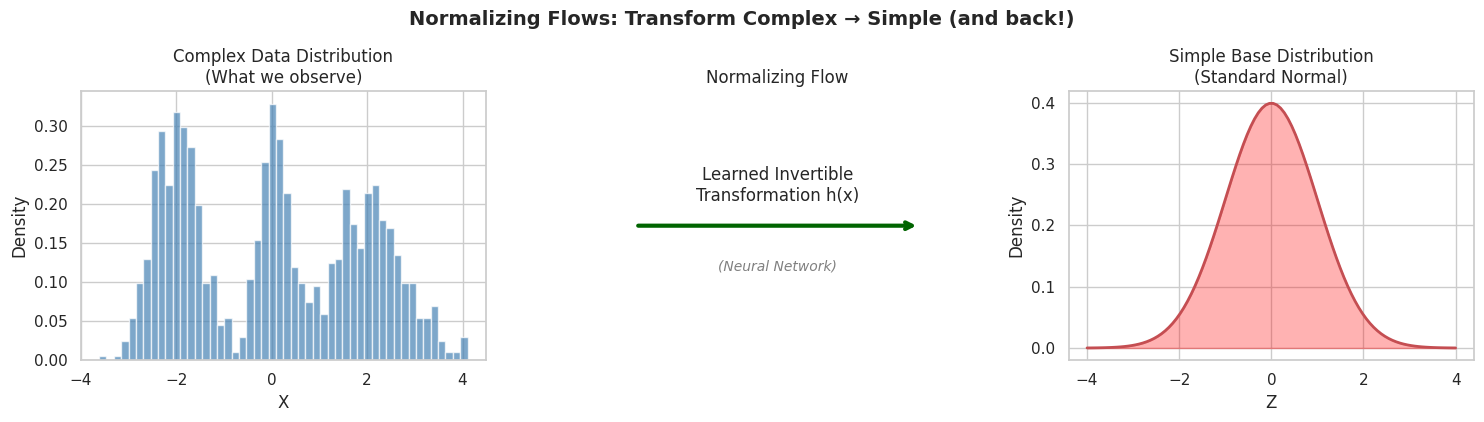

Key insight: Because the transformation is invertible, we can:
  1. Learn the transformation from data (complex → simple)
  2. Generate new samples by inverting (simple → complex)
  3. Intervene by fixing values and generating counterfactuals


In [ ]:
# Visualization: The idea of normalizing flows
# This is a simplified illustration - actual flows are more complex

from scipy import stats

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Panel 1: Complex original distribution (mixture of Gaussians)
np.random.seed(42)
x1 = np.concatenate([np.random.normal(-2, 0.5, 500),
                     np.random.normal(2, 0.8, 500),
                     np.random.normal(0, 0.3, 300)])
axes[0].hist(x1, bins=50, density=True, alpha=0.7, color='steelblue')
axes[0].set_title('Complex Data Distribution\n(What we observe)', fontsize=12)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Density')

# Panel 2: Arrow showing transformation
axes[1].annotate('', xy=(0.85, 0.5), xytext=(0.15, 0.5),
                 arrowprops=dict(arrowstyle='->', lw=3, color='darkgreen'),
                 xycoords='axes fraction')
axes[1].text(0.5, 0.65, 'Learned Invertible\nTransformation h(x)',
             ha='center', va='center', fontsize=12, transform=axes[1].transAxes)
axes[1].text(0.5, 0.35, '(Neural Network)',
             ha='center', va='center', fontsize=10, style='italic',
             transform=axes[1].transAxes, color='gray')
axes[1].axis('off')
axes[1].set_title('Normalizing Flow', fontsize=12)

# Panel 3: Standard normal (simple base distribution)
z = np.linspace(-4, 4, 100)
axes[2].plot(z, stats.norm.pdf(z), 'r-', lw=2)
axes[2].fill_between(z, stats.norm.pdf(z), alpha=0.3, color='red')
axes[2].set_title('Simple Base Distribution\n(Standard Normal)', fontsize=12)
axes[2].set_xlabel('Z')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.suptitle('Normalizing Flows: Transform Complex → Simple (and back!)',
             y=1.05, fontsize=14, fontweight='bold')
plt.show()

print("Key insight: Because the transformation is invertible, we can:")
print("  1. Learn the transformation from data (complex → simple)")
print("  2. Generate new samples by inverting (simple → complex)")
print("  3. Intervene by fixing values and generating counterfactuals")


## 2.5 The cGNF Workflow

The cGNF package provides a clean three-step workflow:

### Step 1: `process()` - Data Preprocessing
Prepares your dataset and adjacency matrix (DAG) for modeling.
- Handles missing values
- Dequantizes discrete variables (adds small noise for continuous modeling)
- Creates train/validation split

### Step 2: `train()` - Model Training  
Trains the normalizing flow model to learn the joint distribution.
- Uses neural networks to learn flexible transformations
- Respects the causal ordering from your DAG
- Early stopping prevents overfitting

### Step 3: `sim()` - Effect Estimation
Generates counterfactual estimates using Monte Carlo simulation.
- Intervenes on treatment variable(s)
- Simulates potential outcomes
- Computes average effects across samples

Let's walk through a complete example.


### Example 1: Simple Mediation (ATE and NDE/NIE)

Let's start with a basic mediation setup to estimate the total effect and its decomposition.

**Data Generating Process:**
- $C \sim \text{Bernoulli}(0.4)$ — Binary confounder
- $A \sim N(0.2C, 1)$ — Continuous treatment
- $M \sim \text{Logistic}(0.25A, 1)$ — Mediator
- $Y = 0.1A + 0.4M + 0.2C + \epsilon_Y$ — Outcome ($\epsilon_Y \sim \text{Laplace}(0,1)$)

**True Effects** (per unit change in A):
- Direct effect (A→Y): 0.1
- Indirect effect (A→M→Y): 0.25 × 0.4 = 0.1
- Total effect: 0.2


In [ ]:
# Generate synthetic data for simple mediation example
dataset_name = 'mediation_simple'
obs = 20000  # Number of observations

np.random.seed(2813308004)  # For reproducibility

# Generate variables according to the DAG
C = np.random.binomial(n=1, p=0.4, size=obs)  # Binary confounder
epsilon_A = np.random.normal(0, 1, obs)
epsilon_M = np.random.logistic(0, 1, obs)
epsilon_Y = np.random.laplace(0, 1, obs)

A = 0.2 * C + epsilon_A  # Treatment
M = 0.25 * A + epsilon_M  # Mediator
Y = 0.1 * A + 0.4 * M + 0.2 * C + epsilon_Y  # Outcome

# Create DataFrame and save
df = pd.DataFrame({'C': C, 'A': A, 'M': M, 'Y': Y})
df.to_csv(path + dataset_name + '.csv', index=False)

print(f"Generated {obs} observations")
print(f"\nData summary:")
print(df.describe().round(3))

print(f"\n" + "="*50)
print("TRUE EFFECTS (per unit change in A):")
print(f"  Direct effect (A→Y): 0.1")
print(f"  Indirect effect (A→M→Y): 0.25 × 0.4 = 0.1")
print(f"  Total effect: 0.2")
print("="*50)


Generated 20000 observations

Data summary:
               C          A          M          Y
count  20000.000  20000.000  20000.000  20000.000
mean       0.404      0.084      0.033      0.101
std        0.491      1.002      1.848      1.612
min        0.000     -3.724     -9.620     -8.130
25%        0.000     -0.590     -1.077     -0.818
50%        0.000      0.079      0.040      0.096
75%        1.000      0.759      1.148      1.027
max        1.000      4.362     10.376      8.887

TRUE EFFECTS (per unit change in A):
  Direct effect (A→Y): 0.1
  Indirect effect (A→M→Y): 0.25 × 0.4 = 0.1
  Total effect: 0.2


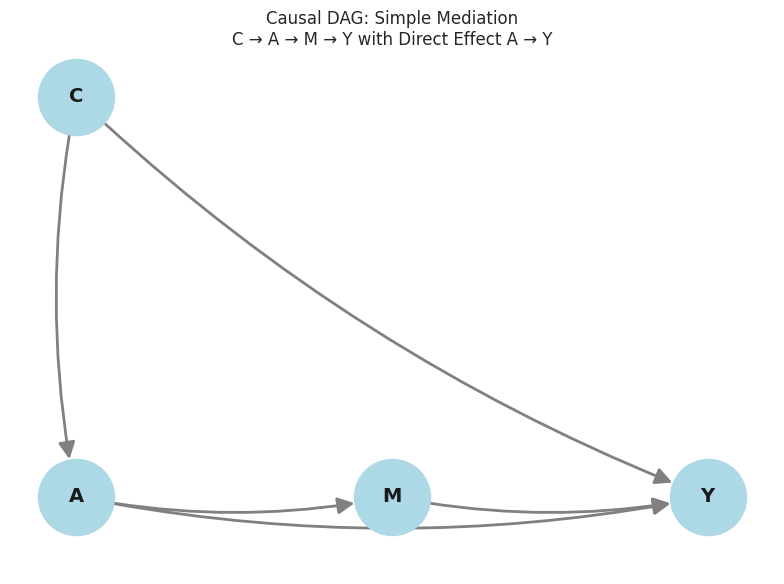


Adjacency Matrix (1 = edge from row to column):
   C  A  M  Y
C  0  1  0  1
A  0  0  1  1
M  0  0  0  1
Y  0  0  0  0

DAG saved to: /content/cgnf_tutorial/mediation_simple_DAG.csv


In [ ]:
# Define the causal DAG
simDAG = CausalGraphicalModel(
    nodes=["C", "A", "M", "Y"],
    edges=[
        ("C", "A"),  # C affects A
        ("C", "Y"),  # C affects Y (confounding)
        ("A", "M"),  # A affects M (mediator pathway)
        ("A", "Y"),  # A affects Y (direct effect)
        ("M", "Y")   # M affects Y (mediator effect)
    ]
)

# Draw the DAG using networkx (more reliable than graphviz in Colab)
fig, ax = plt.subplots(figsize=(8, 6))

# Get the networkx graph and define positions manually for clarity
G = simDAG.dag
pos = {
    'C': (0, 1),
    'A': (0, 0),
    'M': (1, 0),
    'Y': (2, 0)
}

# Draw the DAG
nx.draw(G, pos, ax=ax, with_labels=True,
        node_color='lightblue', node_size=3000,
        font_size=14, font_weight='bold',
        arrows=True, arrowsize=25, arrowstyle='-|>',
        edge_color='gray', width=2,
        connectionstyle="arc3,rad=0.1")

ax.set_title("Causal DAG: Simple Mediation\nC → A → M → Y with Direct Effect A → Y", fontsize=12)
plt.tight_layout()
plt.show()

# Convert to adjacency matrix and save
adj_matrix = nx.to_pandas_adjacency(simDAG.dag, dtype=int)
adj_matrix.to_csv(path + dataset_name + '_DAG.csv')

print("\nAdjacency Matrix (1 = edge from row to column):")
print(adj_matrix)
print(f"\nDAG saved to: {path}{dataset_name}_DAG.csv")


In [ ]:
# Step 1: Process the data
print("STEP 1: Data Preprocessing")
print("="*50)

process(
    path=path,
    dataset_name=dataset_name,
    dag_name=dataset_name + '_DAG',
    test_size=0.2,       # 20% validation set
    cat_var=['C'],       # Categorical variables (C is binary)
    seed=None            # Random seed (None for random)
)

print("\nPreprocessing complete!")
print(f"Output saved to: {path}{dataset_name}.pkl")
print("\nThis creates a pickle file containing:")
print("  - Preprocessed data (with dequantization for discrete vars)")
print("  - Train/validation split")
print("  - DAG structure information")


STEP 1: Data Preprocessing
------- Adjacency Matrix -------
   C  A  M  Y
C  0  1  0  1
A  0  0  1  1
M  0  0  0  1
Y  0  0  0  0

C: 2 categories - value: [1, 0]

Preprocessing complete!
Output saved to: /content/cgnf_tutorial/mediation_simple.pkl

This creates a pickle file containing:
  - Preprocessed data (with dequantization for discrete vars)
  - Train/validation split
  - DAG structure information


In [ ]:
# Step 2: Train the cGNF model
# Note: Training typically takes 10-30 minutes depending on data size and hardware

print("STEP 2: Model Training")
print("="*50)
print("Training the normalizing flow model...")
print("(This may take 10-30 minutes on CPU, faster with GPU)")
print()

model_name = 'model_simple'

train(
    path=path,
    dataset_name=dataset_name,
    model_name=model_name,

    # Training parameters
    trn_batch_size=128,      # Training batch size
    val_batch_size=2048,     # Validation batch size (larger for speed)
    learning_rate=1e-4,      # Learning rate
    nb_epoch=50000,          # Maximum epochs (early stopping usually kicks in earlier)
    nb_estop=50,             # Early stopping: stop if no improvement for 50 epochs
    val_freq=1,              # Validate every epoch

    # Network architecture
    emb_net=[90, 80, 70, 60, 50],   # Embedding network hidden layers
    int_net=[50, 40, 30, 20, 10],   # Integrand network hidden layers

    seed=8675309             # Random seed for reproducibility
)

print("\nTraining complete!")
print(f"Model saved to: {path}{model_name}/")


STEP 2: Model Training
Training the normalizing flow model...
(This may take 10-30 minutes on CPU, faster with GPU)

Running simulation with seed 8675309
Using GPU
['C', 'A', 'M', 'Y']
Data loaded.
Number of samples = trn:  16000,  val:   4000
Number of batches = trn:    125,  val:      2
------- iteration: 125 --------
Current n_estop: 1.0
epoch: 1 - batch: 125 - Current best validation loss:  inf - Validation loss: 6.073318 - Elapsed time per epoch 20.978159 (seconds)
------- New best validation loss --------
New best validation loss: 6.073318 
Saving best model...
------- iteration: 250 --------
Current n_estop: 1.0
epoch: 2 - batch: 125 - Current best validation loss: 6.073318 - Validation loss: 5.969150 - Elapsed time per epoch 20.733076 (seconds)
------- New best validation loss --------
New best validation loss: 5.969150 
Saving best model...
------- iteration: 375 --------
Current n_estop: 1.0
epoch: 3 - batch: 125 - Current best validation loss: 5.969150 - Validation loss: 5.9

### Model Diagnostics: Verifying Your Trained Model

**How do we know if the model trained well?**

Normalizing flows learn to transform complex data distributions into standard normal distributions. If training succeeded, passing our original data through the model should produce values that follow N(0,1).

```
Original Data          Trained Model          Latent Space
  (complex)     ─────────────────►     (should be N(0,1))
    P(X)               h(x)                   N(0,1)
```

**The diagnostic**:
1. Pass all training data through the model
2. Get the latent representations (z values)
3. Plot histograms of z against the standard normal PDF
4. If they match closely → model is well-trained!

This is a powerful visual check that students should always perform.


In [ ]:
# Model Diagnostic Function: Verify the trained model
import torch
import pickle
from scipy.stats import gaussian_kde, norm
import math

def diagnose_model(path, dataset_name, model_name, max_cols=6):
    """
    Diagnostic function to verify normalizing flow training.
    Passes original data through the trained model and plots
    the latent representations against standard normal.

    If the model is well-trained, the histograms should closely
    match the standard normal PDF (red line).
    """
    # Set device
    device = "cuda:0" if torch.cuda.is_available() else "cpu"

    # Load model
    model_path = os.path.join(path, model_name, '_best_model.pt')
    model = torch.load(model_path, map_location=device, weights_only=False)
    model = model.to(device)
    model.eval()

    # Load preprocessed data
    with open(path + dataset_name + '.pkl', 'rb') as f:
        data = pickle.load(f)

    df = data['df']
    variable_list = df.columns.tolist()
    df_tensor = torch.tensor(df.values, dtype=torch.float32).to(device)

    # Pass data through model (in batches to handle large datasets)
    z_list = []
    batch_size = 4096

    with torch.no_grad():
        for i in range(0, len(df_tensor), batch_size):
            batch = df_tensor[i:i+batch_size]
            z, _ = model(batch)
            z_list.append(z.cpu())

    z_all = torch.cat(z_list).numpy()
    z_df = pd.DataFrame(z_all, columns=variable_list)

    # Create diagnostic plots
    n_vars = len(variable_list)
    ncols = min(max_cols, n_vars)
    nrows = math.ceil(n_vars / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
    axes = np.atleast_1d(axes).ravel()

    for ax, col in zip(axes, variable_list):
        z_vals = z_df[col].values
        z_vals = z_vals[np.isfinite(z_vals)]

        # Standardize
        mu, sd = np.mean(z_vals), np.std(z_vals)
        if sd > 0:
            z_std = (z_vals - mu) / sd
        else:
            z_std = z_vals

        # Plot histogram
        ax.hist(z_std, bins=100, density=True, alpha=0.5, label='Model output')

        # Plot KDE
        if len(z_std) > 10 and np.std(z_std) > 0:
            kde = gaussian_kde(z_std)
            x_grid = np.linspace(-4, 4, 200)
            ax.plot(x_grid, kde(x_grid), 'b-', lw=1.5, label='KDE')

        # Plot standard normal
        x_grid = np.linspace(-4, 4, 200)
        ax.plot(x_grid, norm.pdf(x_grid), 'r--', lw=2, label='N(0,1)')

        ax.set_title(f'{col}\n(μ={mu:.3f}, σ={sd:.3f})', fontsize=10)
        ax.legend(fontsize=8)
        ax.set_xlim(-4, 4)

    # Hide unused axes
    for ax in axes[n_vars:]:
        ax.set_visible(False)

    plt.suptitle('Model Diagnostic: Latent Representations vs Standard Normal\n'
                 '(Good fit = histogram matches red dashed line)',
                 fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return z_df

print("Diagnostic function defined!")


Diagnostic function defined!


Running model diagnostics...
If the model is well-trained, each variable's histogram
should closely match the red dashed N(0,1) line.


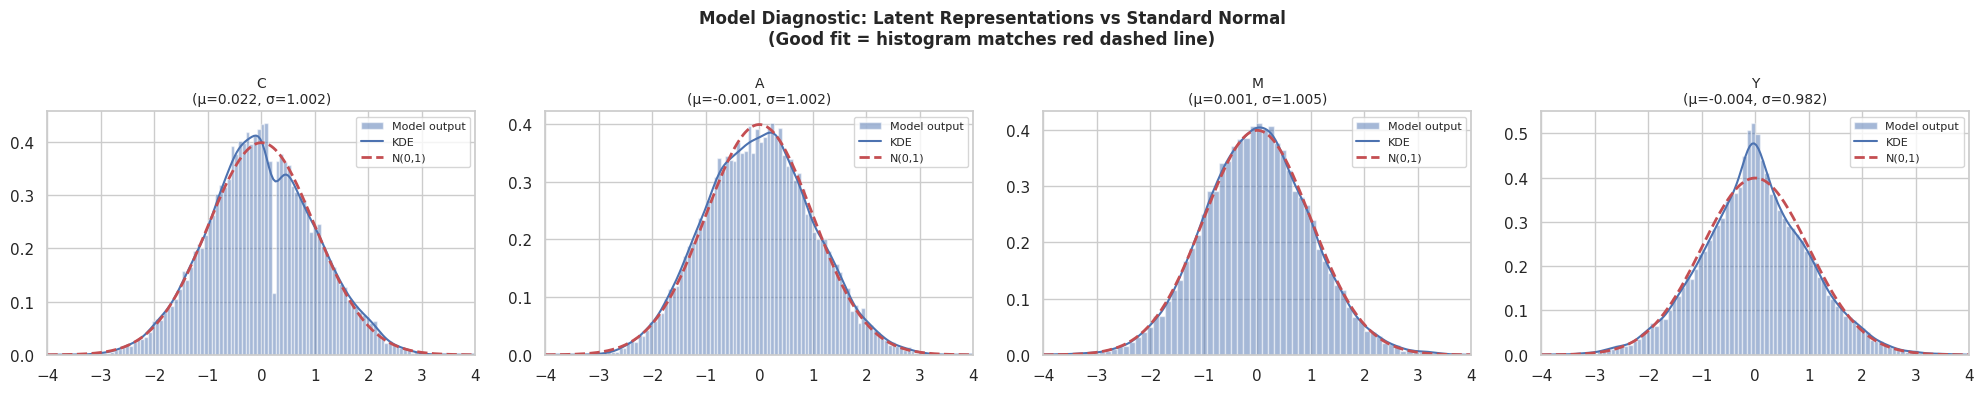


Diagnostic complete!
Look at the plots above:
  ✓ Good fit: Histogram closely follows the red N(0,1) line
  ✗ Poor fit: Histogram deviates significantly from N(0,1)


In [ ]:
# Run diagnostics on the trained model
print("Running model diagnostics...")
print("="*50)
print("If the model is well-trained, each variable's histogram")
print("should closely match the red dashed N(0,1) line.")
print("="*50)

z_latent = diagnose_model(path, dataset_name, model_name)

print("\nDiagnostic complete!")
print("Look at the plots above:")
print("  ✓ Good fit: Histogram closely follows the red N(0,1) line")
print("  ✗ Poor fit: Histogram deviates significantly from N(0,1)")


In [ ]:
# Step 3a: Estimate Average Total Effect (ATE)
print("STEP 3a: Estimate Average Total Effect (ATE)")
print("="*50)

# sim() generates potential outcomes by:
# 1. Setting treatment A to each value in cat_list
# 2. Simulating downstream variables (M, Y) from the learned model
# 3. Computing average outcomes for each treatment level

sim(
    path=path,
    dataset_name=dataset_name,
    model_name=model_name,
    n_mce_samples=50000,     # Number of Monte Carlo samples
    treatment='A',           # Treatment variable
    cat_list=[0, 1],         # Treatment contrast: A=0 vs A=1
    outcome='Y',             # Outcome variable
    mediator=None,           # No mediator = estimate total effect only
    moderator=None,          # No moderator = average effect (not conditional)
    inv_datafile_name='ATE'  # Output filename
)

print("\nATE estimation complete!")


STEP 3a: Estimate Average Total Effect (ATE)
Running simulation with seed 13181
E[Y(A=0)] = 0.07502324134111404
E[Y(A=1)] = 0.2516878843307495

ATE estimation complete!


In [ ]:
# Load and display ATE results
import glob

print("ATE Estimation Results:")
print("="*50)

# cGNF saves results directly in the path directory
ate_files = glob.glob(path + 'ATE*.csv')

if ate_files:
    for f in sorted(ate_files):
        if '_results' in f:  # Prioritize results file
            print(f"\nFile: {os.path.basename(f)}")
            df = pd.read_csv(f)
            print(df.to_string(index=False))
else:
    print("No ATE result files found yet.")
    print(f"Looking in: {path}")

print("\n" + "="*50)
print("INTERPRETATION:")
print("ATE = E[Y(A=1)] - E[Y(A=0)]")
print("True ATE (per unit A): 0.2")


ATE Estimation Results:

File: ATE_results.csv
Potential Outcome    Value
        E[Y(A=0)] 0.075023
        E[Y(A=1)] 0.251688

INTERPRETATION:
ATE = E[Y(A=1)] - E[Y(A=0)]
True ATE (per unit A): 0.2


In [ ]:
# Step 3b: Estimate Natural Direct and Indirect Effects (NDE/NIE)
print("STEP 3b: Estimate Natural Direct and Indirect Effects")
print("="*50)

# By specifying mediator=['M'], we decompose the total effect into:
# - NDE: Effect of A on Y NOT through M
# - NIE: Effect of A on Y through M

sim(
    path=path,
    dataset_name=dataset_name,
    model_name=model_name,
    n_mce_samples=50000,
    treatment='A',
    cat_list=[0, 1],
    outcome='Y',
    mediator=['M'],          # Specify mediator for decomposition!
    moderator=None,
    inv_datafile_name='NDE_NIE'
)

print("\nNDE/NIE estimation complete!")


STEP 3b: Estimate Natural Direct and Indirect Effects
Running simulation with seed 13776
E[Y(A=0)] = 0.08528245240449905
E[Y(A=1)] = 0.26026156544685364
E[Y(A=0, M(A=1))] = 0.2046414464712143
E[Y(A=1, M(A=0))] = 0.1419314444065094

NDE/NIE estimation complete!


In [ ]:
# Load and display NDE/NIE results
import glob

print("NDE/NIE Estimation Results:")
print("="*50)

# cGNF saves results directly in the path directory
nde_files = glob.glob(path + 'NDE_NIE*.csv')

if nde_files:
    for f in sorted(nde_files):
        if '_results' in f:
            print(f"\nFile: {os.path.basename(f)}")
            df = pd.read_csv(f)
            print(df.to_string(index=False))

            # Calculate NDE and NIE if possible
            if 'Value' in df.columns:
                values = dict(zip(df['Potential Outcome'], df['Value']))
                if 'E[Y(A=0)]' in values and 'E[Y(A=1, M(A=0))]' in values:
                    nde = values.get('E[Y(A=1, M(A=0))]', 0) - values.get('E[Y(A=0)]', 0)
                    print(f"\nCalculated NDE: {nde:.4f}")
                if 'E[Y(A=1)]' in values and 'E[Y(A=1, M(A=0))]' in values:
                    nie = values.get('E[Y(A=1)]', 0) - values.get('E[Y(A=1, M(A=0))]', 0)
                    print(f"Calculated NIE: {nie:.4f}")
else:
    print("No NDE/NIE result files found yet.")

print("\n" + "="*50)
print("TRUE VALUES:")
print(f"  NDE (Direct effect A→Y): 0.1")
print(f"  NIE (Indirect via M): 0.25 × 0.4 = 0.1")
print(f"  Total (NDE + NIE): 0.2")
print("="*50)


NDE/NIE Estimation Results:

File: NDE_NIE_results.csv
Potential Outcome    Value
        E[Y(A=0)] 0.085282
        E[Y(A=1)] 0.260262
E[Y(A=0, M(A=1))] 0.204641
E[Y(A=1, M(A=0))] 0.141931

Calculated NDE: 0.0566
Calculated NIE: 0.1183

TRUE VALUES:
  NDE (Direct effect A→Y): 0.1
  NIE (Indirect via M): 0.25 × 0.4 = 0.1
  Total (NDE + NIE): 0.2


## 2.6 Path-Specific Effects with Exposure-Induced Confounders

Now let's tackle the more challenging case: **multiple mediators with exposure-induced confounding**.

### The Setup

```
    C ────────────────────────────────────┐
    │       ─────────────┐                │
    ▼      |             ▼                ▼
    A ───► L ───► M ───► Y ◄──────────────┘
    │       │      ▲      ▲
    │       └──────┘      │
    │    (L confounds M-Y)│
    └─────────────────────┘
          (direct effect)
```

Here:
- **L** is an exposure-induced confounder (affected by A, confounds M→Y)
- Standard mediation methods would give biased estimates
- cGNF correctly handles this by modeling the full joint distribution

### True Data Generating Process

- $C \sim \text{Bernoulli}(0.4)$
- $A = 0.2C + \epsilon_A$
- $L = 0.2A + 0.2C + \epsilon_L$ (L is affected by A!)
- $M = 0.1A + 0.25L + 0.2C + \epsilon_M$
- $Y = 0.1A + 0.25L + 0.25M + 0.1C + \epsilon_Y$

**True Path-Specific Effects** (per unit A):
- $PSE_{A→Y}$ (direct): 0.1
- $PSE_{A→M→Y}$: 0.1 × 0.25 = 0.025
- $PSE_{A→L⇝Y}$: 0.2 × (0.25 + 0.25 × 0.25) = 0.0625
- Total: ≈0.19


In [ ]:
# Generate data with multiple mediators including exposure-induced confounder
dataset_name_pse = 'mediation_pse'
obs = 20000  # Number of observations

np.random.seed(42)

# Generate variables
C = np.random.binomial(n=1, p=0.4, size=obs)
epsilon_A = np.random.normal(0, 1, obs)
epsilon_L = np.random.normal(0, 1, obs)
epsilon_M = np.random.logistic(0, 1, obs)
epsilon_Y = np.random.laplace(0, 1, obs)

A = 0.2 * C + epsilon_A
L = 0.2 * A + 0.2 * C + epsilon_L          # L is affected by A!
M = 0.1 * A + 0.25 * L + 0.2 * C + epsilon_M
Y = 0.1 * A + 0.25 * L + 0.25 * M + 0.1 * C + epsilon_Y

# Save data
df_pse = pd.DataFrame({'C': C, 'A': A, 'L': L, 'M': M, 'Y': Y})
df_pse.to_csv(path + dataset_name_pse + '.csv', index=False)

print(f"Generated {obs} observations with exposure-induced confounder")
print("\nVariables:")
print("  C: Pre-treatment confounder")
print("  A: Treatment")
print("  L: First mediator (EXPOSURE-INDUCED CONFOUNDER of M→Y)")
print("  M: Second mediator")
print("  Y: Outcome")

print("\n" + "="*50)
print("WHY L IS PROBLEMATIC FOR STANDARD METHODS:")
print("  - L is caused by A (A → L)")
print("  - L confounds M → Y (L → M and L → Y)")
print("  - If we control for L: we block A → L → M (biased indirect effect)")
print("  - If we don't control for L: M → Y is confounded (biased direct effect)")
print("  - cGNF handles this correctly by modeling the full joint distribution")
print("="*50)


Generated 20000 observations with exposure-induced confounder

Variables:
  C: Pre-treatment confounder
  A: Treatment
  L: First mediator (EXPOSURE-INDUCED CONFOUNDER of M→Y)
  M: Second mediator
  Y: Outcome

WHY L IS PROBLEMATIC FOR STANDARD METHODS:
  - L is caused by A (A → L)
  - L confounds M → Y (L → M and L → Y)
  - If we control for L: we block A → L → M (biased indirect effect)
  - If we don't control for L: M → Y is confounded (biased direct effect)
  - cGNF handles this correctly by modeling the full joint distribution


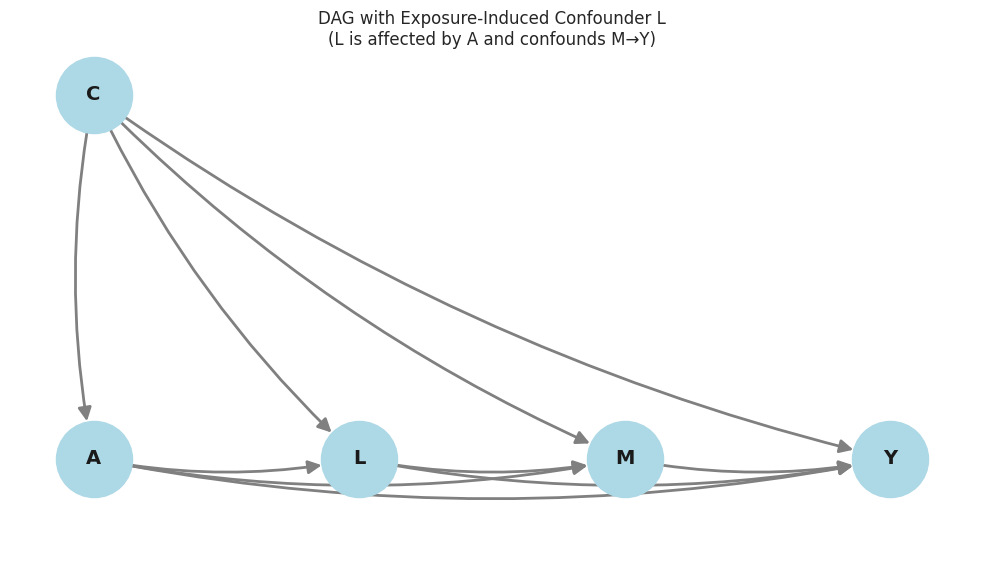


Adjacency Matrix:
   C  A  L  M  Y
C  0  1  1  1  1
A  0  0  1  1  1
L  0  0  0  1  1
M  0  0  0  0  1
Y  0  0  0  0  0

Note: L is an EXPOSURE-INDUCED CONFOUNDER
  - A affects L (A → L)
  - L confounds M → Y (L → M and L → Y)
  - This breaks traditional mediation methods!


In [ ]:
# Define DAG for path-specific effects example
simDAG_pse = CausalGraphicalModel(
    nodes=["C", "A", "L", "M", "Y"],
    edges=[
        ("C", "A"), ("C", "L"), ("C", "M"), ("C", "Y"),  # C affects all
        ("A", "L"), ("A", "M"), ("A", "Y"),              # A affects L, M, Y
        ("L", "M"), ("L", "Y"),                          # L affects M and Y
        ("M", "Y")                                        # M affects Y
    ]
)

# Draw the DAG using networkx (more reliable than graphviz in Colab)
fig, ax = plt.subplots(figsize=(10, 6))

G_pse = simDAG_pse.dag
# Manual positions for clear visualization
pos_pse = {
    'C': (0, 1.5),    # Confounder at top
    'A': (0, 0),      # Treatment at left
    'L': (1.5, 0),    # First mediator (exposure-induced confounder)
    'M': (3, 0),      # Second mediator
    'Y': (4.5, 0)     # Outcome at right
}

nx.draw(G_pse, pos_pse, ax=ax, with_labels=True,
        node_color='lightblue', node_size=3000,
        font_size=14, font_weight='bold',
        arrows=True, arrowsize=20,
        edge_color='gray', width=2,
        connectionstyle="arc3,rad=0.1")

ax.set_title("DAG with Exposure-Induced Confounder L\n(L is affected by A and confounds M→Y)", fontsize=12)
plt.tight_layout()
plt.show()

# Save adjacency matrix
adj_matrix_pse = nx.to_pandas_adjacency(simDAG_pse.dag, dtype=int)
adj_matrix_pse.to_csv(path + dataset_name_pse + '_DAG.csv')

print("\nAdjacency Matrix:")
print(adj_matrix_pse)
print("\nNote: L is an EXPOSURE-INDUCED CONFOUNDER")
print("  - A affects L (A → L)")
print("  - L confounds M → Y (L → M and L → Y)")
print("  - This breaks traditional mediation methods!")


In [ ]:
# Process and train for PSE example
print("Processing and training model for Path-Specific Effects...")
print("="*50)

# Process
process(
    path=path,
    dataset_name=dataset_name_pse,
    dag_name=dataset_name_pse + '_DAG',
    test_size=0.2,
    cat_var=['C'],
    seed=None
)

# Train
model_name_pse = 'model_pse'

train(
    path=path,
    dataset_name=dataset_name_pse,
    model_name=model_name_pse,
    trn_batch_size=128,
    val_batch_size=2048,
    learning_rate=1e-4,
    nb_epoch=50000,
    emb_net=[90, 80, 70, 60, 50],
    int_net=[50, 40, 30, 20, 10],
    nb_estop=50,
    val_freq=1,
    seed=8675309
)

print("\nTraining complete!")


Processing and training model for Path-Specific Effects...
------- Adjacency Matrix -------
   C  A  L  M  Y
C  0  1  1  1  1
A  0  0  1  1  1
L  0  0  0  1  1
M  0  0  0  0  1
Y  0  0  0  0  0

C: 2 categories - value: [0, 1]
Running simulation with seed 8675309
Using CPU
['C', 'A', 'L', 'M', 'Y']
Data loaded.
Number of samples = trn:  16000,  val:   4000
Number of batches = trn:    125,  val:      2
------- iteration: 125 --------
Current n_estop: 1.0
epoch: 1 - batch: 125 - Current best validation loss:  inf - Validation loss: 7.412824 - Elapsed time per epoch 29.929224 (seconds)
------- New best validation loss --------
New best validation loss: 7.412824 
Saving best model...
------- iteration: 250 --------
Current n_estop: 1.0
epoch: 2 - batch: 125 - Current best validation loss: 7.412824 - Validation loss: 7.367564 - Elapsed time per epoch 31.623512 (seconds)
------- New best validation loss --------
New best validation loss: 7.367564 
Saving best model...
------- iteration: 375 

Running diagnostics on PSE model...


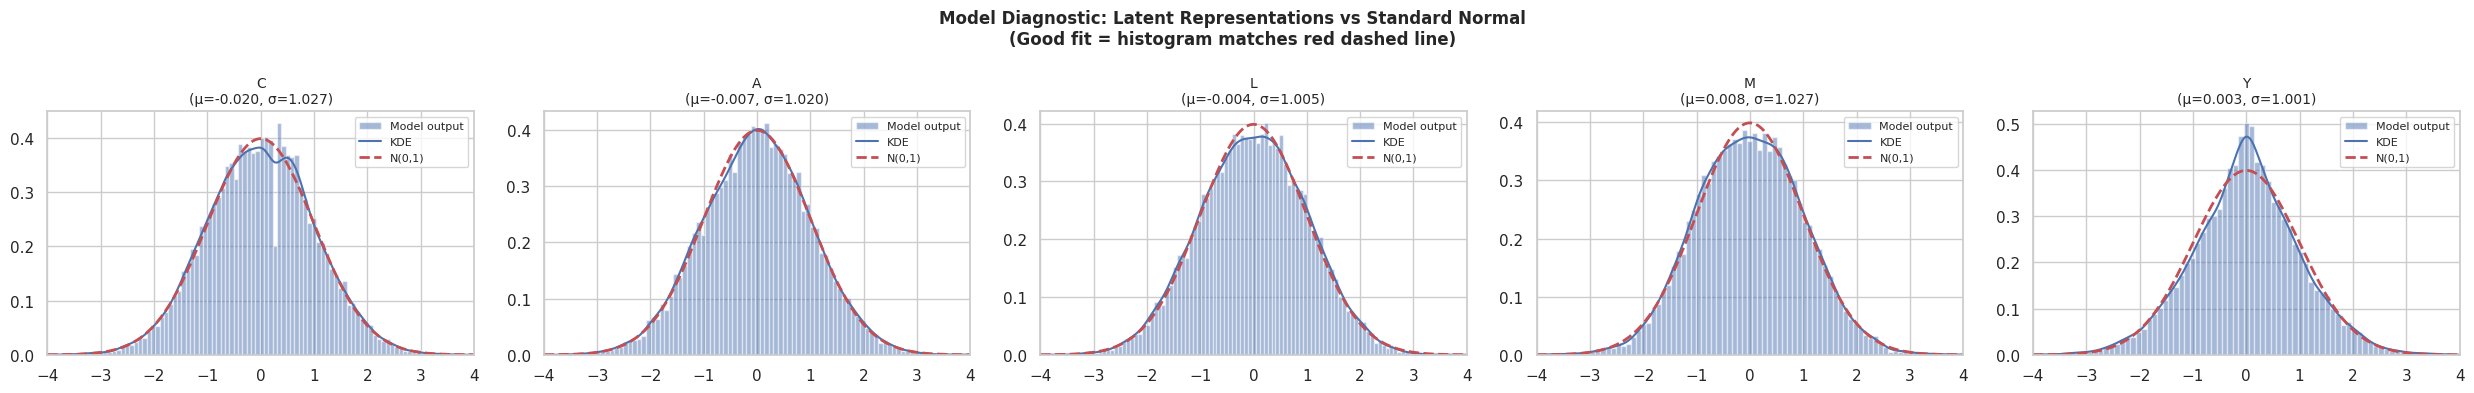


Diagnostic complete for PSE model!


In [ ]:
# Run diagnostics on the PSE model
print("Running diagnostics on PSE model...")
print("="*50)

z_latent_pse = diagnose_model(path, dataset_name_pse, model_name_pse)

print("\nDiagnostic complete for PSE model!")


In [ ]:
# Estimate Path-Specific Effects
print("Estimating Path-Specific Effects")
print("="*50)

# By specifying mediator=['L', 'M'] in causal order,
# we get decomposition into:
# - PSE_{A→Y}: Direct effect
# - PSE_{A→M→Y}: Effect through M only (not L)
# - PSE_{A→L⇝Y}: Effect through L (including L→M→Y)

sim(
    path=path,
    dataset_name=dataset_name_pse,
    model_name=model_name_pse,
    n_mce_samples=50000,
    treatment='A',
    cat_list=[0, 1],
    outcome='Y',
    mediator=['L', 'M'],  # BOTH mediators in causal order!
    moderator=None,
    inv_datafile_name='PSE'
)

print("\nPSE estimation complete!")


Estimating Path-Specific Effects
Running simulation with seed 13776


In [ ]:
# Load and display PSE results
import glob

print("Path-Specific Effects Results:")
print("="*50)

# cGNF saves results directly in the path directory
pse_files = glob.glob(path + 'PSE*.csv')

if pse_files:
    for f in sorted(pse_files):
        if '_results' in f:
            print(f"\nFile: {os.path.basename(f)}")
            df = pd.read_csv(f)
            print(df.to_string(index=False))
else:
    print("No PSE result files found yet.")

print("\n" + "="*50)
print("INTERPRETATION OF PATH-SPECIFIC EFFECTS:")
print("="*50)
print("\n1. PSE_{A→Y} (Direct effect):")
print("   The effect of A on Y NOT operating through any mediator")
print("   True value: 0.1")

print("\n2. PSE_{A→M→Y} (Through M only):")
print("   The effect of A on Y through M, but NOT through L")
print("   True value: 0.1 × 0.25 = 0.025")

print("\n3. PSE_{A→L⇝Y} (Through L, including L→M→Y):")
print("   The effect of A on Y through L (and all paths from L)")
print("   True value: 0.2 × (0.25 + 0.25×0.25) ≈ 0.0625")

print("\n4. Total Effect:")
print("   Sum of all path-specific effects ≈ 0.19")


## 2.7 Summary: cGNF for Causal Mediation

### What We Learned

1. **Causal mediation goes beyond total effects** to understand mechanisms—how treatments affect outcomes through different pathways.

2. **Natural effects require cross-world counterfactuals**, which are challenging to estimate with standard regression.

3. **Exposure-induced confounders** (variables affected by treatment that confound mediator-outcome relationships) break traditional mediation methods.

4. **cGNF solves these problems** by:
   - Modeling the full joint distribution with normalizing flows
   - Respecting the causal structure from the DAG
   - Computing effects through Monte Carlo simulation of counterfactuals

### The Deep Learning Advantage

The key benefit of cGNF (and deep learning for causal inference more broadly) is **avoiding functional form assumptions**:

| Aspect | Traditional Methods | cGNF |
|--------|--------------------|----|
| **Functional form** | Must specify (linear, logistic, etc.) | Learned from data |
| **Error distribution** | Must assume (Gaussian, etc.) | Learned from data |
| **Interactions** | Must specify explicitly | Captured automatically |
| **Misspecification risk** | High | Minimal |

This flexibility is especially valuable when:
- Relationships are likely non-linear
- You don't know the true functional form
- Multiple complex pathways exist

### The Tradeoff: Inference Challenges

However, this flexibility comes at a cost. Traditional parametric methods have well-understood **asymptotic properties**:
- $\sqrt{n}$-consistency (converges at rate $1/\sqrt{n}$)
- Asymptotic normality (enables confidence intervals)
- Efficient inference (Cramér-Rao bound)

Deep learning methods like cGNF face **inference challenges**:
- **Slower convergence rates**: Non-parametric methods typically converge slower than $\sqrt{n}$
- **Unknown asymptotics**: The sampling distribution of estimates is harder to characterize
- **Bootstrap uncertainty**: We rely on bootstrap for confidence intervals, which adds computational cost

**This is the fundamental bias-variance tradeoff in causal inference:**
- Parametric methods: risk bias from misspecification, but have clean inference
- Non-parametric methods: reduce misspecification bias, but complicate inference

### Bridge to Module 3: Debiased Machine Learning

If you want the **flexibility of machine learning** with **valid statistical inference**, Module 3 on **Double/Debiased Machine Learning (DML)** offers a solution.

DML achieves the best of both worlds by:
1. Using flexible ML models for nuisance parameters (confounding adjustment)
2. Constructing **orthogonal/debiased** estimating equations
3. Achieving $\sqrt{n}$-consistent, asymptotically normal estimates

**Key insight**: DML separates "prediction" (where ML flexibility helps) from "inference" (where parametric properties are needed).

So the progression is:
- **Module 2 (cGNF)**: Maximum flexibility for complex mediation, inference via bootstrap
- **Module 3 (DML)**: ML flexibility + valid parametric inference for treatment effects

### The cGNF Workflow

| Step | Function | Purpose |
|------|----------|---------|
| 1 | `process()` | Prepare data and DAG |
| 2 | `train()` | Learn the joint distribution |
| 3 | `sim()` | Estimate causal effects |

### Key Parameters in `sim()`

| Parameter | Purpose | Example |
|-----------|---------|---------|
| `treatment` | Focal treatment variable | `'A'` |
| `outcome` | Outcome variable | `'Y'` |
| `cat_list` | Treatment contrast values | `[0, 1]` |
| `mediator` | Mediator(s) for decomposition | `None`, `['M']`, or `['L', 'M']` |
| `moderator` | Variable for conditional effects (CATE) | `'C'` or `None` |
| `n_mce_samples` | Monte Carlo samples (more = more precise) | `50000` |

### When to Use cGNF

✅ **Use cGNF when:**
- You have exposure-induced confounders
- Multiple mediators with complex relationships
- Non-linear relationships or effect heterogeneity
- You need path-specific effect decomposition
- You're willing to use bootstrap for inference

⚠️ **Consider simpler methods or DML when:**
- Simple mediation with no exposure-induced confounding
- Valid inference (confidence intervals, p-values) is critical
- You have very small sample sizes
- Computational resources are limited


## 2.8 Exercises

### Exercise 1: Conceptual Understanding

For a research question in your field:

1. **Define your variables**: What is your treatment (A), outcome (Y), and potential mediator(s)?
2. **Draw the DAG**: Show all causal relationships you assume
3. **Identify exposure-induced confounders**: Are there any variables affected by A that also confound a mediator-outcome relationship?
4. **Explain why this matters**: How would an exposure-induced confounder bias traditional mediation estimates?


In [ ]:
# Exercise 1: Define your research question

# Define your variables
my_variables = {
    'treatment': '',           # Your treatment variable
    'outcome': '',             # Your outcome variable
    'mediators': [],           # List of mediator(s) in causal order
    'confounders': [],         # Pre-treatment confounders
    'exposure_induced': []     # Exposure-induced confounders (affected by A, confound M→Y)
}

# Draw your DAG (modify edges as needed)
# my_dag = CausalGraphicalModel(
#     nodes=['C', 'A', 'M', 'Y'],
#     edges=[('C', 'A'), ('C', 'Y'), ('A', 'M'), ('A', 'Y'), ('M', 'Y')]
# )
# my_dag.draw()
# plt.show()

# Explain how an exposure-induced confounder would bias traditional estimates:
explanation = '''
Your explanation here:

If L is an exposure-induced confounder:
- Traditional approach controlling for L: ...
- Traditional approach NOT controlling for L: ...
- Why cGNF handles this correctly: ...
'''

print(explanation)


### Exercise 1b: Interpreting Model Diagnostics

Look at the diagnostic plots generated above for both the simple mediation model and the PSE model.

1. **Quality Assessment**: Do the latent distributions (histograms) closely match the standard normal (red dashed line)? Which variables show the best/worst fit?

2. **What could cause poor fit?**
   - Insufficient training epochs?
   - Learning rate too high/low?
   - Model architecture too simple for the data complexity?
   - Not enough training data?

3. **Practical implications**: If a variable's latent distribution deviates significantly from N(0,1), how might this affect the causal effect estimates involving that variable?


In [ ]:
# Exercise 1b: Your diagnostic interpretation

diagnostic_interpretation = {
    'best_fit_variable': '',      # Which variable had the best N(0,1) fit?
    'worst_fit_variable': '',     # Which variable had the worst fit?
    'overall_quality': '',        # 'excellent', 'good', 'acceptable', 'poor'
    'potential_issues': [],       # List any concerns
}

# What would you try if the fit was poor?
improvement_strategies = '''
If the diagnostic plots showed poor fit, I would try:
1. ...
2. ...
3. ...
'''

print(improvement_strategies)


### Exercise 2: Compare Methods with Exposure-Induced Confounding

Using the PSE dataset we generated (with exposure-induced confounder L):

1. **Traditional approach (Baron-Kenny style)**:
   - Estimate the direct effect using regression of Y on A, controlling for M (and optionally L)
   - What do you get if you control for L? If you don't?

2. **Compare with cGNF**:
   - How do the cGNF estimates compare to the traditional approach?
   - Which is closer to the true values?


In [ ]:
# Exercise 2: Compare traditional vs cGNF approaches
from sklearn.linear_model import LinearRegression

# Load the PSE data
df_ex2 = pd.read_csv(path + dataset_name_pse + '.csv')

print("Traditional Regression Approaches:")
print("="*60)

# Approach 1: Regress Y on A and M (don't control for L)
model1 = LinearRegression()
model1.fit(df_ex2[['A', 'M']], df_ex2['Y'])
print(f"\n1. Y ~ A + M (NOT controlling for L):")
print(f"   Coefficient on A (direct effect estimate): {model1.coef_[0]:.4f}")
print(f"   TRUE direct effect: 0.1")
print(f"   BIAS: {model1.coef_[0] - 0.1:.4f} (L confounds M→Y!)")

# Approach 2: Regress Y on A, M, and L (control for L)
model2 = LinearRegression()
model2.fit(df_ex2[['A', 'M', 'L']], df_ex2['Y'])
print(f"\n2. Y ~ A + M + L (controlling for L):")
print(f"   Coefficient on A (direct effect estimate): {model2.coef_[0]:.4f}")
print(f"   TRUE direct effect: 0.1")
print(f"   Note: This is correct for direct effect, but...")

# The problem: indirect effect estimation
model_m = LinearRegression()
model_m.fit(df_ex2[['A', 'L', 'C']], df_ex2['M'])
print(f"\n3. Indirect effect estimation problem:")
print(f"   If we control for L in the M equation:")
print(f"     Coefficient A→M: {model_m.coef_[0]:.4f} (TRUE: 0.1)")
print(f"   Product-of-coefficients indirect: {model_m.coef_[0] * model2.coef_[1]:.4f}")
print(f"   BUT this misses the A→L→M pathway!")

print("\n" + "="*60)
print("CONCLUSION: Traditional methods face an impossible tradeoff.")
print("cGNF avoids this by modeling the full joint distribution.")


### Exercise 3: Apply cGNF to Your Own Data

Using your own dataset (or a public dataset relevant to your research):

1. **Prepare your data**: Create a CSV with your variables
2. **Specify the DAG**: Define the causal structure as an adjacency matrix
3. **Choose your estimand**: Which effect(s) do you want to estimate?
4. **Run the analysis**: Use the cGNF workflow
5. **Interpret results**: What do the estimated effects tell you about causal mechanisms?


In [ ]:
# Exercise 3: Apply cGNF to your own data

# Step 1: Load your data
# my_data = pd.read_csv('your_data.csv')
# my_dataset_name = 'mydata'
# my_data.to_csv(path + my_dataset_name + '.csv', index=False)

# Step 2: Define your DAG
# my_dag = CausalGraphicalModel(
#     nodes=['C', 'A', 'M', 'Y'],  # Your variables
#     edges=[  # Your causal structure
#         ('C', 'A'), ('C', 'Y'),
#         ('A', 'M'), ('A', 'Y'),
#         ('M', 'Y')
#     ]
# )
# adj_mat = nx.to_pandas_adjacency(my_dag.dag, dtype=int)
# adj_mat.to_csv(path + my_dataset_name + '_DAG.csv')

# Step 3: Process
# process(
#     path=path,
#     dataset_name=my_dataset_name,
#     dag_name=my_dataset_name + '_DAG',
#     test_size=0.2,
#     cat_var=['list_your_categorical_vars'],
#     seed=42
# )

# Step 4: Train
# train(
#     path=path,
#     dataset_name=my_dataset_name,
#     model_name='my_model',
#     trn_batch_size=128,
#     val_batch_size=2048,
#     learning_rate=1e-4,
#     nb_epoch=50000,
#     emb_net=[90, 80, 70, 60, 50],
#     int_net=[50, 40, 30, 20, 10],
#     nb_estop=50,
#     val_freq=1,
#     seed=42
# )

# Step 5: Estimate your chosen effect
# For ATE:
# sim(path=path, dataset_name=my_dataset_name, model_name='my_model',
#     treatment='A', outcome='Y', cat_list=[0, 1],
#     mediator=None, moderator=None, inv_datafile_name='ATE')

# For NDE/NIE:
# sim(path=path, dataset_name=my_dataset_name, model_name='my_model',
#     treatment='A', outcome='Y', cat_list=[0, 1],
#     mediator=['M'], moderator=None, inv_datafile_name='NDE_NIE')

# For PSE with multiple mediators:
# sim(path=path, dataset_name=my_dataset_name, model_name='my_model',
#     treatment='A', outcome='Y', cat_list=[0, 1],
#     mediator=['L', 'M'], moderator=None, inv_datafile_name='PSE')

print("Uncomment and modify the code above to analyze your own data!")


## References

### cGNF Package and Tutorials
- **cGNF Package**: [github.com/cGNF-Dev/cGNF](https://github.com/cGNF-Dev/cGNF)
- **Tutorials**: [github.com/cGNF-Dev/cGNF-Tutorials](https://github.com/cGNF-Dev/cGNF-Tutorials)
- **Paper Replication**: [github.com/gtwodtke/deep_learning_with_DAGs](https://github.com/gtwodtke/deep_learning_with_DAGs)

### Core Papers
1. **Balgi, S., Daoud, A., Peña, J. M., Wodtke, G. T., & Zhou, J.** "Deep Learning with DAGs." *Working Paper*.

2. **Balgi, S., Peña, J. M., & Daoud, A.** (2022). Personalized public policy analysis using causal-graphical normalizing flows. *Proceedings of the 36th AAAI Conference on Artificial Intelligence*, 11810-11818.

### Causal Mediation
3. **Pearl, J.** (2001). Direct and indirect effects. *Proceedings of UAI*, 411-420.

4. **VanderWeele, T. J.** (2015). *Explanation in Causal Inference: Methods for Mediation and Interaction*. Oxford University Press.

5. **Avin, C., Shpitser, I., & Pearl, J.** (2005). Identifiability of path-specific effects. *Proceedings of IJCAI*, 357-363.

6. **Robins, J. M., & Greenland, S.** (1992). Identifiability and exchangeability for direct and indirect effects. *Epidemiology*, 3(2), 143-155.

### Normalizing Flows
7. **Papamakarios, G., Nalisnick, E., Rezende, D. J., Mohamed, S., & Lakshminarayanan, B.** (2021). Normalizing flows for probabilistic modeling and inference. *Journal of Machine Learning Research*, 22(57), 1-64.

8. **Kobyzev, I., Prince, S. J., & Brubaker, M. A.** (2020). Normalizing flows: An introduction and review of current methods. *IEEE Transactions on Pattern Analysis and Machine Intelligence*, 43(11), 3964-3979.


# Module 3: Double/Debiased Machine Learning (DML)

Double/Debiased Machine Learning (DML) is a powerful method for causal inference that has gained significant attention in recent years. The method is proposed by Chernozhukov etc. in 2018 ([link](https://academic.oup.com/ectj/article/21/1/C1/5056401?login=true)). In this practical guide, we will briefly explore what DML is, how it works, and implement it using the [DoubleML](https://docs.doubleml.org/stable/index.html#doubleml-package) package.

<font color='red'><p>Please select A100 device for this colab exercise.<p></font>

In [ ]:
!pip install --upgrade scikit-learn==1.5.0 --quiet
!pip install --upgrade scikeras==0.13.0 --quiet
import scikeras
from scikeras.wrappers import KerasRegressor, KerasClassifier

# Install DoubleML package if not already installed
try:
    import doubleml
except ImportError:
    !pip install doubleml --quiet
    import doubleml

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import gc
import numpy as np
import pandas as pd
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# Build LightGBM with GPU support
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import doubleml
from doubleml import DoubleMLData, DoubleMLPLR
from doubleml.datasets import make_plr_CCDDHNR2018

# Load tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set plotting styles
sns.set_theme(style="whitegrid")
face_colors = sns.color_palette('pastel')
edge_colors = sns.color_palette('dark')

In [ ]:
print("tensorflow:", tf.__version__)
print("scikit-learn:", sklearn.__version__)
print("doubleml:", doubleml.__version__)
print("scikeras:", scikeras.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

## DML Basics
### Data generating process

To understand the spirit of DML, we can first think through a data-generating process (DGP) such that:

$$
y_i = \theta_0 d_i + g_0(x_i) + \zeta_i, \quad \zeta_i \sim N(0, 1),
$$

$$
d_i = m_0(x_i) + v_i, \quad v_i \sim N(0, 1),
$$

with covariates $x_i \sim N(0, \Sigma)$, where $\Sigma$ is a matrix with entries $\Sigma_{kj} = 0.7^{|j-k|}$. We are interested in performing valid inference on the causal parameter $\theta_0$. The true parameter $\theta_0$ is set to 0.5 in our simulation experiment.

Here, the nuisance functions are given by

$$
m_{0}(x_{i})=x_{i,1}+\frac{1}{4} \frac{exp\left( x_{i,3} \right)}{1+exp\left( x_{i,3} \right)},
$$

$$
g_{0}(x_{i})=\frac{exp\left( x_{i,1} \right)}{1+exp(x_{i,1})} +\frac{1}{4} x_{i,3}.
$$

We generate `n_rep` replications of the data generating process with sample size `n_obs` and compare the performance of different estimators.

In [ ]:
np.random.seed(60615)
n_rep = 1000
n_obs = 500
n_vars = 5
alpha = 0.5

data = list()

# In Python the data can be generated with doubleml.datasets.make_plr_CCDDHNR2018().
for i_rep in range(n_rep):
    (x, y, d) = make_plr_CCDDHNR2018(alpha=alpha, n_obs=n_obs, dim_x=n_vars, return_type='array')
    data.append((x, y, d))

### Regularization Bias in Simple ML-Approaches

Naive inference that is based on a direct application of machine learning methods to estimate the causal parameter $θ_0$, is generally invalid. The use of machine learning methods introduces a bias that arises due to regularization. A simple ML approach is given by randomly splitting the sample into two parts. On the auxiliary sample indexed by $i ∈ I^C$ the nuisance function $g_0(X)$ is estimated with an ML method, for example a decision tree or a MLP learner. Given the estimate $\hat{g_0}(X)$, the final estimate of $θ_0$
 is obtained as ($n=N/2$) using the other half of observations indexed with $i \in I$

 $$
 \hat{\theta_{0}} =\left( \frac{1}{n} \sum_{i\in I} D_{i}^{2} \right)^{-1} \frac{1}{n} \sum_{i\in I} D_{i}\left( Y_{i}-\hat{g_{0}} \left( X_{i} \right) \right).
 $$

As this corresponds to a “non-orthogonal” score, which is not implemented in the DoubleML package, we need to define a custom callable.

In [ ]:
def non_orth_score(y, d, l_hat, m_hat, g_hat, smpls):
    u_hat = y - g_hat
    psi_a = -np.multiply(d, d)
    psi_b = np.multiply(d, u_hat)
    return psi_a, psi_b

Remark that the estimator is not able to estimate $\hat{g_0}(X)$ directly, but has to be based on a preliminary estimate of $\hat{m_0}(X)$. All following estimators with `score="IV-type"` are based on the same preliminary procedure. Furthermore, remark that we are using external predictions to avoid cross-fitting (for demonstration purposes).

In [ ]:
# Decision tree model (~10min)
np.random.seed(60615)

ml_l = LGBMRegressor(n_estimators=300, learning_rate=0.1, verbose=-1)
ml_m = LGBMRegressor(n_estimators=300, learning_rate=0.1, verbose=-1)

ml_g = clone(ml_l)

theta_nonorth_dt = np.full(n_rep, np.nan)
se_nonorth_dt = np.full(n_rep, np.nan)

for i_rep in tqdm(range(n_rep), total=n_rep):
    print(f'Replication {i_rep+1}/{n_rep}', end='\r')
    (x, y, d) = data[i_rep]

    # choose a random sample for training and estimation
    i_train, i_est = train_test_split(np.arange(n_obs), test_size=0.5, random_state=42)

    # fit the ML algorithms on the training sample
    ml_l.fit(x[i_train, :], y[i_train])
    ml_m.fit(x[i_train, :], d[i_train])

    psi_a = -np.multiply(d[i_train] - ml_m.predict(x[i_train, :]), d[i_train] - ml_m.predict(x[i_train, :]))
    psi_b = np.multiply(d[i_train] - ml_m.predict(x[i_train, :]), y[i_train] - ml_l.predict(x[i_train, :]))
    theta_initial = -np.nanmean(psi_b) / np.nanmean(psi_a)
    ml_g.fit(x[i_train, :], y[i_train] - theta_initial * d[i_train])

    # create out-of-sample predictions
    l_hat = ml_l.predict(x[i_est, :])
    m_hat = ml_m.predict(x[i_est, :])
    g_hat = ml_g.predict(x[i_est, :])

    external_predictions = {
        'd': {
            'ml_l': l_hat.reshape(-1, 1),
            'ml_m': m_hat.reshape(-1, 1),
            'ml_g': g_hat.reshape(-1, 1)
        }
    }

    obj_dml_data = DoubleMLData.from_arrays(x[i_est, :], y[i_est], d[i_est])
    obj_dml_plr_nonorth = DoubleMLPLR(obj_dml_data,
                                    ml_l, ml_m, ml_g,
                                    n_folds=2,
                                    score=non_orth_score)
    obj_dml_plr_nonorth.fit(external_predictions=external_predictions)
    theta_nonorth_dt[i_rep] = obj_dml_plr_nonorth.coef[0]
    se_nonorth_dt[i_rep] = obj_dml_plr_nonorth.se[0]

fig_non_orth, ax = plt.subplots(constrained_layout=True);
ax = sns.histplot((theta_nonorth_dt - alpha)/se_nonorth_dt,
                color=face_colors[0], edgecolor = edge_colors[0],
                stat='density', bins=30, label='Non-orthogonal DT');
ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
ax.set_xlim([-6., 6.]);
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');
plt.show()

Next, we implement the same process but change the model to a one-layer multi-layer perceptron. This is intended to demonstrate that DL models also suffer from the same biases as traditional ML algorithms. You can simply re-run the two code chunks below yourself. Note that we shrink the `n_rep` significantly to 1/5, as it is extremely time-consuming.

In [ ]:
# Ensure GPU is configured
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu, False)
    print("GPU is available and configured.")
else:
    print("Using CPU.")

def create_mlp_model(
    n_features,
    n_hidden=32,
    learning_rate=0.01
):
    model = Sequential()
    model.add(Dense(n_hidden, activation='relu', input_shape=(n_features,)))
    model.add(Dense(1, activation='linear'))

    model.compile(
        loss='mean_squared_error',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[]
    )
    return model

# Early stopping to limit unnecessary epochs once validation loss plateaus
early_stop = EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
# Example: single-hidden-layer MLP (~30min)
# Build KerasRegressor pipelines using SciKeras + StandardScaler
ml_l_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", KerasRegressor(
        model=create_mlp_model,
        n_features=x.shape[1],
        n_hidden=32,            # single hidden layer of size 32
        learning_rate=0.01,
        epochs=20,
        batch_size=64,
        verbose=0,
        callbacks=[early_stop]
    ))
])

ml_m_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", KerasRegressor(
        model=create_mlp_model,
        n_features=x.shape[1],
        n_hidden=32,
        learning_rate=0.01,
        epochs=20,
        batch_size=64,
        verbose=0,
        callbacks=[early_stop]
    ))
])

ml_g_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", KerasRegressor(
        model=create_mlp_model,
        n_features=x.shape[1],
        n_hidden=32,
        learning_rate=0.01,
        epochs=20,
        batch_size=64,
        verbose=0,
        callbacks=[early_stop]
    ))
])

small_n_rep = int(n_rep / 5)
theta_nonorth_mlp = np.full(small_n_rep, np.nan)
se_nonorth_mlp    = np.full(small_n_rep, np.nan)

with tf.device('/GPU:0'):  # Ensure GPU usage in Colab
    for i_rep in tqdm(range(small_n_rep), total=small_n_rep):
        (x_i, y_i, d_i) = data[i_rep]

        i_train, i_est = train_test_split(
            np.arange(n_obs),
            test_size=0.5,
            random_state=42
        )

        # Fit ml_l and ml_m on the training sample
        ml_l_mlp.fit(x_i[i_train, :], y_i[i_train])
        ml_m_mlp.fit(x_i[i_train, :], d_i[i_train])

        # Compute initial guess for partial out
        d_hat_train = ml_m_mlp.predict(x_i[i_train, :])
        y_hat_train = ml_l_mlp.predict(x_i[i_train, :])

        psi_a = -(d_i[i_train] - d_hat_train) * (d_i[i_train] - d_hat_train)
        psi_b =  (d_i[i_train] - d_hat_train) * (y_i[i_train] - y_hat_train)
        theta_initial = -np.nanmean(psi_b) / np.nanmean(psi_a)

        # Fit ml_g on (y_i - theta_initial * d_i)
        residual_for_g = y_i[i_train] - theta_initial * d_i[i_train]
        ml_g_mlp.fit(x_i[i_train, :], residual_for_g)

        # Out-of-sample predictions
        l_hat = ml_l_mlp.predict(x_i[i_est, :])
        m_hat = ml_m_mlp.predict(x_i[i_est, :])
        g_hat = ml_g_mlp.predict(x_i[i_est, :])

        # Provide these to DoubleML
        external_predictions = {
            'd': {
                'ml_l': l_hat.reshape(-1, 1),
                'ml_m': m_hat.reshape(-1, 1),
                'ml_g': g_hat.reshape(-1, 1)
            }
        }

        # DoubleML data & fit
        obj_dml_data = DoubleMLData.from_arrays(
            x_i[i_est, :], y_i[i_est], d_i[i_est]
        )
        obj_dml_plr_nonorth = DoubleMLPLR(
            obj_dml_data,
            ml_l_mlp,
            ml_m_mlp,
            ml_g_mlp,
            n_folds=2,
            score=non_orth_score
        )
        obj_dml_plr_nonorth.fit(external_predictions=external_predictions)

        theta_nonorth_mlp[i_rep] = obj_dml_plr_nonorth.coef[0]
        se_nonorth_mlp[i_rep]    = obj_dml_plr_nonorth.se[0]

# Visualization
fig_non_orth_mlp, ax = plt.subplots(constrained_layout=True)
ax = sns.histplot(
    (theta_nonorth_mlp - alpha) / se_nonorth_mlp,
    color = face_colors[1], edgecolor = edge_colors[1],
    stat='density',
    bins=30,
    label='Non-orthogonal MLP'
)
ax.axvline(0., color='k')
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.set_xlim([-6., 6.])
ax.set_xlabel('$(\\hat{\\theta}_0 - \\theta_0)/\\hat{\\sigma}$')
plt.show()

The regularization bias in the simple ML-approach is caused by the slow convergence of $\hat{\theta}_0$

$$
|\sqrt{n} (\hat{\theta_0} - \theta_0) | \rightarrow_{P} \infty
$$

i.e., slower than $1/\sqrt{n}$.
The driving factor is the bias that arises by learning $g$ with a random forest or any other ML technique.
A heuristic illustration is given by

$$
\sqrt{n}(\hat{\theta_0} - \theta_0) = \underbrace{\left(\frac{1}{n} \sum_{i\in I} D_i^2\right)^{-1} \frac{1}{n} \sum_{i\in I} D_i \zeta_i}_{=:a}
+  \underbrace{\left(\frac{1}{n} \sum_{i\in I} D_i^2\right)^{-1} \frac{1}{n} \sum_{i\in I} D_i (g_0(X_i) - \hat{g_0}(X_i))}_{=:b}.
$$

$a$ is approximately Gaussian under mild conditions.
However, $b$ (the regularization bias) diverges in general.

### Overcoming regularization bias by orthogonalization

To overcome the regularization bias we can partial out the effect of $X$ from $D$ to obtain the orthogonalized regressor $V = D - m(X)$. This can be achieved by setting `score="IV-type"`. We then use the final estimate

$$
\check{\theta_0} = \left(\frac{1}{n} \sum_{i\in I} \hat{V_i} D_i\right)^{-1} \frac{1}{n} \sum_{i\in I} \hat{V_i} (Y_i - \hat{g_0}(X_i)).
$$

The following figure shows the distribution of the resulting estimates $\hat{\theta}_0$ without sample-splitting. Again, we are using external predictions to avoid cross-fitting (for demonstration purposes).

In [ ]:
np.random.seed(60615)

theta_orth_nosplit_dt = np.full(n_rep, np.nan)
se_orth_nosplit_dt = np.full(n_rep, np.nan)

for i_rep in tqdm(range(n_rep), total=n_rep):
    print(f'Replication {i_rep+1}/{n_rep}', end='\r')
    (x, y, d) = data[i_rep]

    # fit the ML algorithms on the training sample
    ml_l.fit(x, y)
    ml_m.fit(x, d)

    psi_a = -np.multiply(d - ml_m.predict(x), d - ml_m.predict(x))
    psi_b = np.multiply(d - ml_m.predict(x), y - ml_l.predict(x))
    theta_initial = -np.nanmean(psi_b) / np.nanmean(psi_a)
    ml_g.fit(x, y - theta_initial * d)

    l_hat = ml_l.predict(x)
    m_hat = ml_m.predict(x)
    g_hat = ml_g.predict(x)

    external_predictions = {
        'd': {
            'ml_l': l_hat.reshape(-1, 1),
            'ml_m': m_hat.reshape(-1, 1),
            'ml_g': g_hat.reshape(-1, 1)
        }
    }

    obj_dml_data = DoubleMLData.from_arrays(x, y, d)

    obj_dml_plr_orth_nosplit = DoubleMLPLR(obj_dml_data,
                                        ml_l, ml_m, ml_g,
                                        score='IV-type')
    obj_dml_plr_orth_nosplit.fit(external_predictions=external_predictions)
    theta_orth_nosplit_dt[i_rep] = obj_dml_plr_orth_nosplit.coef[0]
    se_orth_nosplit_dt[i_rep] = obj_dml_plr_orth_nosplit.se[0]

fig_orth_nosplit, ax = plt.subplots(constrained_layout=True);
ax = sns.histplot((theta_orth_nosplit_dt - alpha)/se_orth_nosplit_dt,
                color=face_colors[2], edgecolor = edge_colors[2],
                stat='density', bins=30, label='Double ML (DT, no sample splitting)');
ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
ax.set_xlim([-6., 6.]);
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');
plt.show()

We won't do deep learning model for this case because the story is the same. If the nuisance models $\hat{g_0}()$ and $\hat{m}()$ are estimated on the whole dataset, which is also used for obtaining the final estimate $\check{\theta_0}$, another bias is observed.

### Sample splitting to remove bias induced by overfitting

Using sample splitting, i.e., estimate the nuisance models $\hat{g_0}()$ and $\hat{m}()$ on one part of the data (training data) and estimate $\check{\theta}_0$ on the other part of the data (test data), overcomes the bias induced by overfitting. We can exploit the benefits of cross-fitting by switching the role of the training and test sample. Cross-fitting performs well empirically because the entire sample can be used for estimation.

The following figure shows the distribution of the resulting estimates $\hat{\theta_0}$ with orthogonal score and sample-splitting.

In [ ]:
np.random.seed(60615)

theta_dml_dt = np.full(n_rep, np.nan)
se_dml_dt = np.full(n_rep, np.nan)

for i_rep in tqdm(range(n_rep), total=n_rep):
    print(f'Replication {i_rep+1}/{n_rep}', end='\r')
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr = DoubleMLPLR(obj_dml_data,
                            ml_l, ml_m, ml_g,
                            n_folds=2,
                            score='IV-type')
    obj_dml_plr.fit()
    theta_dml_dt[i_rep] = obj_dml_plr.coef[0]
    se_dml_dt[i_rep] = obj_dml_plr.se[0]

fig_dml, ax = plt.subplots(constrained_layout=True);
ax = sns.histplot((theta_dml_dt - alpha)/se_dml_dt,
                color=face_colors[3], edgecolor = edge_colors[3],
                stat='density', bins=30, label='Double ML (DT) with cross-fitting');
ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
ax.set_xlim([-6., 6.]);
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');
plt.show()

In [ ]:
# MLP (~45h; you may skip this code chunk to save your time)
ml_l_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", KerasRegressor(
        model=create_mlp_model,
        n_features=x.shape[1],
        n_hidden=32,
        learning_rate=0.01,
        epochs=20,
        batch_size=64,
        verbose=0,
        callbacks=[early_stop]
    ))
])

ml_m_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", KerasRegressor(
        model=create_mlp_model,
        n_features=x.shape[1],
        n_hidden=32,
        learning_rate=0.01,
        epochs=20,
        batch_size=64,
        verbose=0,
        callbacks=[early_stop]
    ))
])

ml_g_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", KerasRegressor(
        model=create_mlp_model,
        n_features=x.shape[1],
        n_hidden=32,
        learning_rate=0.01,
        epochs=20,
        batch_size=64,
        verbose=0,
        callbacks=[early_stop]
    ))
])

small_n_rep = int(n_rep / 5)
theta_dml_mlp = np.full(small_n_rep, np.nan)
se_dml_mlp = np.full(small_n_rep, np.nan)

for i_rep in tqdm(range(small_n_rep), total=small_n_rep):
    print(f'Replication {i_rep+1}/{small_n_rep}', end='\r')
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr = DoubleMLPLR(obj_dml_data,
                            ml_l_mlp, ml_m_mlp, ml_g_mlp,
                            n_folds=2,
                            score='IV-type')
    obj_dml_plr.fit()
    theta_dml_mlp[i_rep] = obj_dml_plr.coef[0]
    se_dml_mlp[i_rep] = obj_dml_plr.se[0]
    tf.keras.backend.clear_session()

fig_dml, ax = plt.subplots(constrained_layout=True)
ax = sns.histplot((theta_dml_mlp - alpha)/se_dml_mlp,
                color=face_colors[4], edgecolor = edge_colors[4],
                stat='density', bins=30, label='Double ML (MLP) with cross-fitting')
ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.set_xlim([-6., 6.])
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$')
plt.show()

### Double/debiased machine learning

To illustrate the benefits of the auxiliary prediction step in the DML framework we write the error as

$$
\sqrt{n}(\check{\theta_0} - \theta_0) = a^* + b^* + c^*
$$

Chernozhukov et al. (2018) argues that:

The first term

$$
a^* := (EV^2)^{-1} \frac{1}{\sqrt{n}} \sum_{i\in I} V_i \zeta_i
$$

will be asymptotically normally distributed.

The second term

$$
b^* := (EV^2)^{-1} \frac{1}{\sqrt{n}} \sum_{i\in I} (\hat{m}(X_i) - m(X_i)) (\hat{g_0}(X_i) - g_0(X_i))
$$

vanishes asymptotically for many data generating processes.

The third term $c^*$ vanishes in probability if sample splitting is applied.

## DML Example: Impact of 401(k) on Financial Wealth

In this real-data example, we illustrate how the [DoubleML](https://docs.doubleml.org/stable/index.html) package can be used to estimate the effect of 401(k) eligibility and participation on accumulated assets. The 401(k) data set has been analyzed in several studies, among others [Chernozhukov et al. (2018)](https://arxiv.org/abs/1608.00060).

401(k) plans are pension accounts sponsored by employers. The key problem in determining the effect of participation in 401(k) plans on accumulated assets is saver heterogeneity coupled with the fact that the decision to enroll in a 401(k) is non-random. It is generally recognized that some people have a higher preference for saving than others. It also seems likely that those individuals with high unobserved preference for saving would be most likely to choose to participate in tax-advantaged retirement savings plans and would tend to have otherwise high amounts of accumulated assets. The presence of unobserved savings preferences with these properties then implies that conventional estimates that do not account for saver heterogeneity and endogeneity of participation will be biased upward, tending to overstate the savings effects of 401(k) participation.

One can argue that eligibility for enrolling in a 401(k) plan in this data can be taken as exogenous after conditioning on a few observables of which the most important for their argument is income. The basic idea is that, at least around the time 401(k)’s initially became available, people were unlikely to be basing their employment decisions on whether an employer offered a 401(k) but would instead focus on income and other aspects of the job.

### Data

The preprocessed data can be fetched by calling [fetch_401K()](https://docs.doubleml.org/stable/api/generated/doubleml.datasets.fetch_401K.html#doubleml.datasets.fetch_401K). Note that an internet connection is required for loading the data.

In [ ]:
from doubleml.datasets import fetch_401K

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = 10., 7.5
sns.set(font_scale=1.5)
sns.set_style('whitegrid', {'axes.spines.top': False,
                            'axes.spines.bottom': False,
                            'axes.spines.left': False,
                            'axes.spines.right': False})

# load the 401k dataset
data = fetch_401K(return_type='DataFrame')

In [ ]:
# Temporary fix for https://github.com/DoubleML/doubleml-docs/issues/45 / https://github.com/scikit-learn/scikit-learn/issues/21997
# Can be removed when scikit-learn version 1.2.0 is released
dtypes = data.dtypes
dtypes['nifa'] = 'float64'
dtypes['net_tfa'] = 'float64'
dtypes['tw'] = 'float64'
dtypes['inc'] = 'float64'
data = data.astype(dtypes)

data.head()

In [ ]:
data.describe()

The data consist of 9,915 observations at the household level drawn from the 1991 Survey of Income and Program Participation (SIPP).  All the variables are referred to 1990. We use net financial assets (*net\_tfa*) as the outcome variable, $Y$,  in our analysis. The net financial assets are computed as the sum of IRA balances, 401(k) balances, checking accounts, saving bonds, other interest-earning accounts, other interest-earning assets, stocks, and mutual funds less non mortgage debts.

Among the $9915$ individuals, $3682$ are eligible to participate in the program. The variable *e401* indicates eligibility and *p401* indicates participation, respectively.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)  # 1 row, 2 columns

# Plot the first bar plot for e401
data['e401'].value_counts().plot(kind='bar', color=face_colors, ax=axes[0])
axes[0].set_title('Eligibility, 401(k)')
axes[0].set_xlabel('e401')
axes[0].set_ylabel('Count')

# Plot the second bar plot for p401
data['p401'].value_counts().plot(kind='bar', color=face_colors, ax=axes[1])
axes[1].set_title('Participation, 401(k)')
axes[1].set_xlabel('p401')
axes[1].set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot for e401 = 0
sns.kdeplot(data=data[data["e401"] == 0], x="net_tfa", fill=True,
            color=face_colors[0], ax=axes[0])
axes[0].set_title("e401 = 0", fontsize=16)
axes[0].set_xlabel("Net Total Financial Assets (net_tfa)", fontsize=14)
axes[0].set_ylabel("Density", fontsize=14)
axes[0].tick_params(labelsize=12)

# Plot for e401 = 1
sns.kdeplot(data=data[data["e401"] == 1], x="net_tfa", fill=True,
            color=face_colors[1], ax=axes[1])
axes[1].set_title("e401 = 1", fontsize=16)
axes[1].set_xlabel("Net Total Financial Assets (net_tfa)", fontsize=14)
axes[1].tick_params(labelsize=10)

plt.tight_layout()
plt.show()

As a first estimate, we calculate the unconditional average predictive effect (APE) of 401(k) eligibility on accumulated assets. This effect corresponds to the average treatment effect if 401(k) eligibility would be assigned to individuals in an entirely randomized way. The unconditional APE of e401 is about $19559$:

In [ ]:
data[['e401', 'net_tfa']].groupby('e401').mean().diff()

Among the $3682$ individuals that  are eligible, $2594$ decided to participate in the program. The unconditional APE of p401 is about $27372$:

In [ ]:
data[['p401', 'net_tfa']].groupby('p401').mean().diff()

As discussed, these estimates are biased since they do not account for saver heterogeneity and endogeneity of participation.

Let's use the package [DoubleML](https://docs.doubleml.org/stable/index.html) to estimate the average treatment effect of 401(k) eligibility, i.e. `e401`, and participation, i.e. `p401`, on net financial assets `net_tfa`.

### Estimating the Average Treatment Effect of 401(k) Eligibility on Net Financial Assets

We first look at the treatment effect of `e401` on net total financial assets. We give estimates of the ATE in the linear model

$$
\begin{equation*}
Y = D \alpha + f(X)'\beta+ \epsilon,
\end{equation*}
$$

where $f(X)$ is a dictonary applied to the raw regressors. $X$ contains variables on marital status, two-earner status, defined benefit pension status, IRA participation, home ownership, family size, education, age, and income.

In the following, we will consider two different models,

* a basic model specification that includes the raw regressors, i.e., $f(X) = X$, and

* a flexible model specification, where $f(X)$ includes the raw regressors $X$ and the orthogonal polynomials of degree 2 for the variables family size education, age, and income.

We will use the basic model specification whenever we use nonlinear methods, for example regression trees or random forests, and use the flexible model for linear methods such as the lasso. There are, of course, multiple ways how the model can be specified even more flexibly, for example including interactions of variable and higher order interaction. However, for the sake of simplicity we stick to the specification above. Users who are interested in varying the model can adapt the code below accordingly, for example to implement the orignal specification in [Chernozhukov et al. (2018)](https://arxiv.org/abs/1608.00060).

In the first step, we report estimates of the average treatment effect (ATE) of 401(k) eligibility on net financial assets both in the partially linear regression (PLR) model and in the interactive regression model (IRM) allowing for heterogeneous treatment effects.

#### The Data Backend: `DoubleMLData`

To start our analysis, we initialize the data backend, i.e., a new instance of a [DoubleMLData](https://docs.doubleml.org/dev/api/generated/doubleml.DoubleMLData.html#doubleml.DoubleMLData) object. We implement the regression model by using scikit-learn's `PolynomialFeatures` class.

To implement both models (basic and flexible), we generate two data backends: `data_dml_base` and `data_dml_flex`.

In [ ]:
# Set up basic model: Specify variables for data-backend
features_base = ['age', 'inc', 'educ', 'fsize', 'marr',
                 'twoearn', 'db', 'pira', 'hown']

# Initialize DoubleMLData (data-backend of DoubleML)
data_dml_base = doubleml.DoubleMLData(data,
                                 y_col='net_tfa',
                                 d_cols='e401',
                                 x_cols=features_base)

print(data_dml_base)

In [ ]:
# Set up a model according to regression formula with polynomials
features = data.copy()[['marr', 'twoearn', 'db', 'pira', 'hown']]

poly_dict = {'age': 2,
             'inc': 2,
             'educ': 2,
             'fsize': 2}
for key, degree in poly_dict.items():
    poly = PolynomialFeatures(degree, include_bias=False)
    data_transf = poly.fit_transform(data[[key]])
    x_cols = poly.get_feature_names_out([key])
    data_transf = pd.DataFrame(data_transf, columns=x_cols)

    features = pd.concat((features, data_transf),
                          axis=1, sort=False)
model_data = pd.concat((data.copy()[['net_tfa', 'e401']], features.copy()),
                        axis=1, sort=False)

# Initialize DoubleMLData (data-backend of DoubleML)
data_dml_flex = doubleml.DoubleMLData(model_data, y_col='net_tfa', d_cols='e401')

print(data_dml_flex)

#### Partially Linear Regression Model (PLR)

We start using lasso to estimate the function $g_0$ and $m_0$ in the following PLR model:

$$
\begin{aligned}
& Y = D\theta_0 + g_0(X) + \zeta, &\quad E[\zeta \mid D,X]= 0,\\
& D = m_0(X) +  V, &\quad E[V \mid X] = 0.
\end{aligned}
$$

To estimate the causal parameter $\theta_0$ here, we use double machine learning with 3-fold cross-fitting.

Estimation of the nuisance components $g_0$ and $m_0$, is based on the lasso with cross-validated choice of the penalty term , $\lambda$, as provided by [scikit-learn](https://scikit-learn.org). We load the learner by initializing instances from the classes [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html). Hyperparameters and options can be set during instantiation of the learner. Here we specify that the lasso should use that value of $\lambda$ that minimizes the cross-validated mean squared error which is based on 5-fold cross validation.

We start by estimation the ATE in the basic model and then repeat the estimation in the flexible model.

In [ ]:
# Initialize learners
Cs = 0.0001*np.logspace(0, 4, 10)
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, max_iter=10000))
lasso_class = make_pipeline(StandardScaler(),
                            LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear',
                                                 Cs = Cs, max_iter=1000))

np.random.seed(60615)
# Initialize DoubleMLPLR model
dml_plr_lasso = doubleml.DoubleMLPLR(data_dml_base,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso.fit(store_predictions=True)
print(dml_plr_lasso.summary)

In [ ]:
# Estimate the ATE in the flexible model with lasso
np.random.seed(60615)
dml_plr_lasso = doubleml.DoubleMLPLR(data_dml_flex,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso.fit(store_predictions=True)
lasso_summary = dml_plr_lasso.summary

print(lasso_summary)

Alternatively, we can repeat this procedure with other machine learning methods, for example a random forest learner as provided by the [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class in [scikit-learn](https://scikit-learn.org).

In [ ]:
# Random Forest
randomForest = RandomForestRegressor(
    n_estimators=500, max_depth=7, max_features=3, min_samples_leaf=3)
randomForest_class = RandomForestClassifier(
    n_estimators=500, max_depth=5, max_features=4, min_samples_leaf=7)

np.random.seed(60615)
dml_plr_forest = doubleml.DoubleMLPLR(data_dml_base,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)
dml_plr_forest.fit(store_predictions=True)
forest_summary = dml_plr_forest.summary

print(forest_summary)

In [ ]:
# Trees
trees = DecisionTreeRegressor(
    max_depth=30, ccp_alpha=0.0047, min_samples_split=203, min_samples_leaf=67)
trees_class = DecisionTreeClassifier(
    max_depth=30, ccp_alpha=0.0042, min_samples_split=104, min_samples_leaf=34)

np.random.seed(60615)
dml_plr_tree = doubleml.DoubleMLPLR(data_dml_base,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)
dml_plr_tree.fit(store_predictions=True)
tree_summary = dml_plr_tree.summary

print(tree_summary)

In [ ]:
# Boosted Trees
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror",
                     eta=0.1, n_estimators=35)
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss",
                            eta=0.1, n_estimators=34)

np.random.seed(60615)
dml_plr_boost = doubleml.DoubleMLPLR(data_dml_base,
                                ml_l = boost,
                                ml_m = boost_class,
                                n_folds = 3)
dml_plr_boost.fit(store_predictions=True)
boost_summary = dml_plr_boost.summary

print(boost_summary)

In [ ]:
# MLP
n_features = data_dml_base.x.shape[1]

# 2. Define MLP for regression (outcome)
#    Omit explicit input_shape and let SciKeras handle shape inference
def create_mlp_model1_regression(n_features=10, n_hidden=32, learning_rate=0.01, **kwargs):
    model = Sequential()
    model.add(Dense(n_hidden, activation='relu', input_shape=(n_features,)))
    model.add(Dense(1, activation='linear'))
    model.compile(
        loss='mean_squared_error',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[]
    )
    return model

# 3. Define MLP for classification (treatment)
#    If your treatment is truly binary (0/1).
def create_mlp_model1_classification(n_features=10, n_hidden=32, learning_rate=0.01, **kwargs):
    model = Sequential()
    model.add(Dense(n_hidden, activation='relu', input_shape=(n_features,)))
    # Binary classification => 1 output node, sigmoid activation
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

# 4. Wrap each with SciKeras
ml_l_mlp = KerasRegressor(
    model=create_mlp_model1_regression,
    model__n_features=n_features,     # match data_dml_base.x.shape[1]
    model__n_hidden=32,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

ml_m_mlp = KerasClassifier(
    model=create_mlp_model1_classification,
    model__n_features=n_features,
    model__n_hidden=32,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

# 5. Create the DoubleML PLR object
dml_plr_mlp = DoubleMLPLR(
    data_dml_base,
    ml_l=ml_l_mlp,  # MLP regressor for the outcome
    ml_m=ml_m_mlp,  # MLP classifier for the binary treatment
    n_folds=3
    # Optionally: score='IV-type' or 'partialling out', etc.
)

# 6. Fit
dml_plr_mlp.fit(store_predictions=True)

# 7. Show summary
mlp_summary = dml_plr_mlp.summary
print(mlp_summary)

In [ ]:
def create_mlp_model2_regression(
    n_features=10,
    n_hidden1=64,
    n_hidden2=32,
    learning_rate=0.01,
    dropout_rate=0.2,
    **kwargs
):
    model = Sequential()
    # First hidden layer
    model.add(Dense(n_hidden1, activation='relu', input_shape=(n_features,)))
    model.add(Dropout(dropout_rate))
    # Second hidden layer
    model.add(Dense(n_hidden2, activation='relu'))
    # Output layer for regression
    model.add(Dense(1, activation='linear'))
    model.compile(
        loss='mean_squared_error',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[]
    )
    return model

def create_mlp_model2_classification(
    n_features=10,
    n_hidden1=64,
    n_hidden2=32,
    learning_rate=0.01,
    dropout_rate=0.2,
    **kwargs
):
    model = Sequential()
    # First hidden layer
    model.add(Dense(n_hidden1, activation='relu', input_shape=(n_features,)))
    model.add(Dropout(dropout_rate))
    # Second hidden layer
    model.add(Dense(n_hidden2, activation='relu'))
    # Output layer (sigmoid for binary classification)
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

ml_l_mlp = KerasRegressor(
    model=create_mlp_model2_regression,
    model__n_features=n_features,
    model__n_hidden1=64,
    model__n_hidden2=32,
    model__dropout_rate=0.2,     # Increase or decrease as needed
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

ml_m_mlp = KerasClassifier(
    model=create_mlp_model2_classification,
    model__n_features=n_features,
    model__n_hidden1=64,
    model__n_hidden2=32,
    model__dropout_rate=0.2,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

dml_plr_mlp2 = DoubleMLPLR(
    data_dml_base,
    ml_l=ml_l_mlp,   # Deeper MLP regressor for outcome
    ml_m=ml_m_mlp,   # Deeper MLP classifier for binary treatment
    n_folds=3        # Cross-fitting folds
    # score=...       # e.g., 'partialling out', 'IV-type', etc.
)

dml_plr_mlp2.fit(store_predictions=True)

mlp2_summary = dml_plr_mlp2.summary
print(mlp2_summary)

Let's sum up the results:

In [ ]:
plr_summary = pd.concat((lasso_summary, forest_summary, tree_summary, boost_summary, mlp_summary, mlp2_summary))
plr_summary.index = ['lasso', 'forest', 'tree', 'xgboost', '1-layer mlp', '2-layer mlp']
print(plr_summary[['coef', '2.5 %', '97.5 %']])

In [ ]:
errors = np.full((2, plr_summary.shape[0]), np.nan)
errors[0, :] = plr_summary['coef'] - plr_summary['2.5 %']
errors[1, :] = plr_summary['97.5 %'] - plr_summary['coef']
plt.errorbar(plr_summary.index, plr_summary.coef, fmt='o', yerr=errors)
plt.ylim([0, 15000])

plt.title('Partially Linear Regression Model (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')

These estimates that flexibly account for confounding are
substantially attenuated relative to the baseline estimate (*19559*) that does not account for confounding. They suggest much smaller causal effects of 401(k) eligiblity on financial asset holdings.

#### Interactive Regression Model (IRM)

Next, we consider estimation of average treatment effects when treatment effects are fully heterogeneous:

$$
\begin{aligned}
& Y = g_0(D,X) + U, &\quad E[U\mid X,D] = 0,\\
& D = m_0(X) + V, &\quad E[V\mid X] = 0.
\end{aligned}
$$

To reduce the disproportionate impact of extreme propensity score weights in the interactive model
we trim the propensity scores which are close to the bounds.

In [ ]:
# Lasso
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, max_iter=20000))

# Initialize DoubleMLIRM model
np.random.seed(60615)
dml_irm_lasso = doubleml.DoubleMLIRM(data_dml_flex,
                          ml_g = lasso,
                          ml_m = lasso_class,
                          trimming_threshold = 0.01,
                          n_folds = 3)
dml_irm_lasso.fit(store_predictions=True)
lasso_summary = dml_irm_lasso.summary

# Random Forest
randomForest = RandomForestRegressor(n_estimators=500)
randomForest_class = RandomForestClassifier(n_estimators=500)

np.random.seed(60615)
dml_irm_forest = doubleml.DoubleMLIRM(data_dml_base,
                                 ml_g = randomForest,
                                 ml_m = randomForest_class,
                                 trimming_threshold = 0.01,
                                 n_folds = 3)

# Set nuisance-part specific parameters
dml_irm_forest.set_ml_nuisance_params('ml_g0', 'e401', {
    'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 7})
dml_irm_forest.set_ml_nuisance_params('ml_g1', 'e401', {
    'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 5})
dml_irm_forest.set_ml_nuisance_params('ml_m', 'e401', {
    'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 6})

dml_irm_forest.fit(store_predictions=True)
forest_summary = dml_irm_forest.summary

# Trees
trees = DecisionTreeRegressor(max_depth=30)
trees_class = DecisionTreeClassifier(max_depth=30)

np.random.seed(60615)
dml_irm_tree = doubleml.DoubleMLIRM(data_dml_base,
                               ml_g = trees,
                               ml_m = trees_class,
                               trimming_threshold = 0.01,
                               n_folds = 3)

# Set nuisance-part specific parameters
dml_irm_tree.set_ml_nuisance_params('ml_g0', 'e401', {
    'ccp_alpha': 0.0016, 'min_samples_split': 74, 'min_samples_leaf': 24})
dml_irm_tree.set_ml_nuisance_params('ml_g1', 'e401', {
    'ccp_alpha': 0.0018, 'min_samples_split': 70, 'min_samples_leaf': 23})
dml_irm_tree.set_ml_nuisance_params('ml_m', 'e401', {
    'ccp_alpha': 0.0028, 'min_samples_split': 167, 'min_samples_leaf': 55})

dml_irm_tree.fit(store_predictions=True)
tree_summary = dml_irm_tree.summary

# Boosted Trees
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(60615)
dml_irm_boost = doubleml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 3)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'e401', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'e401', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'e401', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

# 1 layer mlp
ml_g_mlp = KerasRegressor(
    model=create_mlp_model1_regression,
    model__n_features=n_features,
    model__n_hidden=32,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

ml_m_mlp = KerasClassifier(
    model=create_mlp_model1_classification,
    model__n_features=n_features,
    model__n_hidden=32,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

ml_r_mlp = KerasClassifier(
    model=create_mlp_model1_classification,
    model__n_features=n_features,
    model__n_hidden=32,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

np.random.seed(60615)
dml_irm_mlp1 = doubleml.DoubleMLIRM(
    data_dml_base,
    ml_g=ml_g_mlp,  # MLP regressor for outcome
    ml_m=ml_m_mlp,  # MLP classifier for binary treatment
    trimming_threshold=0.01,
    n_folds=3
)

# For example:
# dml_irm_mlp1.set_ml_nuisance_params('ml_g0', 'p401', {
#     'epochs': 15,
#     'model__learning_rate': 0.005
# })
# dml_irm_mlp1.set_ml_nuisance_params('ml_m', 'p401', {
#     'epochs': 25,
#     'batch_size': 64,
#     'model__n_hidden': 64
# })
# dml_irm_mlp1.set_ml_nuisance_params('ml_r1', 'p401', {
#     'epochs': 30,
#     'model__n_hidden': 16
# })

dml_irm_mlp1.fit(store_predictions=True)
mlp1_summary = dml_irm_mlp1.summary

# 2-layer MLP
ml_g_mlp = KerasRegressor(
    model=create_mlp_model2_regression,
    n_features=n_features,
    n_hidden1=64,      # or tune
    n_hidden2=32,
    dropout_rate=0.2,
    learning_rate=0.01,
    epochs=50,
    batch_size=64,
    verbose=0
)

ml_m_mlp = KerasClassifier(
    model=create_mlp_model2_classification,
    n_features=n_features,
    n_hidden1=64,
    n_hidden2=32,
    dropout_rate=0.2,
    learning_rate=0.01,
    epochs=50,
    batch_size=64,
    verbose=0
)

ml_r_mlp = KerasClassifier(
    model=create_mlp_model2_classification,
    n_features=n_features,
    n_hidden1=64,
    n_hidden2=32,
    dropout_rate=0.2,
    learning_rate=0.01,
    epochs=50,
    batch_size=64,
    verbose=0
)

np.random.seed(60615)
dml_irm_mlp2 = doubleml.DoubleMLIRM(
    data_dml_base,
    ml_g=ml_g_mlp,
    ml_m=ml_m_mlp,
    trimming_threshold=0.01,
    n_folds=3
)


# (Optional) set nuisance-part-specific parameters:
# dml_iivm_mlp.set_ml_nuisance_params('ml_g0', 'p401', {
#     'epochs': 15,
#     'model__learning_rate': 0.005
# })
# dml_iivm_mlp.set_ml_nuisance_params('ml_g1', 'p401', {
#     'epochs': 25,
#     'batch_size': 32
# })
# dml_iivm_mlp.set_ml_nuisance_params('ml_m', 'p401', {
#     'model__dropout_rate': 0.3
# })
# dml_iivm_mlp.set_ml_nuisance_params('ml_r1', 'p401', {
#     'epochs': 30,
#     'model__n_hidden1': 128
# })

dml_irm_mlp2.fit(store_predictions=True)
mlp2_summary = dml_irm_mlp2.summary

In [ ]:
irm_summary = pd.concat((lasso_summary, forest_summary, tree_summary, boost_summary, mlp1_summary, mlp2_summary))
irm_summary.index = ['lasso', 'forest', 'tree', 'xgboost', '1-layer mlp', '2-layer mlp']
print(irm_summary[['coef', '2.5 %', '97.5 %']])

In [ ]:
errors = np.full((2, irm_summary.shape[0]), np.nan)
errors[0, :] = irm_summary['coef'] - irm_summary['2.5 %']
errors[1, :] = irm_summary['97.5 %'] - irm_summary['coef']
plt.errorbar(irm_summary.index, irm_summary.coef, fmt='o', yerr=errors)
plt.ylim([0, 12500])

plt.title('Interactive Regression Model (IRM)')
plt.xlabel('ML method')
_ = plt.ylabel('Coefficients and 95%-CI')

### Local Average Treatment Effects of 401(k) Participation on Net Financial Assets

#### Interactive IV Model (IIVM)

In the examples above, we estimated the average treatment effect of *eligibility* on financial asset holdings. Now, we consider estimation of local average treatment effects (LATE) of *participation* using eligibility as an instrument for the participation decision. Under appropriate assumptions, the LATE identifies the treatment effect for so-called compliers, i.e., individuals who would only participate if eligible and otherwise not participate in the program.

As before, $Y$ denotes the outcome `net_tfa`, and $X$ is the vector of covariates. We use `e401` as a binary instrument for the treatment variable `p401`. Here the structural equation model is:

$$
\begin{aligned}
& Y = g_0(Z,X) + U, &\quad E[U\mid Z,X] = 0,\\
& D = r_0(Z,X) + V, &\quad E[V\mid Z, X] = 0,\\
& Z = m_0(X) + \zeta, &\quad E[\zeta \mid X] = 0.
\end{aligned}
$$

In [ ]:
# Initialize DoubleMLData with an instrument

# Basic model
data_dml_base_iv = doubleml.DoubleMLData(data,
                                    y_col='net_tfa',
                                    d_cols='p401',
                                    z_cols='e401',
                                    x_cols=features_base)

In [ ]:
# Flexible model
model_data = pd.concat((data.copy()[['net_tfa', 'e401', 'p401']], features.copy()),
                        axis=1, sort=False)

data_dml_iv_flex = doubleml.DoubleMLData(model_data,
                                    y_col='net_tfa',
                                    d_cols='p401',
                                    z_cols='e401')

In [ ]:
# Lasso
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, max_iter=20000))

# Initialize DoubleMLIRM model
np.random.seed(60615)
dml_iivm_lasso = doubleml.DoubleMLIIVM(data_dml_iv_flex,
                                  ml_g = lasso,
                                  ml_m = lasso_class,
                                  ml_r = lasso_class,
                                  subgroups = {'always_takers': False,
                                             'never_takers': True},
                                  trimming_threshold = 0.01,
                                  n_folds = 3)
dml_iivm_lasso.fit(store_predictions=True)
lasso_summary = dml_iivm_lasso.summary

# Random Forest
randomForest = RandomForestRegressor(n_estimators=500)
randomForest_class = RandomForestClassifier(n_estimators=500)

np.random.seed(60615)
dml_iivm_forest = doubleml.DoubleMLIIVM(data_dml_base_iv,
                                   ml_g = randomForest,
                                   ml_m = randomForest_class,
                                   ml_r = randomForest_class,
                                   subgroups = {'always_takers': False,
                                                'never_takers': True},
                                   trimming_threshold = 0.01,
                                   n_folds = 3)

# Set nuisance-part specific parameters
dml_iivm_forest.set_ml_nuisance_params('ml_g0', 'p401', {
    'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 7})
dml_iivm_forest.set_ml_nuisance_params('ml_g1', 'p401', {
    'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 5})
dml_iivm_forest.set_ml_nuisance_params('ml_m', 'p401', {
    'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 6})
dml_iivm_forest.set_ml_nuisance_params('ml_r1', 'p401', {
    'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 6})

dml_iivm_forest.fit(store_predictions=True)
forest_summary = dml_iivm_forest.summary

# Trees
trees = DecisionTreeRegressor(max_depth=30)
trees_class = DecisionTreeClassifier(max_depth=30)

np.random.seed(60615)
dml_iivm_tree = doubleml.DoubleMLIIVM(data_dml_base_iv,
                                 ml_g = trees,
                                 ml_m = trees_class,
                                 ml_r = trees_class,
                                 subgroups = {'always_takers': False,
                                              'never_takers': True},
                                 trimming_threshold = 0.01,
                                 n_folds = 3)

# Set nuisance-part specific parameters
dml_iivm_tree.set_ml_nuisance_params('ml_g0', 'p401', {
    'ccp_alpha': 0.0016, 'min_samples_split': 74, 'min_samples_leaf': 24})
dml_iivm_tree.set_ml_nuisance_params('ml_g1', 'p401', {
    'ccp_alpha': 0.0018, 'min_samples_split': 70, 'min_samples_leaf': 23})
dml_iivm_tree.set_ml_nuisance_params('ml_m', 'p401', {
    'ccp_alpha': 0.0028, 'min_samples_split': 167, 'min_samples_leaf': 55})
dml_iivm_tree.set_ml_nuisance_params('ml_r1', 'p401', {
    'ccp_alpha': 0.0576, 'min_samples_split': 55, 'min_samples_leaf': 18})

dml_iivm_tree.fit(store_predictions=True)
tree_summary = dml_iivm_tree.summary

# Boosted Trees
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(60615)
dml_iivm_boost = doubleml.DoubleMLIIVM(data_dml_base_iv,
                                  ml_g = boost,
                                  ml_m = boost_class,
                                  ml_r = boost_class,
                                  subgroups = {'always_takers': False,
                                               'never_takers': True},
                                  trimming_threshold = 0.01,
                                  n_folds = 3)

# Set nuisance-part specific parameters
dml_iivm_boost.set_ml_nuisance_params('ml_g0', 'p401', {
    'eta': 0.1, 'n_estimators': 9})
dml_iivm_boost.set_ml_nuisance_params('ml_g1', 'p401', {
    'eta': 0.1, 'n_estimators': 33})
dml_iivm_boost.set_ml_nuisance_params('ml_m', 'p401', {
    'eta': 0.1, 'n_estimators': 12})
dml_iivm_boost.set_ml_nuisance_params('ml_r1', 'p401', {
    'eta': 0.1, 'n_estimators': 25})

dml_iivm_boost.fit(store_predictions=True)
boost_summary = dml_iivm_boost.summary

# 1-layer MLP
ml_g_mlp = KerasRegressor(
    model=create_mlp_model1_regression,
    model__n_features=n_features,
    model__n_hidden=32,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

ml_m_mlp = KerasClassifier(
    model=create_mlp_model1_classification,
    model__n_features=n_features,
    model__n_hidden=32,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

ml_r_mlp = KerasClassifier(
    model=create_mlp_model1_classification,
    model__n_features=n_features,
    model__n_hidden=32,
    model__learning_rate=0.01,
    epochs=50,
    batch_size=32,
    verbose=0
)

np.random.seed(60615)
dml_iivm_mlp1 = doubleml.DoubleMLIIVM(
    data_dml_base_iv,
    ml_g=ml_g_mlp,  # MLP regressor for outcome
    ml_m=ml_m_mlp,  # MLP classifier for binary treatment
    ml_r=ml_r_mlp,  # MLP classifier for binary instrument propensity
    subgroups={'always_takers': False,
               'never_takers': True},
    trimming_threshold=0.01,
    n_folds=3
)

# For example:
# dml_iivm_mlp1.set_ml_nuisance_params('ml_g0', 'p401', {
#     'epochs': 15,
#     'model__learning_rate': 0.005
# })
# dml_iivm_mlp1.set_ml_nuisance_params('ml_m', 'p401', {
#     'epochs': 25,
#     'batch_size': 64,
#     'model__n_hidden': 64
# })
# dml_iivm_mlp1.set_ml_nuisance_params('ml_r1', 'p401', {
#     'epochs': 30,
#     'model__n_hidden': 16
# })

dml_iivm_mlp1.fit(store_predictions=True)
mlp1_summary = dml_iivm_mlp1.summary

# 2-layer MLP
ml_g_mlp = KerasRegressor(
    model=create_mlp_model2_regression,
    n_features=n_features,
    n_hidden1=64,      # or tune
    n_hidden2=32,
    dropout_rate=0.2,
    learning_rate=0.01,
    epochs=50,
    batch_size=64,
    verbose=0
)

ml_m_mlp = KerasClassifier(
    model=create_mlp_model2_classification,
    n_features=n_features,
    n_hidden1=64,
    n_hidden2=32,
    dropout_rate=0.2,
    learning_rate=0.01,
    epochs=50,
    batch_size=64,
    verbose=0
)

ml_r_mlp = KerasClassifier(
    model=create_mlp_model2_classification,
    n_features=n_features,
    n_hidden1=64,
    n_hidden2=32,
    dropout_rate=0.2,
    learning_rate=0.01,
    epochs=50,
    batch_size=64,
    verbose=0
)

np.random.seed(60615)
dml_iivm_mlp2 = doubleml.DoubleMLIIVM(
    data_dml_base_iv,
    ml_g=ml_g_mlp,
    ml_m=ml_m_mlp,
    ml_r=ml_r_mlp,
    subgroups={'always_takers': False,
               'never_takers': True},
    trimming_threshold=0.01,
    n_folds=3
)


# (Optional) set nuisance-part-specific parameters:
# dml_iivm_mlp.set_ml_nuisance_params('ml_g0', 'p401', {
#     'epochs': 15,
#     'model__learning_rate': 0.005
# })
# dml_iivm_mlp.set_ml_nuisance_params('ml_g1', 'p401', {
#     'epochs': 25,
#     'batch_size': 32
# })
# dml_iivm_mlp.set_ml_nuisance_params('ml_m', 'p401', {
#     'model__dropout_rate': 0.3
# })
# dml_iivm_mlp.set_ml_nuisance_params('ml_r1', 'p401', {
#     'epochs': 30,
#     'model__n_hidden1': 128
# })

dml_iivm_mlp2.fit(store_predictions=True)
mlp2_summary = dml_iivm_mlp2.summary

In [ ]:
iivm_summary = pd.concat((lasso_summary, forest_summary, tree_summary, boost_summary, mlp1_summary, mlp2_summary))
iivm_summary.index = ['lasso', 'forest', 'tree', 'xgboost', '1-layer mlp', '2-layer mlp']
print(iivm_summary[['coef', '2.5 %', '97.5 %']])

In [ ]:
errors = np.full((2, iivm_summary.shape[0]), np.nan)
errors[0, :] = iivm_summary['coef'] - iivm_summary['2.5 %']
errors[1, :] = iivm_summary['97.5 %'] - iivm_summary['coef']
plt.errorbar(iivm_summary.index, iivm_summary.coef, fmt='o', yerr=errors)
plt.ylim([0, 17500])

plt.title('Interactive IV Model (IIVM)')
plt.xlabel('ML method')
_ = plt.ylabel('Coefficients and 95%-CI')

### Summary of Results

To sum up, let's merge all our results so far and illustrate them in a plot.

In [ ]:
df_summary = pd.concat((plr_summary, irm_summary, iivm_summary)).reset_index().rename(columns={'index': 'ML'})
df_summary['Model'] = np.concatenate((np.repeat('PLR', 6), np.repeat('IRM', 6), np.repeat('IIVM', 6)))
print(df_summary.set_index(['Model', 'ML']))

In [ ]:
plt.figure(figsize=(10, 15))
for ind, model in enumerate(['PLR', 'IRM', 'IIVM']):
    plt.subplot(3, 1, ind+1)
    this_df = df_summary.query('Model == @model')
    errors = np.full((2, this_df.shape[0]), np.nan)
    errors[0, :] = this_df['coef'] - this_df['2.5 %']
    errors[1, :] = this_df['97.5 %'] - this_df['coef']
    plt.errorbar(this_df.ML, this_df.coef, fmt='o', yerr=errors,
                 color=face_colors[ind], ecolor=face_colors[ind])
    plt.ylim([0, 20000])
    plt.title(model)
    plt.ylabel('Coefficients and 95%-CI')

_ = plt.xlabel('ML method')

We report results based on six ML and DL methods for estimating the nuisance functions used in
forming the orthogonal estimating equations. Except the single hidden-layer MLP, which did not converge, we find that the estimates of the treatment effect are stable across ML methods. The estimates are highly significant, hence we would reject the hypothesis
that 401(k) participation has no effect on financial wealth.

## Assignment Exercise

In this notebook, we saw how to leverage machine learning and neural networks for causal inference based on the DML framework. In this homework you will explore its application with your own data and questions regarding causal relationships.

**1)** Define key variables - T (treatment), Y (outcome), and X (covariates) - in your question about a causal relationship. For instance, if you want to determine how the author's stated gender influences the number of upvotes a post receives, T would be gender, the number of upvotes would be Y, and post's tone, style, or topics might be X.

In [ ]:
T = 'value' #@param {type:"string"}
Y = 'value' #@param {type:"string"}
X = 'value' #@param {type:"string"}

**2)** How would you use deep learning for the causal inference?

In [ ]:
causal_inference = 'value' #@param {type:"string"}

**3)** Using your own dataset, implement DML in any form in a way that is related to your project or research. You should try at least one classical machine learning model and one neural network model.

**4)** Interpret how the results from 3 support or reject your hypothesis about the causal relationship.

In [ ]:
interpretation = 'value' #@param {type:"string"}

**5)** How the results achieved by machine learning and neural network models differ? Which one you think performs better in your case?

In [ ]:
comparison = 'value' #@param {type:"string"}

# Module 4: Prediction-Powered Inferenece: Treating AI Agents as Potentially Informative Observations

A team at MIT proposed *mixed subjects design*, an umbrella term for statistical methods that provide valid inferences
about human behavior while including silicon subjects. The mixed subjects approach treats silicon subjects as *potentially* informative of human behavior, relying on the interchangeability assumption
to an intermediate degree and subjecting it to potential disconfirmation via empirical evidence.
In this approach, human respondents count as a gold standard and are used to empirically assess the
interchangeability of LLM predictions with human subjects (see figure below). This approach helps build confidence
in LLMs as a research tool by combining human and silicon subjects through statistical methods that produce valid parameter estimates while increasing statistical precision by leveraging low-cost LLM
predictions.

![illustration.jpg](https://drive.google.com/uc?export=download&id=1CvLZra_4GYdsXTC9-fFAFJr6q9C2g7R4)

In this module, we will together walk through this novel technique. We will start by introducing prediction-powered inference (PPI) for parameter estimation, sample size estimation, and power analysis. Then, we will show you an application of mixed subjects design in the case of Moral Machine Experiment to demonstrate how to integrate LLM agents to the workflow.

## PPI for Parameter Estimation

To estimate a parameter with PPI, we need two independent datasets: a labeled dataset
${(X_i, Y_i)}^{n}_
{i=1}$ and an unlabeled dataset $\{\tilde{X_i}\}^N_{i
=1}$. Both are assumed to be independent and identically
distributed ($i.i.d.$) samples. Furthermore, it is assumed that $X_i$ and $\tilde{X_i}$ are from the same population
with the same data-generating process. The variable $X_i$ is the input to an algorithm $f$ for predicting $Y_i$.
PPI requires that the prediction algorithm $f$ is independent of both the labeled and unlabeled datasets.
In particular, the datasets should not be used to train $f$. Then, we estimate our interested parameter, $\theta$, and its confidence interval. Let's work through a mean estimation example.

![illustration2.png](https://drive.google.com/uc?export=view&id=1mp-QxBNbxpQ5w_j9b6OblnTh61seHr2T)


Unfortunately, we won't outline all mathmatical details of PPI here since it is not our focus. In a very brief summary, PPI achieves two appealing properties:

(1) The validity of the PPI estimator does not depend on the accuracy or unbiasedness of the prediction algorithm. Even when predictions provide minimal information about the outcomes, PPI can leverage these predictions to produce unbiased estimates and valid confidence intervals for the parameter of interest.

(2) PPI estimates are always at least as precise as classical estimates based solely on gold
standard measurements. When the predictions are informative, PPI provides more precise estimates
than methods that do not incorporate predictions. Furthermore, the precision of PPI estimates is higher
for more informative prediction algorithms.

For more details, please refer to [the original paper](https://arxiv.org/abs/2301.09633).

## Installation

In [ ]:
!pip install ppi-python

In [ ]:
!git clone https://github.com/aangelopoulos/ppi_py.git

fatal: destination path 'ppi_py' already exists and is not an empty directory.


### PPI Correlation and Effective Sample Size

We will also need to define the PPI correlation, a measure
of the interchangeability of human and silicon subjects. Higher values of the PPI correlation
correspond to increased precision of parameter estimates. Additionally, the limitations
of silicon subjects should be reflected in the sample size used for inference about parameters.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional: notebook-friendly style (no explicit colors specified)
plt.rcParams.update({
    "figure.dpi": 130,
    "axes.spines.top": False,
    "axes.spines.right": False
})

# Create output folder like R's "Figures/"
os.makedirs("plots", exist_ok=True)

round(n0_07) = 1803
round(n0_09) = 3793
round(100 * n0_07 / 1000) = 180
round(100 * n0_09 / 1000) = 379
round(100 * (n0_07 - 1000) / 1000, 2) = 80.33
round(100 * (n0_09 - 1000) / 1000, 2) = 279.31


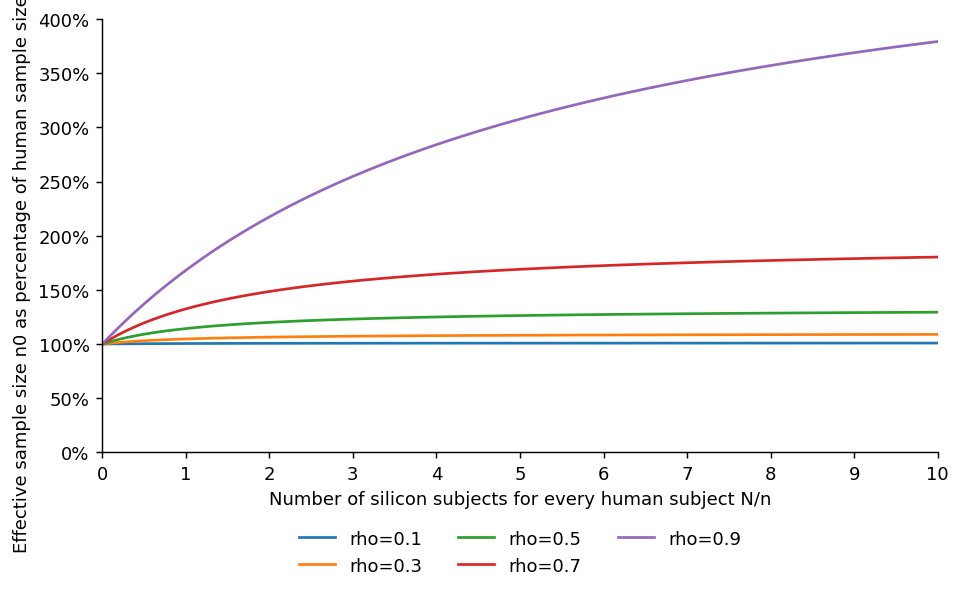

In [ ]:
def n0(rho: float, n: float, k: float) -> float:
    """
    Effective sample size n0.
    k is the ratio k = N/n.
    """
    return (n * (k + 1)) / (k * (1 - rho**2) + 1)


# Example: Effective sample size
n0_07 = n0(rho=0.7, n=1000, k=10)
n0_09 = n0(rho=0.9, n=1000, k=10)

print("round(n0_07) =", round(n0_07))
print("round(n0_09) =", round(n0_09))

# Effective sample size as a percentage of human sample size
print("round(100 * n0_07 / 1000) =", round(100 * n0_07 / 1000))
print("round(100 * n0_09 / 1000) =", round(100 * n0_09 / 1000))

# Percentage increase (n0-n)/n
print("round(100 * (n0_07 - 1000) / 1000, 2) =", round(100 * (n0_07 - 1000) / 1000, 2))
print("round(100 * (n0_09 - 1000) / 1000, 2) =", round(100 * (n0_09 - 1000) / 1000, 2))

# Define n=1 so n0 is a multiple of the human sample size
rhos = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
ks = np.arange(0, 10.0 + 1e-9, 0.1)

n0_plotdata = pd.MultiIndex.from_product([[1], rhos, ks], names=["n", "rho", "k"]).to_frame(index=False)
n0_plotdata["n0"] = n0_plotdata.apply(lambda row: n0(row["rho"], row["n"], row["k"]), axis=1)

# Plot ratio of sample sizes k against effective sample size
fig, ax = plt.subplots(figsize=(7.5, 4.8))
for rho in rhos:
    df = n0_plotdata[n0_plotdata["rho"] == rho]
    ax.plot(df["k"], df["n0"], label=f"rho={rho}")

ax.set_xlabel("Number of silicon subjects for every human subject N/n")
ax.set_ylabel("Effective sample size n0 as percentage of human sample size n (n=1)")
ax.set_xlim(0, 10)
ax.set_ylim(0, 4)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 4.1, 0.5))
ax.set_yticklabels([f"{int(100*y)}%" for y in ax.get_yticks()])
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.32), ncol=3, frameon=False)
plt.tight_layout()
plt.savefig("plots/2_n0_only.png", bbox_inches="tight")
plt.show()

round(100 * se_07, 1) = 74.5
round(100 * se_09, 1) = 51.3
round(100 * (se_07 - 1), 2) = -25.53
round(100 * (se_09 - 1), 2) = -48.65


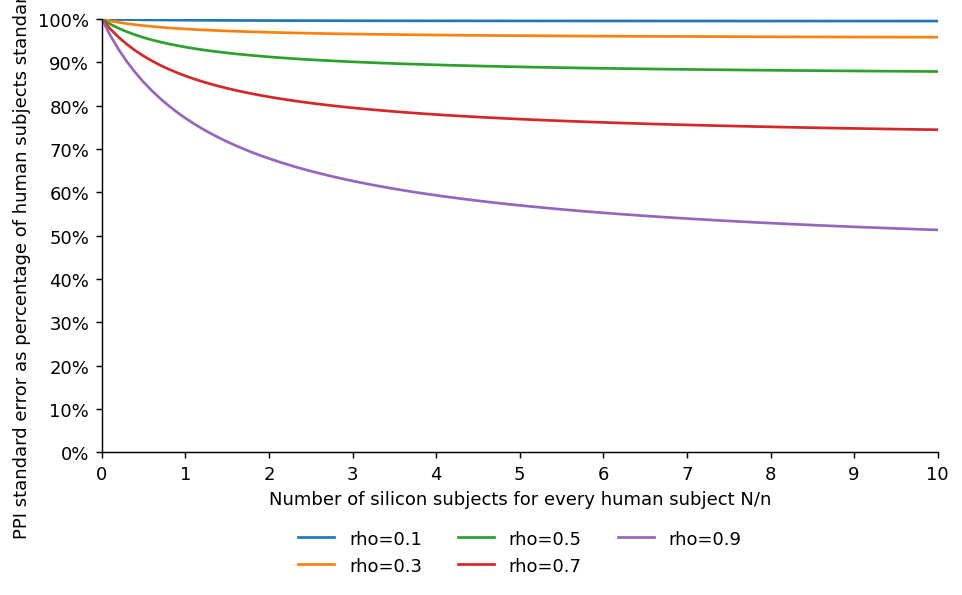

In [ ]:
def p_of_classic_se_ratio(rho: float, k: float) -> float:
    """
    Ratio of PPI SE to classical SE.
    k is the ratio k = N/n.
    """
    return np.sqrt(1 - (k / (1 + k)) * rho**2)


# Example: Ratio of PPI standard error to human subjects standard error
se_07 = p_of_classic_se_ratio(rho=0.7, k=10)
se_09 = p_of_classic_se_ratio(rho=0.9, k=10)

print("round(100 * se_07, 1) =", round(100 * se_07, 1))
print("round(100 * se_09, 1) =", round(100 * se_09, 1))

# Percentage change
print("round(100 * (se_07 - 1), 2) =", round(100 * (se_07 - 1), 2))
print("round(100 * (se_09 - 1), 2) =", round(100 * (se_09 - 1), 2))


# Create dataset with example values for rho
se_plotdata = pd.MultiIndex.from_product([rhos, ks], names=["rho", "k"]).to_frame(index=False)
se_plotdata["p_of_classic_se"] = se_plotdata.apply(lambda row: p_of_classic_se_ratio(row["rho"], row["k"]), axis=1)

# Plot ratio of sample sizes k against ratio of SEs
fig, ax = plt.subplots(figsize=(7.5, 4.8))
for rho in rhos:
    df = se_plotdata[se_plotdata["rho"] == rho]
    ax.plot(df["k"], df["p_of_classic_se"], label=f"rho={rho}")

ax.set_xlabel("Number of silicon subjects for every human subject N/n")
ax.set_ylabel("PPI standard error as percentage of human subjects standard error")
ax.set_xlim(0, 10)
ax.set_ylim(0, 1.0)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.set_yticklabels([f"{int(100*y)}%" for y in ax.get_yticks()])
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.32), ncol=3, frameon=False)
plt.tight_layout()
plt.savefig("plots/2_se_only.png", bbox_inches="tight")
plt.show()


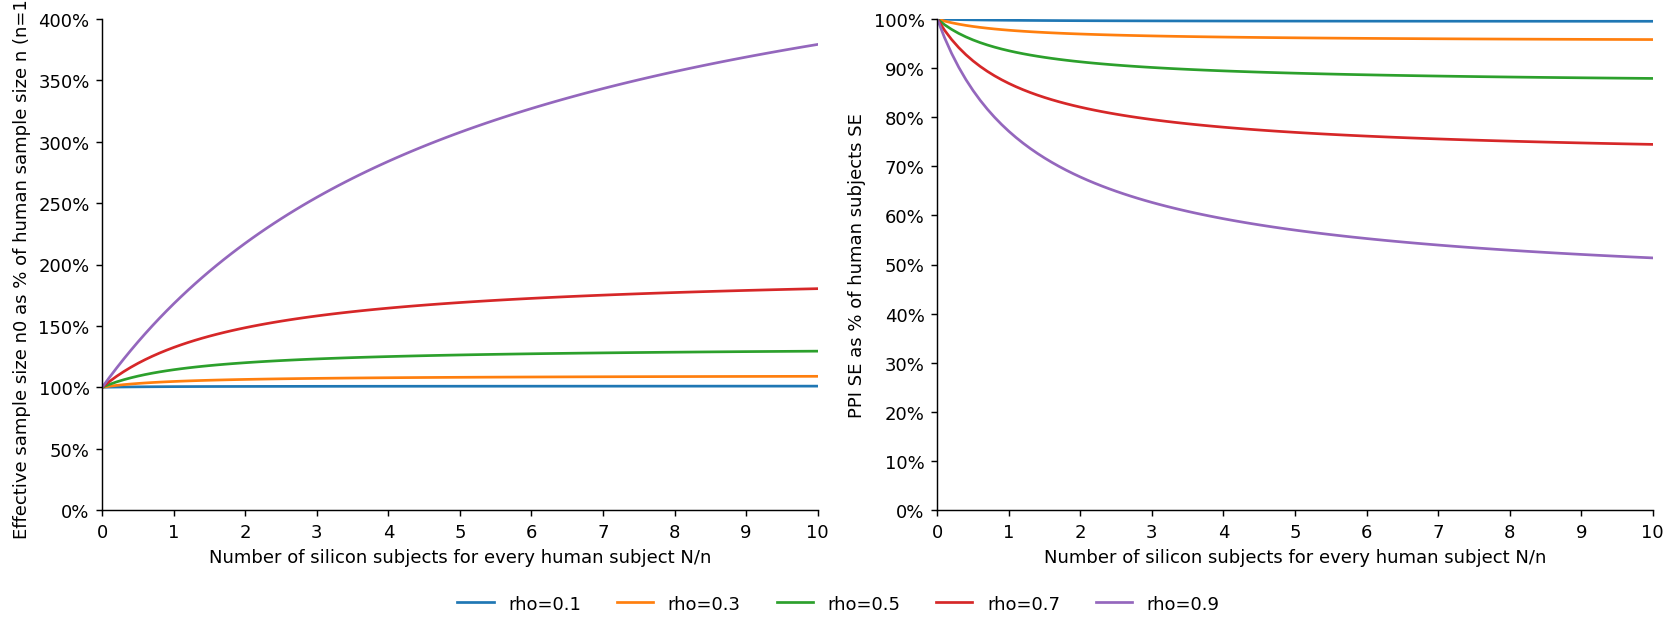

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4.8))

# Left: n0
for rho in rhos:
    df = n0_plotdata[n0_plotdata["rho"] == rho]
    axes[0].plot(df["k"], df["n0"], label=f"rho={rho}")
axes[0].set_xlabel("Number of silicon subjects for every human subject N/n")
axes[0].set_ylabel("Effective sample size n0 as % of human sample size n (n=1)")
axes[0].set_xlim(0, 10)
axes[0].set_ylim(0, 4)
axes[0].set_xticks(np.arange(0, 11, 1))
axes[0].set_yticks(np.arange(0, 4.1, 0.5))
axes[0].set_yticklabels([f"{int(100*y)}%" for y in axes[0].get_yticks()])

# Right: SE ratio
for rho in rhos:
    df = se_plotdata[se_plotdata["rho"] == rho]
    axes[1].plot(df["k"], df["p_of_classic_se"], label=f"rho={rho}")
axes[1].set_xlabel("Number of silicon subjects for every human subject N/n")
axes[1].set_ylabel("PPI SE as % of human subjects SE")
axes[1].set_xlim(0, 10)
axes[1].set_ylim(0, 1.0)
axes[1].set_xticks(np.arange(0, 11, 1))
axes[1].set_yticks(np.arange(0, 1.01, 0.1))
axes[1].set_yticklabels([f"{int(100*y)}%" for y in axes[1].get_yticks()])

# Shared legend at bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=5, frameon=False, bbox_to_anchor=(0.5, -0.02))
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("plots/2_SEandN0.png", bbox_inches="tight")
plt.show()

These figures show that using a larger number of silicon subjects increases the effective sample size and
reduces the PPI standard error with diminishing returns for larger N.

In [ ]:
##################
# Costs per sample
##################

def cost(nprompt: float, ntok_in: float, price1k_in: float, ntok_out: float, price1k_out: float) -> float:
    p_in = price1k_in / 1000.0
    p_out = price1k_out / 1000.0
    return nprompt * (ntok_in * p_in + ntok_out * p_out)


# pricing: https://openai.com/api/pricing/
ntok_in  = 400   # input length
ntok_out = 10    # output length

# gpt-4-turbo
gpt4t_np = 581_981
c_gpt4t = cost(nprompt=gpt4t_np, ntok_in=ntok_in, ntok_out=ntok_out,
               price1k_in=0.01, price1k_out=0.03)

# gpt-3.5-turbo-0125
gpt35_np = 22_315
c_gpt35 = cost(nprompt=gpt35_np, ntok_in=ntok_in, ntok_out=ntok_out,
               price1k_in=0.0005, price1k_out=0.0015)

# gpt-4o
gpt4o_np = 22_315
c_gpt4o = cost(nprompt=gpt4o_np, ntok_in=ntok_in, ntok_out=ntok_out,
               price1k_in=0.00250, price1k_out=0.00125)

print(f"gpt-4-turbo: {c_gpt4t:.2f}$ for {gpt4t_np} API calls.")
print(f"gpt-3.5-turbo-0125: {c_gpt35:.2f}$ for {gpt35_np} API calls.")
print(f"gpt-4o: {c_gpt4o:.2f}$ for {gpt4o_np} API calls.")

gpt-4-turbo: 2502.52$ for 581981 API calls.
gpt-3.5-turbo-0125: 4.80$ for 22315 API calls.
gpt-4o: 22.59$ for 22315 API calls.


In [ ]:
###########################
# Cost saving requirements
###########################

def pcost(rho: float, cf: float, cY: float, verbose: bool = False) -> float:
    """
    Cost of mixed-subjects experiment as a fraction of an all-human experiment.
    rho: PPI correlation
    cf: cost per silicon subject (prediction)
    cY: cost per human subject (label)
    """
    gamma = cf / cY

    minimum_rho = (2 * np.sqrt(gamma)) / (1 + gamma)
    is_sufficient = rho > minimum_rho
    if not is_sufficient:
        print("Rho is not sufficiently large for some cases.")

    pc = 1 - rho**2 * (1 - gamma) + 2 * np.sqrt(gamma * rho**2 * (1 - rho**2))
    pc_gamma0 = 1 - rho**2  # if gamma=0

    if verbose:
        print(f"Cost of silicon subject as % of human subject: {100*gamma:.1f}%")
        print(f"Silicon subjects affordable per human subject: {1/gamma:.0f}" if gamma > 0 else "Infinite (gamma=0)")
        print(f"Minimum PPI correlation to save cost: {minimum_rho:.3f}")
        print(f"% cost of human-subjects experiment: {100*pc:.1f}%")
        print(f"% cost if silicon subjects incur no cost: {100*pc_gamma0:.1f}%")

    return pc


c_llm = 0.1
c_human = 1.0

psaving07 = pcost(rho=0.7, cf=c_llm, cY=c_human, verbose=True)
print("round(100*psaving07,1) =", round(100 * psaving07, 1))

psaving09 = pcost(rho=0.9, cf=c_llm, cY=c_human, verbose=True)
print("round(100*psaving09,1) =", round(100 * psaving09, 1))


def required_gamma(rho: float, psaving: float) -> float:
    """
    Solve for gamma = cf/cY given rho and desired psaving (fraction of human cost).
    """
    p = psaving
    if (1 - rho**2) > psaving:
        print("Warning: Psaving is too low")
        return np.nan
    gamma = (rho**2 + p*rho**2 - rho**4 - 2*np.sqrt(p*rho**4 - p*rho**6)) / (rho**4)
    return gamma


gamma07 = required_gamma(0.7, psaving09)
ggc2_llm = gamma07 * c_human
print("ggc2_llm =", ggc2_llm)

psaving07_2 = pcost(rho=0.7, cf=ggc2_llm, cY=c_human, verbose=True)
print("c_llm / ggc2_llm =", round(c_llm / ggc2_llm, 2))

Cost of silicon subject as % of human subject: 10.0%
Silicon subjects affordable per human subject: 10
Minimum PPI correlation to save cost: 0.575
% cost of human-subjects experiment: 87.5%
% cost if silicon subjects incur no cost: 51.0%
round(100*psaving07,1) = 87.5
Cost of silicon subject as % of human subject: 10.0%
Silicon subjects affordable per human subject: 10
Minimum PPI correlation to save cost: 0.575
% cost of human-subjects experiment: 51.9%
% cost if silicon subjects incur no cost: 19.0%
round(100*psaving09,1) = 51.9
ggc2_llm = 8.234372200990326e-05
Cost of silicon subject as % of human subject: 0.0%
Silicon subjects affordable per human subject: 12144
Minimum PPI correlation to save cost: 0.018
% cost of human-subjects experiment: 51.9%
% cost if silicon subjects incur no cost: 51.0%
c_llm / ggc2_llm = 1214.42


Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for some cases.
Rho is not sufficiently large for 

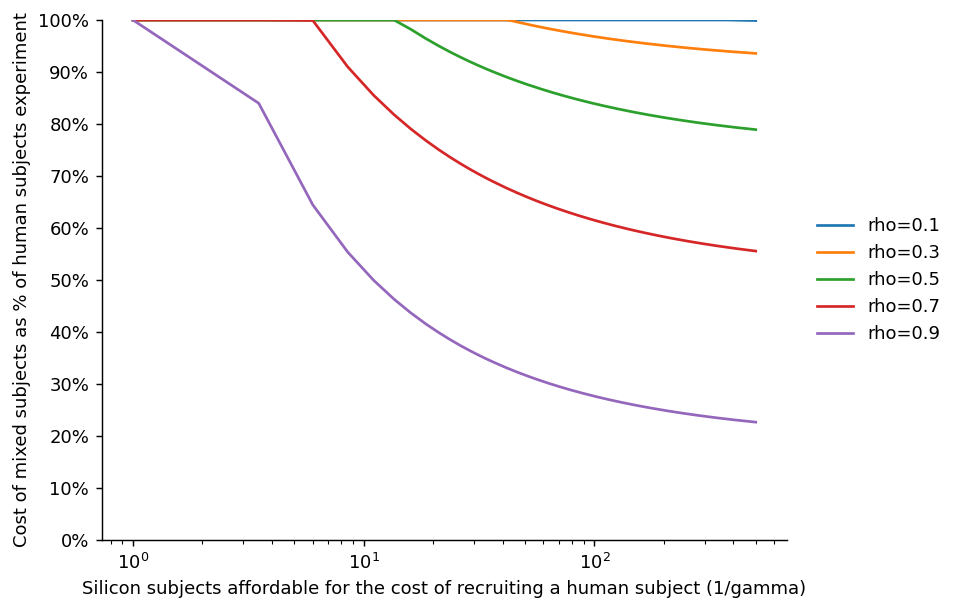

Saved figures to ./Figures/:
 - plots/2_n0_only.png
 - plots/2_se_only.png
 - plots/2_SEandN0.png
 - plots/2_PercentCostOfHumanSubjectsExperiment.png


In [ ]:
rhos2 = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
cf_vals = 1 / np.linspace(1, 500, 200)  # cf = 1/seq(1,500,length.out=200)
cY = 1.0

dd = pd.MultiIndex.from_product([rhos2, cf_vals], names=["rho", "cf"]).to_frame(index=False)
dd["cY"] = cY
dd["gamma"] = dd["cf"] / dd["cY"]

# Compute pcost (quietly) + sufficiency
dd["pcost_raw"] = dd.apply(lambda row: pcost(rho=row["rho"], cf=row["cf"], cY=row["cY"], verbose=False), axis=1)
dd["min_rho"] = (2 * np.sqrt(dd["gamma"])) / (1 + dd["gamma"])
dd["is_sufficient"] = (dd["rho"] > dd["min_rho"]).astype(int)

# If not sufficient, set pcost to 1 (100% of human cost)
dd["pcost"] = np.where(dd["is_sufficient"] == 1, dd["pcost_raw"], 1.0)

# Plot: x = 1/gamma, y = pcost
fig, ax = plt.subplots(figsize=(7.5, 4.8))
for rho in rhos2:
    df = dd[dd["rho"] == rho].sort_values("gamma")
    x = 1 / df["gamma"]
    y = df["pcost"]
    ax.plot(x, y, label=f"rho={rho}")

ax.set_xlabel("Silicon subjects affordable for the cost of recruiting a human subject (1/gamma)")
ax.set_ylabel("Cost of mixed subjects as % of human subjects experiment")
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.set_yticklabels([f"{int(100*y)}%" for y in ax.get_yticks()])

# This x-axis spans a big range; log scale is a good readability substitute for ggplot defaults
ax.set_xscale("log")
ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.tight_layout()
plt.savefig("plots/2_PercentCostOfHumanSubjectsExperiment.png", bbox_inches="tight")
plt.show()

print("Saved figures to ./Figures/:")
for f in [
    "2_n0_only.png",
    "2_se_only.png",
    "2_SEandN0.png",
    "2_PercentCostOfHumanSubjectsExperiment.png",
]:
    print(" - plots/" + f)

The figure shows that mixed subjects experiments become less expensive as predictions become more affordable, with substaintial savings at higher values of the PPI correlation.

## Example: Relationship between income and private health insurance

Before talking about language models, we can first play with a simpler prediction model for a quick demonstration of PPI.

The goal for this example is to investigate the quantitative effect of income on the procurement of private health insurance using US census data. The target of inference is the logistic regression coefficient when regressing the binary indicator of health insurance on income. The data from California in the year 2019 is downloaded through the Folktables interface (1). Predictions of health insurance are made by training a gradient boosting tree via XGBoost (2) on the previous year’s data.

F. Ding, M. Hardt, J. Miller, L. Schmidt, “Retiring adult: New datasets for fair machine learning” in Advances in Neural Information Processing Systems 34 (2021), pp. 6478–6490.
T. Chen, C. Guestrin, “XGBoost: A scalable tree boosting system” in Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (2016), pp. 785–794.

### Import necessary packages

In [ ]:
import os, sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import numpy as np
import pandas as pd
from ppi_py.datasets import load_dataset
from ppi_py import ppi_logistic_ci, classical_logistic_ci
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from scipy.optimize import brentq
from ppi_py.utils import *

### Import the census healthcare data set

Load the data. The data set contains reported indicators of health insurance (```Y```), predicted indicators of health insurance (```Yhat```), and reported income (```X```).

In [ ]:
dataset_folder = "./data/"
data = load_dataset(dataset_folder, "census_healthcare")
Y_total = data["Y"]
Yhat_total = data["Yhat"]
X_total = data["X"]

Dataset census_healthcare not found at location ./data/; downloading now...


### Problem setup

Specify the error level (```alpha```), range of values for the labeled data set size (```ns```), and number of trials (```num_trials```).

Compute the ground-truth value of the estimand.

In [ ]:
alpha = 0.05
coordinate = 0  # Choose between 0, 1
n_total = Y_total.shape[0]  # Total number of labeled examples
ns = np.array([500, 1000, 2000]).astype(
    int
)  # Test for different numbers of labeled ballots
num_trials = 100
optimizer_options = {
    "ftol": 1e-5,
    "gtol": 1e-5,
    "maxls": 10000,
    "maxiter": 10000,
}
# Compute ground truth
true_theta = (
    LogisticRegression(
        penalty=None,
        solver="lbfgs",
        max_iter=10000,
        tol=1e-15,
        fit_intercept=False,
    )
    .fit(X_total, Y_total)
    .coef_.squeeze()[coordinate]
)

### Construct intervals

Form confidence intervals for all methods and problem parameters. A dataframe with the following columns is formed:
1. ```method``` (one of ```PPI```, ```Classical```, and ```Imputation```)
2. ```n``` (labeled data set size, takes values in ```ns```)
3. ```lower``` (lower endpoint of the confidence interval)
4. ```upper``` (upper endpoint of the confidence interval)
5. ```trial``` (index of trial, goes from ```0``` to ```num_trials-1```)

In [ ]:
# Run prediction-powered inference and classical inference for many values of n
results = []
for i in range(ns.shape[0]):
    for j in tqdm(range(num_trials)):
        # Prediction-Powered Inference
        n = ns[i]
        rand_idx = np.random.permutation(n_total)
        _X, _X_unlabeled = X_total[rand_idx[:n]], X_total[rand_idx[n:]]
        _Y, _ = Y_total[rand_idx[:n]], Y_total[rand_idx[n:]]
        _Yhat, _Yhat_unlabeled = (
            Yhat_total[rand_idx[:n]],
            Yhat_total[rand_idx[n:]],
        )

        ppi_ci = ppi_logistic_ci(
            _X,
            _Y,
            _Yhat,
            _X_unlabeled,
            _Yhat_unlabeled,
            alpha=alpha,
            optimizer_options=optimizer_options,
        )

        # Classical interval
        classical_ci = classical_logistic_ci(_X, _Y, alpha=alpha)

        # Append results
        results += [
            pd.DataFrame(
                [
                    {
                        "method": "PPI",
                        "n": n,
                        "lower": ppi_ci[0][coordinate],
                        "upper": ppi_ci[1][coordinate],
                        "trial": j,
                    }
                ]
            )
        ]
        results += [
            pd.DataFrame(
                [
                    {
                        "method": "Classical",
                        "n": n,
                        "lower": classical_ci[0][coordinate],
                        "upper": classical_ci[1][coordinate],
                        "trial": j,
                    }
                ]
            )
        ]

# Imputed CI
imputed_ci = classical_logistic_ci(
    X_total, (Yhat_total > 0.5).astype(int), alpha=alpha
)
results += [
    pd.DataFrame(
        [
            {
                "method": "Imputation",
                "n": np.nan,
                "lower": imputed_ci[0][coordinate],
                "upper": imputed_ci[1][coordinate],
                "trial": 0,
            }
        ]
    )
]

df = pd.concat(results, axis=0, ignore_index=True)
df["width"] = df["upper"] - df["lower"]

100%|██████████| 100/100 [04:14<00:00,  2.55s/it]


### Plot results

Plot:
1. Five randomly chosen intervals from the dataframe for PPI and the classical method, and the imputed interval;
2. The average interval width for PPI and the classical method, together with a scatterplot of the widths from the five random draws.

In [ ]:
import os
import numpy as np
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import seaborn as sns
import pdb

def plot_interval(
    ax,
    lower,
    upper,
    height,
    color_face,
    color_stroke,
    linewidth=5,
    linewidth_modifier=1.1,
    offset=0.25,
    label=None,
):
    label = label if label is None else " " + label
    ax.plot(
        [lower, upper],
        [height, height],
        linewidth=linewidth,
        color=color_face,
        path_effects=[
            pe.Stroke(
                linewidth=linewidth * linewidth_modifier,
                offset=(-offset, 0),
                foreground=color_stroke,
            ),
            pe.Stroke(
                linewidth=linewidth * linewidth_modifier,
                offset=(offset, 0),
                foreground=color_stroke,
            ),
            pe.Normal(),
        ],
        label=label,
        solid_capstyle="butt",
    )


def make_plots(
    df,
    plot_savename,
    n_idx=-1,
    true_theta=None,
    true_label=r"$\theta^*$",
    intervals_xlabel="x",
    plot_classical=True,
    ppi_facecolor="#DAF3DA",
    ppi_strokecolor="#71D26F",
    classical_facecolor="#EEEDED",
    classical_strokecolor="#BFB9B9",
    imputation_facecolor="#FFEACC",
    imputation_strokecolor="#FFCD82",
    empty_panel=True,
):
    # Make plot
    num_intervals = 5
    num_scatter = 3
    ns = df.n.unique()
    ns = ns[~np.isnan(ns)].astype(int)
    n = ns[n_idx]
    num_trials = len(df[(df.n == n) * (df.method == "PPI")])

    ppi_intervals = df[(df.n == n) & (df.method == "PPI")].sample(
        n=num_intervals, replace=False
    )
    if plot_classical:
        classical_intervals = df[
            (df.n == n) & (df.method == "Classical")
        ].sample(n=num_intervals, replace=False)
    imputation_interval = df[df.method == "Imputation"]

    xlim = [None, None]
    ylim = [0, 1.15]

    if empty_panel:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
    sns.set_theme(style="white", font_scale=1, font="DejaVu Sans")
    if true_theta is not None:
        axs[-2].axvline(
            true_theta,
            ymin=0.0,
            ymax=1,
            linestyle="dotted",
            linewidth=3,
            label=true_label,
            color="#F7AE7C",
        )

    for i in range(num_intervals):
        ppi_interval = ppi_intervals.iloc[i]
        if plot_classical:
            classical_interval = classical_intervals.iloc[i]

        if i == 0:
            plot_interval(
                axs[-2],
                ppi_interval.lower,
                ppi_interval.upper,
                0.7,
                ppi_facecolor,
                ppi_strokecolor,
                label="prediction-powered",
            )
            if plot_classical:
                plot_interval(
                    axs[-2],
                    classical_interval.lower,
                    classical_interval.upper,
                    0.25,
                    classical_facecolor,
                    classical_strokecolor,
                    label="classical",
                )
            plot_interval(
                axs[-2],
                imputation_interval.lower,
                imputation_interval.upper,
                0.1,
                imputation_facecolor,
                imputation_strokecolor,
                label="imputation",
            )
        else:
            lighten_factor = 0.8 / np.sqrt(num_intervals - i)
            yshift = (num_intervals - i) * 0.07
            plot_interval(
                axs[-2],
                ppi_interval.lower,
                ppi_interval.upper,
                0.7 + yshift,
                lighten_color(ppi_facecolor, lighten_factor),
                lighten_color(ppi_strokecolor, lighten_factor),
            )
            if plot_classical:
                plot_interval(
                    axs[-2],
                    classical_interval.lower,
                    classical_interval.upper,
                    0.25 + yshift,
                    lighten_color(classical_facecolor, lighten_factor),
                    lighten_color(classical_strokecolor, lighten_factor),
                )

    axs[-2].set_xlabel(intervals_xlabel, labelpad=10)
    axs[-2].set_yticks([])
    axs[-2].set_yticklabels([])
    axs[-2].set_ylim(ylim)
    axs[-2].set_xlim(xlim)

    sns.despine(ax=axs[-2], top=True, right=True, left=True)

    ppi_widths = [
        df[(df.n == _n) & (df.method == "PPI")].width.mean() for _n in ns
    ]
    if plot_classical:
        classical_widths = [
            df[(df.n == _n) & (df.method == "Classical")].width.mean()
            for _n in ns
        ]

    axs[-1].plot(
        ns,
        ppi_widths,
        label="prediction-powered",
        color=ppi_strokecolor,
        linewidth=3,
    )
    if plot_classical:
        axs[-1].plot(
            ns,
            classical_widths,
            label="classical",
            color=classical_strokecolor,
            linewidth=3,
        )

    n_list = []
    ppi_width_list = []
    if plot_classical:
        classical_width_list = []
    for _n in ns:
        trials = np.random.choice(
            num_trials, size=num_scatter, replace=False
        ).astype(int)
        ppi_width_list += df[
            (df.n == _n) & (df.method == "PPI") & df.trial.isin(trials)
        ].width.to_list()
        if plot_classical:
            classical_width_list += df[
                (df.n == _n)
                & (df.method == "Classical")
                & df.trial.isin(trials)
            ].width.to_list()
        n_list += [_n] * num_scatter

    axs[-1].scatter(n_list, ppi_width_list, color=ppi_strokecolor, alpha=0.5)

    if plot_classical:
        axs[-1].scatter(
            n_list,
            classical_width_list,
            color=classical_strokecolor,
            alpha=0.5,
        )

    axs[-1].locator_params(axis="y", tight=None, nbins=6)
    axs[-1].set_ylabel("width")
    axs[-1].set_xlabel("n", labelpad=10)
    sns.despine(ax=axs[-1], top=True, right=True)

    if empty_panel:
        sns.despine(ax=axs[0], top=True, right=True, left=True, bottom=True)
        axs[0].set_xticks([])
        axs[0].set_yticks([])
        axs[0].set_xticklabels([])
        axs[0].set_yticklabels([])

    plt.tight_layout()
    os.makedirs("/".join(plot_savename.split("/")[:-1]), exist_ok=True)
    plt.savefig(plot_savename)


def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys

    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

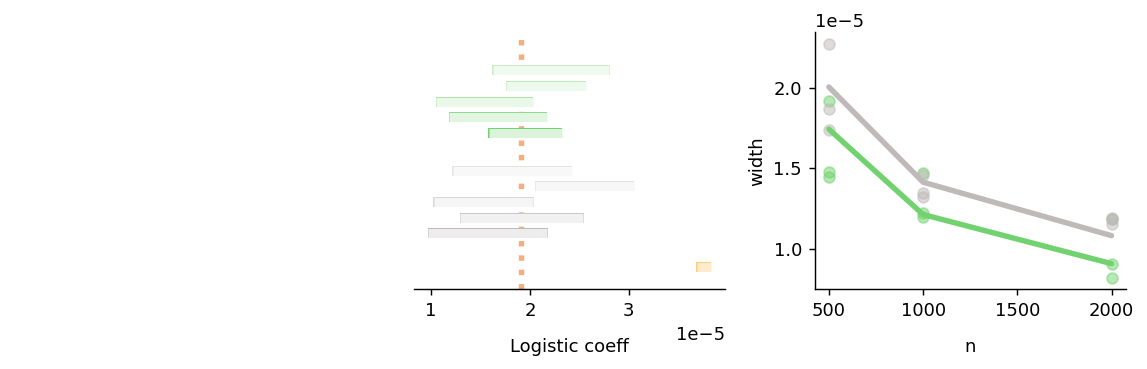

In [ ]:
make_plots(
    df,
    "./plots/census_healthcare.pdf",
    intervals_xlabel="Logistic coeff",
    n_idx=-1,
    true_theta=true_theta,
)

### Power experiment

For PPI and the classical approach, find the smallest value of ```n``` such that the method has power 80% against the null $H_0: \theta^* < 0.5 \cdot 10^{-5}$.

<font color="red">You don't need to run the code chunk below because it really takes a while. You only need to read the output to understand how PPI helps on reducing the effectize sample size substaintially.</font>

In [ ]:
# Find n such that we reject H0: Logistic coeff < 0.5*1e-5 with probability 80% using a test at level alpha
num_experiments = 100
list_rand_idx = [
    np.random.permutation(n_total) for i in range(num_experiments)
]


def _to_invert_ppi(n):
    print(f"PPI: {n}")
    n = int(n)
    nulls_rejected = 0
    # Data setup
    for i in range(num_experiments):
        # print(f"PPI: {n}, {i}")
        rand_idx = list_rand_idx[i]
        _X, _X_unlabeled = X_total[rand_idx[:n]], X_total[rand_idx[n:]]
        _Y, _ = Y_total[rand_idx[:n]], Y_total[rand_idx[n:]]
        _Yhat, _Yhat_unlabeled = (
            Yhat_total[rand_idx[:n]],
            Yhat_total[rand_idx[n:]],
        )

        ppi_ci = ppi_logistic_ci(
            _X,
            _Y,
            _Yhat,
            _X_unlabeled,
            _Yhat_unlabeled,
            alpha=alpha,
            optimizer_options=optimizer_options,
        )
        if ppi_ci[0][coordinate] > 1.5e-5:
            nulls_rejected += 1
    return nulls_rejected / num_experiments - 0.8


def _to_invert_classical(n):
    print(f"Classical: {n}")
    n = int(n)
    nulls_rejected = 0
    # Data setup
    for i in range(num_experiments):
        rand_idx = list_rand_idx[i]
        _X, _ = X_total[rand_idx[:n]], X_total[rand_idx[n:]]
        _Y, _ = Y_total[rand_idx[:n]], Y_total[rand_idx[n:]]

        classical_ci = classical_logistic_ci(_X, _Y, alpha=alpha)
        if classical_ci[0][coordinate] > 1.5e-5:
            nulls_rejected += 1
    return nulls_rejected / num_experiments - 0.8

In [ ]:
n_ppi = int(brentq(_to_invert_ppi, 150, 15000, xtol=100))
n_classical = int(brentq(_to_invert_classical, 150, 20000, xtol=100))

print(
    f"The PPI test requires n={n_ppi} labeled data points to reject the null."
)

print(
    f"The classical test requires n={n_classical} labeled data points to reject the null."
)

PPI: 150.0
PPI: 15000.0
PPI: 11464.285714285714
PPI: 5807.142857142857
PPI: 5175.185185185188
PPI: 4560.035002035001
PPI: 4867.610093610094
PPI: 5021.397639397641
PPI: 5123.922669922672
PPI: 5072.660154660156
Classical: 150.0
Classical: 20000.0
Classical: 15539.325842696631
Classical: 7844.662921348316
Classical: 6644.193493041374
Classical: 7244.4282071948455
Classical: 7644.584683297159
Classical: 7444.506445246003
Classical: 7511.199191263056
The PPI test requires n=5123 labeled data points to reject the null.
The classical test requires n=7444 labeled data points to reject the null.


## LLM-Powered PPI

In this section, we discuss the implementation of a mixed subjects design (human labeled data & LLM simulated data) with PPI through the re-examination of the Moral Machine experiment (Awad et al. 2018). The Moral Machine experiment sought to better understand the factors influncing people's decisions in moral dilemmas that self-driving cars might face on the road. The experiment measured how attributes such as age, gender, social status, and the number of individuals influenced the probability of participants choosing to save one group over the other. Awad et al. (2018) estimate the Average Marginal Component Effect (AMCE) to measure the causal effect of an attribute of a moral dilemma on a respondent's decision.

In the following, we present our reanalysis of the moral machine experiment. We compare the mixed subjects and silicon subjects design to a human subjects design, which serves as our benchmark. Our reanalysis demonstrates how a mixed subjects design can address the challenges associated with silicon sampling detailed in Section ''Perils of the Silicon Subjects Design.'' Specifically, we use a simulation to show how relying on an increasing number of LLM predictions affects the bias and precision of the AMCE estimates in both designs.

We need to first define necessary python functions for LLM simulation and ACME computation.

In [ ]:
!pip install anthropic

In [ ]:
from collections import Counter
from itertools import repeat
import pandas as pd
import numpy as np
import random
import openai
import os
import os.path
import anthropic
import time
import re
import random
import statsmodels.api as sm
from datetime import datetime
from ppi_py import ppi_ols_ci, classical_ols_ci, ppi_ols_pointestimate
from scipy import stats


# ===========================================
# Function to generate a scenario for the LLM
# ===========================================

def generate_scenario(response, include_persona=True):

    if include_persona:

        # "Annual income, including tips, dividends, interest, etc (in US dollars)" [dropdown menu]
        inc_descriptions = {
            2500:   "under 5,000",                               # "Under $5,000"
            7500:   "7,500",                                     # "$5,000-$10,000"
            12500:  "12,500",                                    # "$10,001-$15,000"
            20000:  "20,000",                                    # "$15,001-$25,000"
            30000:  "30,000",                                    # "$25,001-$35,000"
            42500:  "42,500",                                    # "$35,001-$50,000"
            65000:  "65,000",                                    # "$50,000-$85,000"
            90000:  "90,000",                                    # "$80,001-$100,000"
            150000: "more than 100,000"                          # "Over $100,000"
        }
        inc_val = response["Review_ContinuousIncome"].unique()[0]
        inc_des = "You earn an annual income of {} US dollars.".format(inc_descriptions[inc_val])


        # "How old are you?" [text box]
        age_val = response["Review_age"].unique()[0]
        age_des = "You are {} years old.".format(age_val)

        # "Highest level of education" [dropdown menu]
        edu_descriptions = {
            'underHigh': "less than a high school diploma",      # "Less than a High School Diploma"
            'high': "a high school diploma",                     # "High School Diploma"
            'vocational': "vocational training",                 # "Vocational training"
            'college': "that you attended college",              # "Attended College"
            'bachelor': "a bachelor degree",                     # "Bachelor Degree"
            'graduate': "graduate degree"                        # "Graduate Degree"
        }
        edu_val = response["Review_education"].unique()[0]
        edu_des = "Your highest level of education is {}.".format(edu_descriptions[edu_val])


        # "What is your gender?" [dropdown menu]
        gen_descriptions = {
            'Man':   "You are a man.",                           # "Male"
            'Woman': "You are a woman.",                         # "Female"
            "Other": "You do not identify as a woman or a man."  # "Other"
        }
        gen_val = response["Review_gender"].unique()[0]
        gen_des = gen_descriptions[gen_val]

        # "What are your religious views?" [slider scale]
        rel_val = response["Review_religious"].unique()[0]
        rel_des = "On a scale from 0 (Not Religious) to 100 (Very Religious), you report a score of {} for your religious views.".format(rel_val)

        # "What are your political views?" [slider scale]
        pol_val = response["Review_political"].unique()[0]
        pol_des = "On a scale from 0 (Conservative) to 100 (Progressive), you report a score of {} for your political views.".format(pol_val)

        # reshuffle order of persona characterists
        persona_characteristics = [inc_des, age_des, edu_des, gen_des, pol_des, rel_des]
        random.shuffle(persona_characteristics)

        persona = '\n'.join([f' - {c}' for c in persona_characteristics])

    # set seed for order of characters in description of scenarios
    random.seed(a=2024)

    # column names in survey data
    cols = ['Man','Woman','Pregnant','Stroller','OldMan','OldWoman','Boy','Girl','Homeless','LargeWoman','LargeMan','Criminal',
            'MaleExecutive','FemaleExecutive','FemaleAthlete','MaleAthlete','FemaleDoctor','MaleDoctor','Dog','Cat']

    # corresponding words used in the descriptions
    character = ["man", "woman", "pregnant woman", "baby", "elderly man", "elderly woman", "boy", "girl", "homeless person", "large woman", "large man",
                 "criminal", "male executive", "female executive", "female athlete", "male athlete", "female doctor", "male doctor", "dog","cat"]

    # plural conversion
    characters_plural = ["men", "women", "pregnant women", "babies", "elderly men", "elderly women", "boys", "girls", "homeless persons", "large women", "large men",
                         "criminals", "male executives", "female executives", "female athletes", "male athletes", "female doctors", "male doctors", "dogs", "cats"]
    def plural(elem, cnt):
        if cnt > 1:
            return characters_plural[character.index(elem)]
        else:
            return elem

    # baseline description
    base_description = "A self-driving car with sudden brake failure will "

    # shortcuts for text
    traffic_light_pattern_descriptions = {
        'red': "flouting the law by crossing on the red signal",
        'green': "abiding by the law by crossing on the green signal"
    }

    # whether scenarios involve a car and a pedestrian
    is_pasvsped = all(response["PedPed"] == 0)

    # passengers vs pedestrians
    if is_pasvsped:

        pas_description = ""
        ped_description = ""

        # passengers died if Barrier=1
        pas = response[ response["Barrier"]==1 ]
        # long format to get characters and frequency
        pas_T = pas[cols].T.reset_index()
        pas_ind = pas_T[pas_T.iloc[:,1] >= 1 ].index
        # get list of unique characters in scenario
        pas_char = [character[i] for i in pas_ind]
        # get number of times each one of them appears
        pas_numchar = list(pas_T[pas_T.iloc[:,1] >= 1 ].iloc[:,1])
        # repeat characters if they occur multiple times
        passengers  = [elem for count, elem in zip(pas_numchar, pas_char) for _ in repeat(None, count)]
        # reshuffle order
        random.shuffle(passengers)

        # pedestrians died if Barrier=0
        ped = response[ response["Barrier"]==0 ]
        # long format to get characters and frequency
        ped_T = ped[cols].T.reset_index()
        ped_ind = ped_T[ped_T.iloc[:,1] >= 1 ].index
        # get list of unique characters in scenario
        ped_char = [character[i] for i in ped_ind]
        # get number of times each one of them appears
        ped_numchar = list(ped_T[ped_T.iloc[:,1] >= 1 ].iloc[:,1])
        # repeat characters if they occur multiple times
        pedestrians = [elem for count, elem in zip(ped_numchar, ped_char) for _ in repeat(None, count)]
        # reshuffle order
        random.shuffle(pedestrians)

        pas_dict = Counter(passengers)
        ped_dict = Counter(pedestrians)

        passengers_set = ""
        nb_passengers_set = 0
        for i, (element, count) in enumerate(pas_dict.items()):
            nb_passengers_set += count
            passengers_set += "{} {}".format(count, plural(element, count))
            if i == len(pas_dict) - 2:
                if len(pas_dict) == 2:
                    passengers_set += " and "
                else:
                    passengers_set += ", and "
            elif i < len(pas_dict) - 1:
                passengers_set += ", "

        pedestrians_set = ""
        nb_pedestrians_set = 0
        for i, (element, count) in enumerate(ped_dict.items()):
            nb_pedestrians_set += count
            pedestrians_set += "{} {}".format(count, plural(element, count))
            if i == len(ped_dict) - 2:
                if len(ped_dict) == 2:
                    pedestrians_set += " and "
                else:
                    pedestrians_set += ", and "
            elif i < len(ped_dict) - 1:
                pedestrians_set += ", "

        # code legality for pedestrians
        if ped.iloc[0]["CrossingSignal"] == 0:
            ped_signal = "NA"
        elif ped.iloc[0]["CrossingSignal"] == 1:
            ped_signal = "green"
        elif ped.iloc[0]["CrossingSignal"] == 2:
            ped_signal  = "red"

        # passengers died as the result of swerving
        if pas.iloc[0]["Intervention"] == 1:
            pas_description = pas_description + base_description + "swerve and crash into a concrete barrier. This will result in the death of {}, who {} inside the car.".format(
                passengers_set,
                'were' if nb_passengers_set >= 2 else 'was',
            )
            if ped_signal != "NA":
                ped_description = ped_description + base_description + "continue ahead and drive through a pedestrian crossing ahead. This will result in the death of {}, who {} {}.".format(
                    pedestrians_set,
                    'were' if nb_pedestrians_set >= 2 else 'was',
                    traffic_light_pattern_descriptions[ped_signal],
                )
            else:
                ped_description = ped_description + base_description + "continue ahead and drive through a pedestrian crossing ahead. This will result in the death of {}, who {} crossing.".format(
                    pedestrians_set,
                    'were' if nb_pedestrians_set >= 2 else 'was',
                )
        # passengers died from continuing ahead and crashing into a barrier
        else:
            pas_description = pas_description + base_description + "continue ahead and crash into a concrete barrier. This will result in the death of {}, who {} inside the car.".format(
                passengers_set,
                'were' if nb_pedestrians_set >= 2 else 'was',
            )
            if ped_signal != "NA":
                ped_description = ped_description + base_description + "swerve to avoid crashing into a concrete barrier and drive through a pedestrian crossing in the other lane. This will result in the death of {}, who {} {}.".format(
                    pedestrians_set,
                    'were' if nb_pedestrians_set >= 2 else 'was',
                    traffic_light_pattern_descriptions[ped_signal],
                )
            else:
                ped_description = ped_description + base_description + "swerve to avoid crashing into a concrete barrier and drive through a pedestrian crossing in the other lane. This will result in the death of {}, who {} crossing.".format(
                    pedestrians_set,
                    'were' if nb_pedestrians_set >= 2 else 'was',
                )

        pas_description = pas_description + " Meanwhile, it will spare {}".format(pedestrians_set)
        if ped_signal != "NA":
            pas_description = pas_description + ", who {} {}.\n".format(
                'were' if nb_pedestrians_set >= 2 else 'was',
                traffic_light_pattern_descriptions[ped_signal],
            )
        else:
            pas_description = pas_description + ", who {} crossing.\n".format('were' if nb_pedestrians_set >= 2 else 'was')

        ped_description = ped_description + " Meanwhile, it will spare {}".format(passengers_set)
        ped_description = ped_description + ", who {} inside the car.\n".format('were' if nb_passengers_set >= 2 else 'was')

        # order descriptions of scenarios as presented to respondent
        if pas.iloc[0]["LeftHand"] == 1:
            c1_description = "Case 1.\n" + pas_description
            c2_description = "Case 2.\n" + ped_description
        else:
            c1_description = "Case 1.\n" + ped_description
            c2_description = "Case 2.\n" + pas_description


    # pedestrians vs pedestrians
    else:

        ped1_description = ""
        ped2_description = ""

        # pedestrians 1 mentioned first if LeftHand=1
        ped1 = response[ response["LeftHand"]==1 ]
        # long format to get characters and frequency
        ped1_T = ped1[cols].T.reset_index()
        ped1_ind = ped1_T[ped1_T.iloc[:,1] >= 1 ].index
        # get list of unique characters in scenario
        ped1_char = [character[i] for i in ped1_ind]
        # get number of times each one of them appears
        ped1_numchar = list(ped1_T[ped1_T.iloc[:,1] >= 1 ].iloc[:,1])
        # repeat characters if they occur multiple times
        pedestrians1 = [elem for count, elem in zip(ped1_numchar, ped1_char) for _ in repeat(None, count)]
        # reshuffle order
        random.shuffle(pedestrians1)

        # pedestrians died if Barrier=0
        ped2 = response[ response["LeftHand"]==0 ]
        # long format to get characters and frequency
        ped2_T = ped2[cols].T.reset_index()
        ped2_ind = ped2_T[ped2_T.iloc[:,1] >= 1 ].index
        # get list of unique characters in scenario
        ped2_char = [character[i] for i in ped2_ind]
        # get number of times each one of them appears
        ped2_numchar = list(ped2_T[ped2_T.iloc[:,1] >= 1 ].iloc[:,1])
        # repeat characters if they occur multiple times
        pedestrians2 = [elem for count, elem in zip(ped2_numchar, ped2_char) for _ in repeat(None, count)]
        # reshuffle order
        random.shuffle(pedestrians2)

        ped1_dict = Counter(pedestrians1)
        ped2_dict = Counter(pedestrians2)

        pedestrians1_set = ""
        nb_pedestrians1_set = 0
        for i, (element, count) in enumerate(ped1_dict.items()):
            nb_pedestrians1_set += count
            pedestrians1_set += "{} {}".format(count, plural(element, count))
            if i == len(ped1_dict) - 2:
                if len(ped1_dict) == 2:
                    pedestrians1_set += " and "
                else:
                    pedestrians1_set += ", and "
            elif i < len(ped1_dict) - 1:
                pedestrians1_set += ", "

        pedestrians2_set = ""
        nb_pedestrians2_set = 0
        for i, (element, count) in enumerate(ped2_dict.items()):
            nb_pedestrians2_set += count
            pedestrians2_set += "{} {}".format(count, plural(element, count))
            if i == len(ped2_dict) - 2:
                if len(ped2_dict) == 2:
                    pedestrians2_set += " and "
                else:
                    pedestrians2_set += ", and "
            elif i < len(ped2_dict) - 1:
                pedestrians2_set += ", "

        # code legality for pedestrians 1
        if ped1.iloc[0]["CrossingSignal"] == 0:
            ped1_signal = "NA"
        elif ped1.iloc[0]["CrossingSignal"] == 1:
            ped1_signal = "green"
        elif ped1.iloc[0]["CrossingSignal"] == 2:
            ped1_signal  = "red"

        # code legality for pedestrians 2
        if ped2.iloc[0]["CrossingSignal"] == 0:
            ped2_signal = "NA"
        elif ped2.iloc[0]["CrossingSignal"] == 1:
            ped2_signal = "green"
        elif ped2.iloc[0]["CrossingSignal"] == 2:
            ped2_signal  = "red"

        # pedestrians 1 died because respondent let the AV swerve
        if ped1.iloc[0]["Intervention"] == 1:
            if ped1_signal != "NA":
                ped1_description = ped1_description + base_description + "swerve and drive through a pedestrian crossing in the other lane. This will result in the death of {}, who {} {} in the other lane.".format(
                    pedestrians1_set,
                    'were' if nb_pedestrians1_set >= 2 else 'was',
                    traffic_light_pattern_descriptions[ped1_signal],
                )
                ped2_description = ped2_description + base_description + "continue ahead and drive through a pedestrian crossing ahead. This will result in the death of {}, who {} {} ahead of the car.".format(
                    pedestrians2_set,
                    'were' if nb_pedestrians2_set >= 2 else 'was',
                    traffic_light_pattern_descriptions[ped2_signal],
                )
            else:
                ped1_description = ped1_description + base_description + "swerve and drive through a pedestrian crossing in the other lane. This will result in the death of {}, who {} crossing in the other lane.".format(
                    pedestrians1_set,
                    'were' if nb_pedestrians1_set >= 2 else 'was',
                )
                ped2_description = ped2_description + base_description + "continue ahead and drive through a pedestrian crossing ahead. This will result in the death of {}, who {} crossing ahead of the car.".format(
                    pedestrians2_set,
                    'were' if nb_pedestrians2_set >= 2 else 'was',
                )
        # pedestrians 2 died because respondet let the AV stay on course
        else:
            if ped1_signal != "NA":
                ped1_description = ped1_description + base_description + "continue ahead and drive through a pedestrian crossing ahead. This will result in the death of {}, who {} {} ahead of the car.".format(
                    pedestrians1_set,
                    'were' if nb_pedestrians1_set >= 2 else 'was',
                    traffic_light_pattern_descriptions[ped1_signal],
                )
                ped2_description = ped2_description + base_description + "swerve and drive through a pedestrian crossing in the other lane. This will result in the death of {}, who {} {} in the other lane.".format(
                    pedestrians2_set,
                    'were' if nb_pedestrians2_set >= 2 else 'was',
                    traffic_light_pattern_descriptions[ped2_signal],
                )
            else:
                ped1_description = ped1_description + base_description + "continue ahead and drive through a pedestrian crossing ahead. This will result in the death of {}, who {} crossing ahead of the car.".format(
                    pedestrians1_set,
                    'were' if nb_pedestrians1_set >= 2 else 'was',
                )
                ped2_description = ped2_description + base_description + "swerve and drive through a pedestrian crossing in the other lane. This will result in the death of {}, who {} crossing in the other lane.".format(
                    pedestrians2_set,
                    'were' if nb_pedestrians2_set >= 2 else 'was',
                )

        ped1_description = ped1_description + " Meanwhile, it will spare {}".format(pedestrians2_set)
        if ped2_signal != "NA":
            ped1_description = ped1_description + ", who {} {} ".format(
                'were' if nb_pedestrians2_set >= 2 else 'was',
                traffic_light_pattern_descriptions[ped2_signal],
            )
        else:
            ped1_description = ped1_description + ", who {} crossing ".format('were' if nb_pedestrians2_set >= 2 else 'was')

        if ped1.iloc[0]["Intervention"] == 1:
            ped1_description = ped1_description + "ahead of the car.\n"
        else:
            ped1_description = ped1_description + "in the other lane.\n"

        ped2_description = ped2_description + " Meanwhile, it will spare {}".format(pedestrians1_set)
        if ped1_signal != "NA":
            ped2_description = ped2_description + ", who {} {} ".format(
                'were' if nb_pedestrians1_set >= 2 else 'was',
                traffic_light_pattern_descriptions[ped1_signal],
            )
        else:
            ped2_description = ped2_description + ", who {} crossing ".format('were' if nb_pedestrians1_set >= 2 else 'was')

        if ped1.iloc[0]["Intervention"] == 1:
            ped2_description = ped2_description + "in the other lane.\n"
        else:
            ped2_description = ped2_description + "ahead of the car.\n"

        c1_description = "Case 1.\n" + ped1_description
        c2_description = "Case 2.\n" + ped2_description

    # system content base description
    system_content = "Carefully consider the following information and think step by step. "

    # add information about survey respondent
    if include_persona:
        system_content += "You are an American with the following characteristics:\n" + persona + "\n"
    else:
        system_content += "\n"

    # add information about the structure of the scenario
    if is_pasvsped:
        system_content += "Consider that pedestrians are crossing a zebra crossing that spans two lanes. "
    else:
        system_content += "Consider that pedestrians are crossing a zebra crossing that spans two lanes, divided by an island. "

    # add task description and requested output format
    system_content += "Please indicate which case is better for autonomous driving by choosing either \'Case 1\' or \'Case 2\'. Respond with one word only.\n"

    # user content contains description of scenario
    user_content = c1_description + "\n" + c2_description

    return system_content, user_content




# ========================================================
# Function to classify LLM responses as saved or not saved
# ========================================================

def classify_response(row, column_name):

    # row refers to one row in the dataframe with llm reponses
    # column_name refers to the column with llm text output
    text = row[ column_name ].lower()

    # define regular expression for whether llm opted for 1 or 2
    pattern_case1 = re.compile(r"case\s?1.?")
    pattern_case2 = re.compile(r"case\s?2.?")

    # whether text matches case1 and case2 pattern, respectively
    match_case1 = pattern_case1.search(text) is not None
    match_case2 = pattern_case2.search(text) is not None

    if match_case1 and not match_case2:
        case = 1
    elif not match_case1 and match_case2:
        case = 2
    else:
        case = np.NaN

    # row refers to case 1 and llm chose case 1, so people described in case 1 are not saved
    if  row["LeftHand"]==1 and case==1:
        saved = 0
    # row refers to case 1 but llm chose case 2, so people described in case 2 are saved
    elif row["LeftHand"]==1 and case==2:
        saved = 1
    # row refers to case 2 and llm chose case 2, so people described in case 2 are not saved
    elif row["LeftHand"]==0 and case==2:
        saved = 0
    # row refers to case 2 but llm chose case 1, so people described in case 2 are saved
    elif row["LeftHand"]==0 and case==1:
        saved = 1
    else:
        saved = np.NaN


    return saved






# ================================================================
# Function to prompt the LLM with scenarios and save the responses
# ================================================================

def prompt_llm(data, model, api_key, csv_path, include_persona=True, verbose=False, sleep=0, temperature=None):

    # data:            DataFrame with scenario descriptions and profiles of survey respondents
    # model:           Name of model, e.g. gpt-4o
    # api_key:         API key
    # csv_path:        File path to existing .csv for saving output of API calls, creates .csv if not exists
    # include_persona: If true, the prompt includes a demographic description of the survey respondent
    # verbose:         If true, the LLM response is printed
    # sleep:           Time in seconds between API calls

    # prompt
    if os.path.exists(csv_path):

        # get existing reponses
        existing = pd.read_csv(csv_path, usecols = ["ResponseID"])
        print("Existing responses in ", csv_path, ":", existing["ResponseID"].unique().shape[0])

        # define column indicating in which dataframe ResponseID is present
        toprompt = pd.merge(data, existing, indicator=True, on="ResponseID", how="left")

        # keep rows that haven't been used for prompting
        ids_toprompt = toprompt.loc[toprompt['_merge'] == 'left_only', 'ResponseID'].unique()
        random.shuffle(ids_toprompt)

        print("Number of remaining prompts:", len(ids_toprompt))

    else:
        ids_toprompt = data["ResponseID"].unique()
        random.shuffle(ids_toprompt)


    if len(ids_toprompt) > 0:

        i = 1
        for id in ids_toprompt:

            # track progress
            if i==1 or i % 50 == 0:
                print(f"Prompt {i} out of {len(ids_toprompt)}")
            i = i+1

            survey_response = data[ data["ResponseID"]== id ]

            prompt = generate_scenario(survey_response, include_persona=include_persona)


            # check the model and assign the appropriate client
            if model in ["gpt-4o","gpt-4-turbo","o1-mini","o1-preview"]:

                client = openai.OpenAI(api_key=api_key)

                messages=[
                        {"role": "system", "content": prompt[0]},
                        {"role": "user",   "content": prompt[1]}
                ]

                if model in ["o1-mini", "o1-preview"]:
                    messages = [{"role": "user",   "content": prompt[0] + " " + prompt[1]}]

                if temperature is None:
                    reply = client.chat.completions.create(
                        model=model,
                        messages=messages
                    )
                elif temperature is not None:
                    reply = client.chat.completions.create(
                        model=model,
                        messages=messages,
                        temperature=temperature
                    )

                llm_response = reply.choices[0].message.content


            elif model == "claude-3-5-sonnet-20241022":

                client = anthropic.Anthropic(api_key=api_key)

                reply = client.messages.create(
                    model=model,
                    max_tokens=4,
                    system=prompt[0],
                    messages=[
                        {"role": "user",   "content": prompt[1]}
                    ],
                )

                llm_response = reply.content[0].text

            else:
                raise ValueError(f"Unsupported model: {model}")

            # print LLM response if verbose
            if verbose: print(llm_response)

            # loop with a 1-second pause between iterations
            time.sleep(sleep)

            # prefix based on llm name and whether prompt contained the persona
            column_prefix = re.sub('[-._ ]', '', model) + ("_wp_" if include_persona else "_np_")

            # Create a dictionary for the new row
            new_values = {
                column_prefix+'Timestamp': datetime.now().isoformat(),
                column_prefix+'SystemPrompt': prompt[0],
                column_prefix+'UserPrompt': prompt[1],
                column_prefix+'Persona': int(include_persona),
                column_prefix+'Label': llm_response}

            survey_response = survey_response.assign(**new_values)

            survey_response[column_prefix+"Saved"] = survey_response.apply(classify_response, column_name=column_prefix+"Label", axis=1)

            if os.path.isfile(csv_path):
                survey_response.to_csv(csv_path, mode='a', header=False, index=False)
            else:
                survey_response.to_csv(csv_path, index = False)

    else:
        print("No remaining responses.")





# =========================================================
# Function to calculate the weights for estimating the AMCE
# =========================================================

def CalcTheoreticalInt(r):
    # this function is applied to each row (r)
    if r["Intervention"]==0:
        if r["Barrier"]==0:
            if r["PedPed"]==1: p = 0.48
            else: p = 0.32

            if r["CrossingSignal"]==0:   p = p * 0.48
            elif r["CrossingSignal"]==1: p = p * 0.2
            else: p = p * 0.32
        else: p = 0.2

    else:
        if r["Barrier"]==0:
            if r["PedPed"]==1:
                p = 0.48
                if r["CrossingSignal"]==0: p = p * 0.48
                elif r["CrossingSignal"]==1: p = p * 0.32
                else: p = p * 0.2
            else:
                p = 0.2
                if r["CrossingSignal"]==0: p = p * 0.48
                elif r["CrossingSignal"]==1: p = p * 0.2
                else: p = p * 0.32
        else: p = 0.32

    return(p)

def calcWeightsTheoretical(profiles):

    p = profiles.apply(CalcTheoreticalInt, axis=1)

    weight = 1/p

    return(weight)





# ====================================
# Function to calculate PPI statistics
# ====================================

def _ols_get_stats(
    pointest,
    X,
    Y,
    Yhat,
    X_unlabeled,
    Yhat_unlabeled,
    w=None,
    w_unlabeled=None,
    use_unlabeled=True,
):
    """Computes the statistics needed for the OLS-based prediction-powered inference.

    Args:
        pointest (ndarray): A point estimate of the coefficients.
        X (ndarray): Covariates for the labeled data set.
        Y (ndarray): Labels for the labeled data set.
        Yhat (ndarray): Predictions for the labeled data set.
        X_unlabeled (ndarray): Covariates for the unlabeled data set.
        Yhat_unlabeled (ndarray): Predictions for the unlabeled data set.
        w (ndarray, optional): Sample weights for the labeled data set.
        w_unlabeled (ndarray, optional): Sample weights for the unlabeled data set.
        use_unlabeled (bool, optional): Whether to use the unlabeled data set.

    Returns:
        grads (ndarray): Gradient of the loss function with respect to the coefficients.
        grads_hat (ndarray): Gradient of the loss function with respect to the coefficients, evaluated using the labeled predictions.
        grads_hat_unlabeled (ndarray): Gradient of the loss function with respect to the coefficients, evaluated using the unlabeled predictions.
        inv_hessian (ndarray): Inverse Hessian of the loss function with respect to the coefficients.
    """
    n = Y.shape[0]
    N = Yhat_unlabeled.shape[0]
    d = X.shape[1]
    w = np.ones(n) if w is None else w / np.sum(w) * n
    w_unlabeled = (
        np.ones(N)
        if w_unlabeled is None
        else w_unlabeled / np.sum(w_unlabeled) * N
    )

    hessian = np.zeros((d, d))
    grads_hat_unlabeled = np.zeros(X_unlabeled.shape)
    if use_unlabeled:
        for i in range(N):
            hessian += (
                w_unlabeled[i]
                / (N + n)
                * np.outer(X_unlabeled[i], X_unlabeled[i])
            )
            grads_hat_unlabeled[i, :] = (
                w_unlabeled[i]
                * X_unlabeled[i, :]
                * (np.dot(X_unlabeled[i, :], pointest) - Yhat_unlabeled[i])
            )

    grads = np.zeros(X.shape)
    grads_hat = np.zeros(X.shape)
    for i in range(n):
        hessian += (
            w[i] / (N + n) * np.outer(X[i], X[i])
            if use_unlabeled
            else w[i] / n * np.outer(X[i], X[i])
        )
        grads[i, :] = w[i] * X[i, :] * (np.dot(X[i, :], pointest) - Y[i])
        grads_hat[i, :] = (
            w[i] * X[i, :] * (np.dot(X[i, :], pointest) - Yhat[i])
        )

    inv_hessian = np.linalg.inv(hessian).reshape(d, d)
    return grads, grads_hat, grads_hat_unlabeled, inv_hessian

def _power_analysis_stats(grads, grads_hat, inv_hessian):
    grads_ = grads - grads.mean(axis=0)
    grads_hat_ = grads_hat - grads_hat.mean(axis=0)
    cov = inv_hessian @ (grads_[:,None,:] * grads_hat_[:,:,None]).mean(axis=0) @ inv_hessian
    var = inv_hessian @ (grads_[:,None,:]*grads_[:,:,None]).mean(axis=0) @ inv_hessian
    var_hat = inv_hessian @ (grads_hat_[:,None,:]*grads_hat_[:,:,None]).mean(axis=0) @ inv_hessian
    rhos_sq = np.diag(cov)**2/(np.diag(var)*np.diag(var_hat))
    sigmas_sq = np.diag(var)
    return rhos_sq, sigmas_sq

def _estimate_ppi_SE(n, N, rho_sq, var_Y):
    if N == np.inf:
        return np.sqrt(var_Y*(1-rho_sq)/n)
    if N == 0:
        return np.sqrt(var_Y/n)
    var_ppi = var_Y*(1-rho_sq*N/(n+N))/n
    return np.sqrt(var_ppi)

def _estimate_classical_SE(n, var_Y):
    return np.sqrt(var_Y/n)

# ============================
# Function to compute the AMCE
# ============================

def compute_amce(data, x, y, alpha=0.05):

    # specify regression for swerve or stay in lane
    if x=="Intervention":

        # calculate weights
        data.loc[:,"weights"] = calcWeightsTheoretical(data)

        # drop rows with missing values on dependent variable
        dd = data.dropna(subset=y)

        # if X=1 characters die if AV serves, if X=0 characters if AV stays
        X = dd["Intervention"]
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])


    # specify regression for relationship to vehicle
    if x=="Barrier":

        # consider only dilemmas without legality and only pedestrians vs passengers
        data_sub = data.loc[(data["CrossingSignal"]==0) & (data["PedPed"]==0), :].copy()

        # calculate weights
        data_sub.loc[:,"weights"] = calcWeightsTheoretical(data_sub)

        # drop rows with missing values on dependent variable
        dd = data_sub.dropna(subset=y)

        # if X=1 passengers die and if X=0 pedestrians die
        X = dd["Barrier"]

        # recode to estimate the preference for pedestrians over passengers
        X = 1 - X
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])


    # specify regression for legality
    if x=="CrossingSignal":

        # consider dilemmas with legality and only pedestrians vs pedestrians
        data_sub = data.loc[(data["CrossingSignal"]!=0) & (data["PedPed"]==1), :].copy()

        # calculate weights
        data_sub.loc[:,"weights"] = calcWeightsTheoretical(data_sub)

        # drop rows with missing values on dependent variable
        dd = data_sub.dropna(subset=y)

        # if X=1 pedestrians cross on a green light, if X=2 pedestrians cross on a red light
        X = dd["CrossingSignal"]

        # create dummy variable to estimate preference for pedestrians that cross legally (1) vs legally (0)
        X = 2 - X
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])



    # Specify regressions for the remaining six attributes
    if x=="Utilitarian":

        # consider dilemmas that compare 'More' versus 'Less' characters
        data_sub = data.loc[(data["ScenarioType"]=="Utilitarian") & (data["ScenarioTypeStrict"]=="Utilitarian"), :].copy()

        # calculate weights
        data_sub.loc[:,"weights"] = calcWeightsTheoretical(data_sub)

        # drop rows with missing values on dependent variable
        dd = data_sub.dropna(subset=y)
        dd = dd.rename(columns = {'AttributeLevel': 'Utilitarian'})

        # create dummy variable to estimate the preference for sparing more characters
        X = (dd.loc[:,"Utilitarian"]=="More").astype(int)
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])


    if x=="Species":

        # consider dilemmas that compare humans versus animals
        data_sub = data.loc[(data["ScenarioType"]=="Species") & (data["ScenarioTypeStrict"]=="Species"), :].copy()

        # calculate weights
        data_sub.loc[:,"weights"] = calcWeightsTheoretical(data_sub)

        # drop rows with missing values on dependent variable
        dd = data_sub.dropna(subset=y)
        dd = dd.rename(columns = {'AttributeLevel': 'Species'})

        # create dummy variable to estimate the preference for sparing humans
        X = (dd.loc[:,"Species"]=="Hoomans").astype(int)
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])


    if x=="Gender":

        # consider dilemmas that compare women versus men
        data_sub = data.loc[(data["ScenarioType"]=="Gender") & (data["ScenarioTypeStrict"]=="Gender"), :].copy()

        # calculate weights
        data_sub.loc[:,"weights"] = calcWeightsTheoretical(data_sub)

        # drop rows with missing values on dependent variable
        dd = data_sub.dropna(subset=y)
        dd = dd.rename(columns = {'AttributeLevel': 'Gender'})

        # create dummy variable to estimate the preference for sparing women
        X = (dd.loc[:,"Gender"]=="Female").astype(int)
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])


    if x=="Fitness":

        # consider dilemmas that compare fit characters versus those that are not
        data_sub = data.loc[(data["ScenarioType"]=="Fitness") & (data["ScenarioTypeStrict"]=="Fitness"), :].copy()

        # calculate weights
        data_sub.loc[:,"weights"] = calcWeightsTheoretical(data_sub)

        # drop rows with missing values on dependent variable
        dd = data_sub.dropna(subset=y)
        dd = dd.rename(columns = {'AttributeLevel': 'Fitness'})

        # create dummy variable to estimate the preference for sparing fit characters
        X = (dd.loc[:,"Fitness"]=="Fit").astype(int)
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])


    if x=="Age":

        # consider dilemmas that compare younger versus older characters
        data_sub = data.loc[(data["ScenarioType"]=="Age") & (data["ScenarioTypeStrict"]=="Age"), :].copy()

        # calculate weights
        data_sub.loc[:,"weights"] = calcWeightsTheoretical(data_sub)

        # drop rows with missing values on dependent variable
        dd = data_sub.dropna(subset=y)
        dd = dd.rename(columns = {'AttributeLevel': 'Age'})

        # create dummy variable to estimate the preference for sparing younger characters
        X = (dd.loc[:,"Age"]=="Young").astype(int)
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])


    if x=="Social Status":

        # consider dilemmas that compare high status versus low status characters
        data_sub = data.loc[(data["ScenarioType"]=="Social Status") & (data["ScenarioTypeStrict"]=="Social Status"), :].copy()

        # calculate weights
        data_sub.loc[:,"weights"] = calcWeightsTheoretical(data_sub)

        # drop rows with missing values on dependent variable
        dd = data_sub.dropna(subset=y)
        dd = dd.rename(columns = {'AttributeLevel': 'Social Status'})

        # create dummy variable to estimate the preference for sparing high status characters
        X = (dd.loc[:,"Social Status"]=="High").astype(int)
        X = sm.add_constant(X)

        # define model with standard errors clustered on UserID
        model = sm.WLS(dd[y], X, weights=dd["weights"])



    # fit model and extract estimates
    fit = model.fit(cov_type = 'cluster', cov_kwds = {'groups': dd["UserID"]})
    coef = fit.params[x]
    se = fit.bse[x]
    ci = fit.conf_int(alpha=alpha).loc[x]

    # store results
    res = pd.DataFrame({
        'x': [x],
        'y': [y],
        'beta': [coef],
        'se': [se],
        'lower': [ci[0]],
        'upper': [ci[1]]
    })

    return(res)




# =====================================
# Function to compute the AMCE with PPI
# =====================================

def compute_amce_ppi(n_data, N_data, x, y, alpha=0.05):

    # specify regression for swerve or stay in lane
    if x=="Intervention":

        # calculate weights
        n_data.loc[:,"weights"] = calcWeightsTheoretical(n_data)
        N_data.loc[:,"weights"] = calcWeightsTheoretical(N_data)

        # drop rows with missing values on dependent variable
        n_dd = n_data.dropna(subset=y)
        N_dd = N_data.dropna(subset=y)

        # if X=1 characters die if AV serves, if X=0 characters if AV stays
        n_X = n_dd["Intervention"]
        N_X = N_dd["Intervention"]

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd["Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd[y].to_numpy()          # predicted outcomes
        n_weights = n_dd["weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()          # predicted outcomes
        N_weights = N_dd["weights"].to_numpy()    # define weights



    # specify regression for relationship to vehicle
    if x=="Barrier":

        # consider only dilemmas without legality and only pedestrians vs passengers
        n_data_sub = n_data.loc[(n_data["CrossingSignal"]==0) & (n_data["PedPed"]==0), :].copy()
        N_data_sub = N_data.loc[(N_data["CrossingSignal"]==0) & (N_data["PedPed"]==0), :].copy()

        # calculate weights
        n_data_sub.loc[:,"weights"] = calcWeightsTheoretical(n_data_sub)
        N_data_sub.loc[:,"weights"] = calcWeightsTheoretical(N_data_sub)

        # drop rows with missing values on dependent variable
        n_dd = n_data_sub.dropna(subset=y)
        N_dd = N_data_sub.dropna(subset=y)

        # if X=1 passengers die and if X=0 pedestrians die
        n_X = n_dd["Barrier"]
        N_X = N_dd["Barrier"]

        # recode to estimate the preference for pedestrians over passengers
        n_X = 1 - n_X
        N_X = 1 - N_X

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd["Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd[y].to_numpy()          # predicted outcomes
        n_weights = n_dd["weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()          # predicted outcomes
        N_weights = N_dd["weights"].to_numpy()    # define weights



    # specify regression for legality
    if x=="CrossingSignal":

        # consider dilemmas with legality and only pedestrians vs pedestrians
        n_data_sub = n_data.loc[(n_data["CrossingSignal"]!=0) & (n_data["PedPed"]==1), :].copy()
        N_data_sub = N_data.loc[(N_data["CrossingSignal"]!=0) & (N_data["PedPed"]==1), :].copy()

        # calculate weights
        n_data_sub.loc[:,"weights"] = calcWeightsTheoretical(n_data_sub)
        N_data_sub.loc[:,"weights"] = calcWeightsTheoretical(N_data_sub)

        # drop rows with missing values on dependent variable
        n_dd = n_data_sub.dropna(subset=y)
        N_dd = N_data_sub.dropna(subset=y)

        # if X=1 pedestrians cross on a green light, if X=2 pedestrians cross on a red light
        n_X = n_dd["CrossingSignal"]
        N_X = N_dd["CrossingSignal"]

        # create dummy variable to estimate preference for pedestrians that cross legally (1) vs legally (0)
        n_X = 2 - n_X
        N_X = 2 - N_X

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd["Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd[y].to_numpy()          # predicted outcomes
        n_weights = n_dd["weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()          # predicted outcomes
        N_weights = N_dd["weights"].to_numpy()    # define weights



    # Specify regressions for the remaining six attributes
    if x=="Utilitarian":

        # consider dilemmas that compare 'More' versus 'Less' characters
        n_data_sub = n_data.loc[(n_data["ScenarioType"]=="Utilitarian") & (n_data["ScenarioTypeStrict"]=="Utilitarian"), :].copy()
        N_data_sub = N_data.loc[(N_data["ScenarioType"]=="Utilitarian") & (N_data["ScenarioTypeStrict"]=="Utilitarian"), :].copy()

        # calculate weights
        n_data_sub.loc[:,"weights"] = calcWeightsTheoretical(n_data_sub)
        N_data_sub.loc[:,"weights"] = calcWeightsTheoretical(N_data_sub)

        # drop rows with missing values on dependent variable
        n_dd = n_data_sub.dropna(subset=y)
        N_dd = N_data_sub.dropna(subset=y)

        # rename column to extract coefficient from result
        n_dd = n_dd.rename(columns = {'AttributeLevel': 'Utilitarian'})
        N_dd = N_dd.rename(columns = {'AttributeLevel': 'Utilitarian'})

        # create dummy variable to estimate the preference for sparing more characters
        n_X = (n_dd.loc[:,"Utilitarian"]=="More").astype(int)
        N_X = (N_dd.loc[:,"Utilitarian"]=="More").astype(int)

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd["Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd[y].to_numpy()          # predicted outcomes
        n_weights = n_dd["weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()          # predicted outcomes
        N_weights = N_dd["weights"].to_numpy()    # define weights



    if x=="Species":

        # consider dilemmas that compare humans versus animals
        n_data_sub = n_data.loc[(n_data["ScenarioType"]=="Species") & (n_data["ScenarioTypeStrict"]=="Species"), :].copy()
        N_data_sub = N_data.loc[(N_data["ScenarioType"]=="Species") & (N_data["ScenarioTypeStrict"]=="Species"), :].copy()

        # calculate weights
        n_data_sub.loc[:,"weights"] = calcWeightsTheoretical(n_data_sub)
        N_data_sub.loc[:,"weights"] = calcWeightsTheoretical(N_data_sub)

        # drop rows with missing values on dependent variable
        n_dd = n_data_sub.dropna(subset=y)
        N_dd = N_data_sub.dropna(subset=y)

        # rename column to extract coefficient from result
        n_dd = n_dd.rename(columns = {'AttributeLevel': 'Species'})
        N_dd = N_dd.rename(columns = {'AttributeLevel': 'Species'})

        # create dummy variable to estimate the preference for sparing humans
        n_X = (n_dd.loc[:,"Species"]=="Hoomans").astype(int)
        N_X = (N_dd.loc[:,"Species"]=="Hoomans").astype(int)

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd["Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd[y].to_numpy()          # predicted outcomes
        n_weights = n_dd["weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()          # predicted outcomes
        N_weights = N_dd["weights"].to_numpy()    # define weights



    if x=="Gender":

        # consider dilemmas that compare women versus men
        n_data_sub = n_data.loc[(n_data["ScenarioType"]=="Gender") & (n_data["ScenarioTypeStrict"]=="Gender"), :].copy()
        N_data_sub = N_data.loc[(N_data["ScenarioType"]=="Gender") & (N_data["ScenarioTypeStrict"]=="Gender"), :].copy()

        # calculate weights
        n_data_sub.loc[:,"weights"] = calcWeightsTheoretical(n_data_sub)
        N_data_sub.loc[:,"weights"] = calcWeightsTheoretical(N_data_sub)

        # drop rows with missing values on dependent variable
        n_dd = n_data_sub.dropna(subset=y)
        N_dd = N_data_sub.dropna(subset=y)

        # rename column to extract coefficient from result
        n_dd = n_dd.rename(columns = {'AttributeLevel': 'Gender'})
        N_dd = N_dd.rename(columns = {'AttributeLevel': 'Gender'})

        # create dummy variable to estimate the preference for sparing women
        n_X = (n_dd.loc[:,"Gender"]=="Female").astype(int)
        N_X = (N_dd.loc[:,"Gender"]=="Female").astype(int)

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd["Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd[y].to_numpy()          # predicted outcomes
        n_weights = n_dd["weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()          # predicted outcomes
        N_weights = N_dd["weights"].to_numpy()    # define weights



    if x=="Fitness":

        # consider dilemmas that compare fit characters versus those that are not
        n_data_sub = n_data.loc[(n_data["ScenarioType"]=="Fitness") & (n_data["ScenarioTypeStrict"]=="Fitness"), :].copy()
        N_data_sub = N_data.loc[(N_data["ScenarioType"]=="Fitness") & (N_data["ScenarioTypeStrict"]=="Fitness"), :].copy()

        # calculate weights
        n_data_sub.loc[:,"weights"] = calcWeightsTheoretical(n_data_sub)
        N_data_sub.loc[:,"weights"] = calcWeightsTheoretical(N_data_sub)

        # drop rows with missing values on dependent variable
        n_dd = n_data_sub.dropna(subset=y)
        N_dd = N_data_sub.dropna(subset=y)

        # rename column to extract coefficient from result
        n_dd = n_dd.rename(columns = {'AttributeLevel': 'Fitness'})
        N_dd = N_dd.rename(columns = {'AttributeLevel': 'Fitness'})

        # create dummy variable to estimate the preference for sparing fit characters
        n_X = (n_dd.loc[:,"Fitness"]=="Fit").astype(int)
        N_X = (N_dd.loc[:,"Fitness"]=="Fit").astype(int)

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd["Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd[y].to_numpy()          # predicted outcomes
        n_weights = n_dd["weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()          # predicted outcomes
        N_weights = N_dd["weights"].to_numpy()    # define weights



    if x=="Age":

        # consider dilemmas that compare younger versus older characters
        n_data_sub = n_data.loc[(n_data["ScenarioType"]=="Age") & (n_data["ScenarioTypeStrict"]=="Age"), :].copy()
        N_data_sub = N_data.loc[(N_data["ScenarioType"]=="Age") & (N_data["ScenarioTypeStrict"]=="Age"), :].copy()

        # calculate weights
        n_data_sub.loc[:,"weights"] = calcWeightsTheoretical(n_data_sub)
        N_data_sub.loc[:,"weights"] = calcWeightsTheoretical(N_data_sub)

        # drop rows with missing values on dependent variable
        n_dd = n_data_sub.dropna(subset=y)
        N_dd = N_data_sub.dropna(subset=y)

        # rename column to extract coefficient from result
        n_dd = n_dd.rename(columns = {'AttributeLevel': 'Age'})
        N_dd = N_dd.rename(columns = {'AttributeLevel': 'Age'})

        # create dummy variable to estimate the preference for sparing younger characters
        n_X = (n_dd.loc[:,"Age"]=="Young").astype(int)
        N_X = (N_dd.loc[:,"Age"]=="Young").astype(int)

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd["Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd[y].to_numpy()          # predicted outcomes
        n_weights = n_dd["weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()          # predicted outcomes
        N_weights = N_dd["weights"].to_numpy()    # define weights



    if x=="Social Status":

        # consider dilemmas that compare high status versus low status characters
        n_data_sub = n_data.loc[(n_data["ScenarioType"]=="Social Status") & (n_data["ScenarioTypeStrict"]=="Social Status"), :].copy()
        N_data_sub = N_data.loc[(N_data["ScenarioType"]=="Social Status") & (N_data["ScenarioTypeStrict"]=="Social Status"), :].copy()

        # calculate weights
        n_data_sub.loc[:,"weights"] = calcWeightsTheoretical(n_data_sub)
        N_data_sub.loc[:,"weights"] = calcWeightsTheoretical(N_data_sub)

        # drop rows with missing values on dependent variable
        n_dd = n_data_sub.dropna(subset=y)
        N_dd = N_data_sub.dropna(subset=y)

        # rename column to extract coefficient from result
        n_dd = n_dd.rename(columns = {'AttributeLevel': 'Social Status'})
        N_dd = N_dd.rename(columns = {'AttributeLevel': 'Social Status'})

        # create dummy variable to estimate the preference for sparing high status characters
        n_X = (n_dd.loc[:,"Social Status"]=="High").astype(int)
        N_X = (N_dd.loc[:,"Social Status"]=="High").astype(int)

        # add intercept
        n_X = np.column_stack((np.ones(n_X.shape[0]), n_X))
        N_X = np.column_stack((np.ones(N_X.shape[0]), N_X))

        # gold standard data
        n_Y_human   = n_dd.loc[:,"Saved"].to_numpy()    # observed outcomes
        n_Y_silicon = n_dd.loc[:,y].to_numpy()          # predicted outcomes
        n_weights = n_dd.loc[:,"weights"].to_numpy()    # define weights

        # unlabeled data
        N_Y_silicon = N_dd[y].to_numpy()                # predicted outcomes
        N_weights = N_dd.loc[:,"weights"].to_numpy()    # define weights


    # calculate point estimate
    beta_ppi = ppi_ols_pointestimate(X=n_X, Y=n_Y_human, Yhat=n_Y_silicon,
                                     X_unlabeled=N_X, Yhat_unlabeled=N_Y_silicon,
                                     w=n_weights, w_unlabeled=N_weights,
                                     coord=1)

    # using ppi function to calculate point estimates (lambda=0)
    beta_hum = ppi_ols_pointestimate(X=n_X, Y=n_Y_human, Yhat=n_Y_silicon,
                                     X_unlabeled=N_X, Yhat_unlabeled=N_Y_silicon,
                                     w=n_weights, w_unlabeled=N_weights,
                                     lam=0)

    beta_sil = ppi_ols_pointestimate(X=N_X, Y=N_Y_silicon, Yhat=N_Y_silicon,
                                     X_unlabeled=N_X, Yhat_unlabeled=N_Y_silicon,
                                     w=N_weights, w_unlabeled=N_weights,
                                     lam=0)

    # using statsmodels to calculate point estimates (same results as with PPI)
    beta_hum_sm = sm.WLS(endog=n_Y_human, exog=n_X, weights=n_weights).fit().params[1]
    beta_sil_sm = sm.WLS(endog=N_Y_silicon, exog=N_X, weights=N_weights).fit().params[1]

    # calculate confidence intervals for PPI, human subjects, and silicon subjects
    lower_CI_ppi, upper_CI_ppi = ppi_ols_ci(X=n_X, Y=n_Y_human, Yhat=n_Y_silicon,
                                            X_unlabeled=N_X, Yhat_unlabeled=N_Y_silicon,
                                            w=n_weights, w_unlabeled=N_weights, alpha=alpha,
                                            coord=1)

    lower_CI_hum, upper_CI_hum = classical_ols_ci(X=n_X, Y=n_Y_human, w=n_weights, alpha=alpha)

    lower_CI_sil, upper_CI_sil = classical_ols_ci(X=N_X, Y=N_Y_silicon, w=N_weights, alpha=alpha)


    # zscore for two tailed test
    z = stats.norm.ppf(0.975)

    # calculate standard errors for PPI, human subjects, and silicon subjects
    se_ppi = (upper_CI_ppi[1] - lower_CI_ppi[1]) / (2 * z)

    se_hum = (upper_CI_hum[1] - lower_CI_hum[1]) / (2 * z)

    se_sil = (upper_CI_sil[1] - lower_CI_sil[1]) / (2 * z)


    # calculate rho
    beta = sm.WLS(n_Y_human, n_X, weights=n_weights).fit().params

    grads, grads_hat, grads_hat_unlabeled, inv_hessian = _ols_get_stats(
        pointest=beta,
        X=n_X,
        Y=n_Y_human,
        Yhat= n_Y_silicon,
        X_unlabeled=N_X,
        Yhat_unlabeled=N_Y_silicon,
        w=n_weights,
        w_unlabeled=N_weights,
        use_unlabeled=False)

    rho_sq, var_y = _power_analysis_stats(grads, grads_hat, inv_hessian)

    # create and return the output DataFrame
    output_df = pd.DataFrame({
        "y": y,
        "x": x,                               # Predictor variable (scenario attribute)
        "beta_ppi": beta_ppi[1],              # PPI point estimate
        "beta_hum": beta_hum[1],              # Human subjects point estimate
        #"beta_hum_sm": beta_hum_sm,           # Human subjects point estimate (statsmodels)
        "beta_sil": beta_sil[1],              # Silicon subjects point estimate
        "beta_sil_sm": beta_sil_sm,           # Silicon subjects point estimate (statsmodels)
        "se_ppi": se_ppi,                     # PPI standard error
        "se_hum": se_hum,                     # Human subjects standard error
        "se_sil": se_sil,                     # Silicon subjects standard error
        "lower_ppi": lower_CI_ppi[1],         # The lower bound of the PPI confidence interval
        "upper_ppi": upper_CI_ppi[1],         # The upper bound of the PPI confidence interval
        "lower_hum": lower_CI_hum[1],         # The lower bound of the human subjects confidence interval
        "upper_hum": upper_CI_hum[1],         # The upper bound of the human subjects confidence interval
        "lower_sil": lower_CI_sil[1],         # The lower bound of the silicon subjects confidence interval
        "upper_sil": upper_CI_sil[1],         # The upper bound of the silicon subjects confidence interval
        "ppi_corr": np.sqrt(rho_sq[1])},      # The association between predictions and outcomes
        index=[0])

    return output_df



def loop_attribute(x):

    print(f"Scenario attribute: {x}")

    df = pd.read_csv("3_gpt4turbo_wp_20241118.csv.gz")

    # sample size of human subjects
    ns = [10000]

    # multiples of human subjects sample size
    ks = list([0.1, 0.25, 0.5, 0.75]) + list(np.arange(1, 10.5, 0.5))

    # number of repetitions for combinations of n and N
    reps = 500

    # LLM predictions
    y= "gpt4turbo_wp_Saved"

    result = pd.DataFrame()

    # Loop over human subjects sample sizes
    for n in ns:

        # N as multiple of n
        Ns = [int(n * k) for k in ks]

        # Loop over silicon subjects sample sizes
        for N in Ns:

            print(f"    Silicon sample size: {N}")

            # Loop over repetitions
            for r in range(reps):

                # Sample dilemmas for human subjects sample
                df_human = df.sample(n=n, replace=False)

                # Get remaining dilemma ids to sample from
                remaining_df = df.drop(df_human.index)

                # Sample dilemmas for silicon subjects sample
                df_silicon = remaining_df.sample(n=N, replace=False)

                # Compute acme on n human subjects and N silicon subjects
                ppi = compute_amce_ppi(n_data=df_human, N_data=df_silicon, x=x, y=y)

                # Store sample sizes
                ppi["n"] = n
                ppi["N"] = N

                result = pd.concat([result, ppi], ignore_index=True)

    # Store number of repetitions to produce results
    result["reps"] = reps

    return result

In [ ]:
import pandas as pd
import re
import numpy as np
import sys
from multiprocessing import Pool
import glob
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


### Generate descriptions of dilemmas

We use Python code to generate prompts for the LLM. The prompts include a demographic profile of a survey respondents and a description of the two dilemma that the survey respondents encountered during the Moral Machine experiment.

The demographic profile includes the age, education, gender, and income that survey respondents reported in an optional demographic survey upon completion of the experiment. The order in which these characteristics appear in the prompt is randomized.

The description of the scenarios is generated from the replication data provided by Awad et al. (2018). One dilemma consists of two scenarios, presented side by side during the experiment.

To generate the descriptions of the dilemmas, we extended code written by Takemoto (2024). This study generates new dilemmas by randomly combining features of scenarios (e.g. the composition of characters) and prompts LLMs to evaluate these dilemmas. In contrast, our study takes the existing dilemmas from Awad et al. (2018) and prompts LLMs to predict how survey respondents evluated the dilemmas.

Below we illustrate how the entries in the data matrix describe a scenario. We created the images with the design functionalities of [moralmachine.net](https://www.moralmachine.net/). These images illustrate the examples but play no further role in the study.

#### Example 1

On the left side (`LeftHand=1`), respondents saw an AV that swerves to the other lane (`Intervention=1`) and kills 5 pedestrians (`Barrier=0`) – 1 baby, 1 female athlete, 1 male athlete, 1 female doctor, and 1 cat – who were crossing on a green light (`CrossingSignal=1`).

On the right side (`LeftHand=0`), respondents saw an AV that would continue ahead and crash into a barrier, resulting in the dealth of the 4 passengers (`Barrier=1`) - 1 baby, 1 female athlete, 1 female doctor, and a cat.

This example is taken from the [supplementary material](https://osf.io/wt6mc?view_only=4bb49492edee4a8eb1758552a362a2cf) in Awad et al. (2018).

In [ ]:
data1 = {
    "ResponseID": ["2224g4ytARX4QT5rB", "2224g4ytARX4QT5rB"],
    "ExtendedSessionID": ["213978760_9992828917431898.0", "213978760_9992828917431898.0"],
    "UserID": [9.992829e+15, 9.992829e+15],
    # Imputed demographics just for this illustration
    "Review_age": [36,36],
    "Review_education": ["bachelor","bachelor"],
    "Review_gender": ["Man","Man"],
    "Review_ContinuousIncome": [30000,30000],
    "Review_political": [54,54],
    "Review_religious": [24,24],
    "ScenarioOrder": [7, 7],
    "Intervention": [1, 0],
    "PedPed": [0, 0],
    "Barrier": [0, 1],
    "CrossingSignal": [1, 0],
    "AttributeLevel": ["More", "Less"],
    "ScenarioTypeStrict": ["Utilitarian", "Utilitarian"],
    "ScenarioType": ["Utilitarian", "Utilitarian"],
    "DefaultChoice": ["More", "More"],
    "NonDefaultChoice": ["Less", "Less"],
    "DefaultChoiceIsOmission": [0, 0],
    "NumberOfCharacters": [5, 4],
    "DiffNumberOFCharacters": [1, 1],
    "Saved": [0, 1],
    'Label': ['Case 2','Case 2'],
    "Template": ["Desktop", "Desktop"],
    "DescriptionShown": [1, 1],
    "LeftHand": [1, 0],
    "UserCountry3": ["USA", "USA"],
    "Man": [0, 0],
    "Woman": [0, 0],
    "Pregnant": [0, 0],
    "Stroller": [1, 1],
    "OldMan": [0, 0],
    "OldWoman": [0, 0],
    "Boy": [0, 0],
    "Girl": [0, 0],
    "Homeless": [0, 0],
    "LargeWoman": [0, 0],
    "LargeMan": [0, 0],
    "Criminal": [0, 0],
    "MaleExecutive": [0, 0],
    "FemaleExecutive": [0, 0],
    "FemaleAthlete": [1, 1],
    "MaleAthlete": [1, 0],
    "FemaleDoctor": [1, 1],
    "MaleDoctor": [0, 0],
    "Dog": [0, 0],
    "Cat": [1, 1]
}
df1 = pd.DataFrame(data1)


print("With persona:\n",generate_scenario(df1, include_persona=True),"\n")
print("Label assigned by LLM: ",df1["Label"].unique())
print("Outcomes for these scenarios:\n",df1.apply(classify_response, column_name = "Label", axis=1))

With persona:
 ("Carefully consider the following information and think step by step. You are an American with the following characteristics:\n - You are a man.\n - You are 36 years old.\n - You earn an annual income of 30,000 US dollars.\n - Your highest level of education is a bachelor degree.\n - On a scale from 0 (Conservative) to 100 (Progressive), you report a score of 54 for your political views.\n - On a scale from 0 (Not Religious) to 100 (Very Religious), you report a score of 24 for your religious views.\nConsider that pedestrians are crossing a zebra crossing that spans two lanes. Please indicate which case is better for autonomous driving by choosing either 'Case 1' or 'Case 2'. Respond with one word only.\n", 'Case 1.\nA self-driving car with sudden brake failure will swerve to avoid crashing into a concrete barrier and drive through a pedestrian crossing in the other lane. This will result in the death of 1 baby, 1 cat, 1 male athlete, 1 female doctor, and 1 female athle

#### Example 2

These scenarios pit two groups of pedestrians against each other (`PedPed=1`).  

On the left side of the screen (`LeftHand=1`), respondents saw a scenario in which the AV stays on course (`Intervention=0`), resulting in the death of 1 man who was crossing on a red signal (`CrossingSignal=2`).

On the right side of the screen (`LeftHand=0`), respondents saw a scenario in which the AV swerves to the other lane (`Intervention=1`), resulting in the death 1 male athlete who was crossing on a green signal (`CrossingSignal=1`).

In [ ]:
data2 = {
    "ExtendedSessionID": ["1055565952_8316216477776195.0", "1055565952_8316216477776195.0"],
    "ResponseID": ["22qKv8AmPcXEnNd8z", "22qKv8AmPcXEnNd8z"],
    "UserID": [8.316216e+15, 8.316216e+15],
    "Review_age": [29, 29],
    "Review_education": ["high","high"],
    "Review_income": ["10000", "10000"],
    "Review_gender": ["Man", "Man"],
    "Review_ContinuousIncome": [12500,12500],
    "IncomeBracketSmall": ["$5,001-\n$25,000", "$5,001-\n$25,000"],
    "Review_political": [100, 100],
    "Review_religious": [0, 0],
    "ScenarioOrder": [6, 6],
    "Intervention": [0, 1],
    "PedPed": [1, 1],
    "Barrier": [0, 0],
    "CrossingSignal": [2, 1],
    "AttributeLevel": ["Fat", "Fit"],
    "ScenarioTypeStrict": ["Fitness", "Fitness"],
    "ScenarioType": ["Fitness", "Fitness"],
    "DefaultChoice": ["Fit", "Fit"],
    "NonDefaultChoice": ["Fat", "Fat"],
    "DefaultChoiceIsOmission": [0, 0],
    "NumberOfCharacters": [1, 1],
    "DiffNumberOFCharacters": [0, 0],
    "Saved": [0, 1],
    'Label': ['Case 1','Case 1'],
    "Template": ["Desktop", "Desktop"],
    "DescriptionShown": [1, 1],
    "LeftHand": [1, 0],
    "UserCountry3": ["USA", "USA"],
    "Man": [1, 0],
    "Woman": [0, 0],
    "Pregnant": [0, 0],
    "Stroller": [0, 0],
    "OldMan": [0, 0],
    "OldWoman": [0, 0],
    "Boy": [0, 0],
    "Girl": [0, 0],
    "Homeless": [0, 0],
    "LargeWoman": [0, 0],
    "LargeMan": [0, 0],
    "Criminal": [0, 0],
    "MaleExecutive": [0, 0],
    "FemaleExecutive": [0, 0],
    "FemaleAthlete": [0, 0],
    "MaleAthlete": [0, 1],
    "FemaleDoctor": [0, 0],
    "MaleDoctor": [0, 0],
    "Dog": [0, 0],
    "Cat": [0, 0],
}

df2 = pd.DataFrame(data2)

print("With persona:\n",generate_scenario(df2, include_persona=True),"\n")
print("Label assigned by LLM: ",df2["Label"].unique())
print("Outcomes for these scenarios:\n",df2.apply(classify_response, column_name = "Label", axis=1))


With persona:
 ("Carefully consider the following information and think step by step. You are an American with the following characteristics:\n - You earn an annual income of 12,500 US dollars.\n - Your highest level of education is a high school diploma.\n - On a scale from 0 (Not Religious) to 100 (Very Religious), you report a score of 0 for your religious views.\n - You are a man.\n - You are 29 years old.\n - On a scale from 0 (Conservative) to 100 (Progressive), you report a score of 100 for your political views.\nConsider that pedestrians are crossing a zebra crossing that spans two lanes, divided by an island. Please indicate which case is better for autonomous driving by choosing either 'Case 1' or 'Case 2'. Respond with one word only.\n", 'Case 1.\nA self-driving car with sudden brake failure will continue ahead and drive through a pedestrian crossing ahead. This will result in the death of 1 man, who was flouting the law by crossing on the red signal ahead of the car. Meanwh

#### Prompt language models

Please fine the ``1_SurveySample.csv.gz`` dataset in the course GitHub repo and download it to the temporary google storage space.

In [ ]:
pd.set_option('display.max_columns', None)

# load survey data
mms_all = pd.read_csv("1_SurveySample.csv.gz")

# OpenAI API key
oai_api_key = ""

print("Number of rows:", mms_all.shape[0],
      "\nNumber of prompts:", mms_all.shape[0]/2,
      "\nNumber of columns:", mms_all.shape[1],"\n")

# structure of dataset
print(pd.Series({c: mms_all[c].unique() for c in mms_all}))

Number of rows: 1163962 
Number of prompts: 581981.0 
Number of columns: 51 

ExtendedSessionID          [-2147422537_8735659664189848.0, -2147421004_6...
ResponseID                 [7YhXvwFC7xwp8PCLg, 9baC2PcmDRyCsqR3n, KuP7HL2...
UserID                     [8735659664189850.0, 61324042610620.0, 4765991...
Review_gender                                                   [Man, Woman]
Review_age                 [23, 17, 16, 25, 57, 18, 19, 22, 34, 21, 56, 4...
Review_ageBracket                 [15-24, 25-34, 55-64, 35-44, 45-54, 65-74]
Review_income              [50000, 15000, 10000, under5000, 5000, 80000, ...
Review_ContinuousIncome    [65000, 20000, 12500, 2500, 7500, 90000, 15000...
IncomeBracketSmall         [$50,001-\n$100,000, $5,001-\n$25,000, $0-$5,0...
Review_education           [bachelor, high, underHigh, graduate, college,...
Review_educationBracket    [Some college, High school, Less than\nhigh sc...
Review_political           [100, 93, 83, 38, 0, 50, 19, 61, 86, 62, 77, 5..

In [ ]:
print("Number of missing values for each variable:")

print("Saved: ", mms_all["Saved"].isna().sum())
print("Education:", mms_all["Review_education"].isna().sum())
print("Gender:", mms_all["Review_gender"].isna().sum())
print("Income: ",  mms_all["Review_ContinuousIncome"].isna().sum())
print("Age:", mms_all["Review_age"].isna().sum())
print("Pol:", mms_all["Review_political"].isna().sum())
print("Rel:", mms_all["Review_religious"].isna().sum())

Number of missing values for each variable:
Saved:  0
Education: 0
Gender: 0
Income:  0
Age: 0
Pol: 0
Rel: 0


In the following, we split up the datasets into multiple chunks. This allows us to prompt using parallel processing.

<font color="red">You should just read the commented code below. It is to demonstrate a workflow of calling OpenAI API for simulating the participants' behavior. We provided the simulated full dataset ``3_gpt4o_wp_20240603.csv.gz`` already in our GitHub repo.<font>

In [ ]:
# remaining = mms_all
# remaining = remaining.reset_index(drop=True)

In [ ]:
# # Split the IDs into 8 chunks
# id_chunks = np.array_split(remaining["ResponseID"].unique(), 8)

# # Create data chunks based on the ID chunks
# data_chunks = [remaining[remaining["ResponseID"].isin(id_chunk)].copy() for id_chunk in id_chunks]

# # Loop through each data chunk and save to a compressed CSV file
# for i, chunk in enumerate(data_chunks, start=1):
#     # Define the filename with the current index
#     filename = f"../Data/3_gpt4turbo_wp_20241118_{i}.csv.gz"

#     # Save the chunk to a compressed CSV file (only once)
#     #chunk.to_csv(filename, compression='gzip', index=False)

#     nids = len(chunk["ResponseID"].unique())

#     print(f"Saved chunk {i} to {filename} with {nids} rows")


Next, we prompt the OpenAI API using parallel processing.

In [ ]:
# # Assuming mms_all, oai_api_key, etc., are already defined
# if __name__ == '__main__':

#     # Number of processes to run in parallel
#     num_processes = 8

#     # Choose the list of files to process ending on 1-8
#     file_list = glob.glob("3_gpt4turbo_wp_20241118_[1-8].csv.gz")
#     print(file_list)

#     # Define the pattern to extract the chunk number from the filename
#     pattern = re.compile(r'_(\d+)\.csv\.gz$')

#     # Define the arguments for each chunk
#     args_list = [
#         (
#             pd.read_csv(file),                                                            # data
#             "gpt-4-turbo",                                                                # model
#             oai_api_key,                                                                  # api_key
#             f"3_gpt4turbo_wp_20241118_{pattern.search(file).group(1)}r.csv.gz",   # csv_path
#             True,                                                                         # include_persona
#             False,                                                                        # verbose
#             0,                                                                            # sleep
#             None                                                                          # temperature
#         )
#         for file in file_list
#     ]

# for index in range(len(args_list)):

#     # Use mutiprocessing Pool to run prompt_llm in parallel
#     with Pool(processes=num_processes) as pool:
#         pool.starmap(pf.prompt_llm, args_list)

In [ ]:
# # Get list of all files generated by processes
# file_list = glob.glob("3_gpt4turbo_wp_20241118_[0-9]r.csv.gz")
# print(file_list)

# # Read and concatenate them
# df_list = [pd.read_csv(file) for file in file_list]
# combined_df = pd.concat(df_list, ignore_index=True)

# # Save the combined dataframe
# combined_df.to_csv("3_gpt4turbo_wp_20241118.csv.gz", compression="gzip", index=False)
# combined_df

In [ ]:
# # Check if all ResponseIDs in mms_all are in combined_df
# missing_in_combined = mms_all[~mms_all['ResponseID'].isin(combined_df['ResponseID'])]

# if missing_in_combined.empty:
#     print("All ResponseIDs in mms_all are present in combined_df.")
# else:
#     print("The following ResponseIDs in mms_all are missing in combined_df:")
#     print(missing_in_combined['ResponseID'].unique())

# # Check if all ResponseIDs in combined_df are in mms_all
# missing_in_mms_all = combined_df[~combined_df['ResponseID'].isin(mms_all['ResponseID'])]

# if missing_in_mms_all.empty:
#     print("All ResponseIDs in combined_df are present in mms_all.")
# else:
#     print("The following ResponseIDs in combined_df are missing in mms_all:")
#     print(missing_in_mms_all['ResponseID'].unique())

In [ ]:
# # gpt-3.5-turbo-0125
# prompt_llm(mms_all,model="gpt-3.5-turbo-0125",
#               csv_path="3_gpt35turbo0125_wp_20240603.csv.gz",
#               api_key=oai_api_key,
#               include_persona=True)

In [ ]:
# # gpt-4o
# prompt_llm(mms_all,model="gpt-4o",
#               csv_path="3_gpt4o_wp_20240603.csv.gz",
#               api_key=oai_api_key,
#               include_persona=True)

### Calculate AMCE for human and LLM predictions

We will then compare the ACME calculated fully based on human data and fully based on LLM simulated data!

In [ ]:
import os, glob
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [ ]:
def get_filepath(fname: str, search_root: str = ".") -> str:
    pattern = os.path.join(search_root, "**", fname)
    matches = glob.glob(pattern, recursive=True)
    if not matches:
        raise FileNotFoundError(f"Could not find file ending with '{fname}' under '{search_root}'.")
    if len(matches) > 1:
        print(f"Warning: more than one match for {fname}. Using the first one:\n  {matches[0]}")
    return matches[0]

ATTRIBUTELEVEL_ORDER = [
    "Rand",
    "Male", "Female",
    "Fat", "Fit",
    "Low", "High",
    "Old", "Young",
    "Less", "More",
    "Pets", "Hoomans",
]
BARRIER_ORDER = [1, 0]
CROSSINGSIGNAL_ORDER = [0, 2, 1]

def preprocess_profiles(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if "Saved" in out.columns:
        out["Saved"] = pd.to_numeric(out["Saved"], errors="coerce")
    if "ScenarioType" in out.columns:
        out["ScenarioType"] = out["ScenarioType"].astype("category")
    if "ScenarioTypeStrict" in out.columns:
        out["ScenarioTypeStrict"] = out["ScenarioTypeStrict"].astype("category")
    if "AttributeLevel" in out.columns:
        out["AttributeLevel"] = pd.Categorical(out["AttributeLevel"], categories=ATTRIBUTELEVEL_ORDER, ordered=True)
    if "Barrier" in out.columns:
        out["Barrier"] = pd.to_numeric(out["Barrier"], errors="coerce")
        out["Barrier"] = pd.Categorical(out["Barrier"], categories=BARRIER_ORDER, ordered=True)
    if "CrossingSignal" in out.columns:
        out["CrossingSignal"] = pd.to_numeric(out["CrossingSignal"], errors="coerce")
        out["CrossingSignal"] = pd.Categorical(out["CrossingSignal"], categories=CROSSINGSIGNAL_ORDER, ordered=True)
    return out

def _to_int(x) -> int:
    if pd.isna(x): return 0
    if isinstance(x, (np.integer, int)): return int(x)
    if isinstance(x, (np.floating, float)): return int(x)
    s = str(x).strip()
    try: return int(float(s))
    except: return 0

def theoretical_assignment_prob(row: pd.Series) -> float:
    intervention = _to_int(row.get("Intervention"))
    barrier = _to_int(row.get("Barrier"))
    pedped = _to_int(row.get("PedPed"))
    cs = _to_int(row.get("CrossingSignal"))

    if intervention == 0:
        if barrier == 0:
            p = 0.48 if pedped == 1 else 0.32
            if cs == 0: p *= 0.48
            elif cs == 1: p *= 0.2
            else: p *= 0.32
        else:
            p = 0.2
    else:
        if barrier == 0:
            if pedped == 1:
                p = 0.48
                if cs == 0: p *= 0.48
                elif cs == 1: p *= 0.32
                else: p *= 0.2
            else:
                p = 0.2
                if cs == 0: p *= 0.48
                elif cs == 1: p *= 0.2
                else: p *= 0.32
        else:
            p = 0.32
    return float(p)

def calc_weights_theoretical(df: pd.DataFrame) -> np.ndarray:
    p = df.apply(theoretical_assignment_prob, axis=1).to_numpy()
    return 1.0 / p

def _fit_wls_cluster(df, formula: str, weights: np.ndarray, cluster: pd.Series):
    """
    Fit WLS with cluster-robust covariance and return (params_series, bse_series).
    """
    model = smf.wls(formula, data=df, weights=weights)
    res = model.fit()
    rob = res.get_robustcov_results(cov_type="cluster", groups=cluster)

    # Get coefficient names from the fitted model
    names = res.model.exog_names  # robust wrapper sometimes loses pandas metadata

    params = pd.Series(np.asarray(rob.params).ravel(), index=names)
    bse = pd.Series(np.asarray(rob.bse).ravel(), index=names)
    return params, bse

def _coef_se_for_term(params: pd.Series, bse: pd.Series, term_contains: str):
    for name in params.index:
        if term_contains in name:
            return float(params[name]), float(bse[name])
    raise KeyError(f"Could not find a coefficient containing '{term_contains}'. Available: {list(params.index)}")

def get_main_effect_sizes_custom(profiles: pd.DataFrame, r: int, depvar: str = "Saved") -> np.ndarray:
    df = profiles.copy()
    df["dv"] = df[depvar]
    coeffs = np.full((r, 2), np.nan)

    lev = list(df["ScenarioType"].cat.categories if str(df["ScenarioType"].dtype) == "category"
               else pd.Series(df["ScenarioType"]).astype("category").cat.categories)
    if len(lev) > 0 and lev[0] == "":
        lev = lev[1:8]
    if len(lev) >= 7:
        lev = [lev[i] for i in [2, 1, 4, 0, 6, 5]]  # R c(3,2,5,1,7,6)

    w = calc_weights_theoretical(df)
    params, bse = _fit_wls_cluster(df, "dv ~ C(Intervention)", w, df["UserID"])
    coeffs[0, :] = _coef_se_for_term(params, bse, "C(Intervention)")

    rel = df[(pd.to_numeric(df["CrossingSignal"], errors="coerce") == 0) &
             (pd.to_numeric(df["PedPed"], errors="coerce") == 0)].copy()
    w = calc_weights_theoretical(rel)
    params, bse = _fit_wls_cluster(rel, "dv ~ C(Barrier)", w, rel["UserID"])
    coeffs[1, :] = _coef_se_for_term(params, bse, "C(Barrier)")

    leg = df[(pd.to_numeric(df["CrossingSignal"], errors="coerce") != 0) &
             (pd.to_numeric(df["PedPed"], errors="coerce") == 1)].copy()
    leg["CrossingSignal"] = pd.Categorical(pd.to_numeric(leg["CrossingSignal"], errors="coerce"),
                                          categories=[2, 1], ordered=True)
    w = calc_weights_theoretical(leg)
    params, bse = _fit_wls_cluster(leg, "dv ~ C(CrossingSignal)", w, leg["UserID"])
    coeffs[2, :] = _coef_se_for_term(params, bse, "C(CrossingSignal)")

    att_levels = list(df["AttributeLevel"].cat.categories)
    for i in range(1, 7):
        if i-1 >= len(lev): break
        st = lev[i-1]
        tmp = df[(df["ScenarioType"] == st) & (df["ScenarioTypeStrict"] == st)].copy()
        pair = att_levels[(i*2 - 1):(i*2 + 1)]
        tmp["AttributeLevel"] = pd.Categorical(tmp["AttributeLevel"], categories=pair, ordered=True)
        w = calc_weights_theoretical(tmp)
        params, bse = _fit_wls_cluster(tmp, "dv ~ C(AttributeLevel)", w, tmp["UserID"])
        coeffs[i+2, :] = _coef_se_for_term(params, bse, "C(AttributeLevel)")

    return coeffs

def get_plot_data(coeffs: np.ndarray, is_main_fig: bool, r: int) -> pd.DataFrame:
    plotdata = pd.DataFrame(coeffs, columns=["amce", "se"])
    if is_main_fig:
        labels = ["Intervention","Barrier","CrossingSignal","Gender","Fitness","Social Status","Age","Utilitarian","Species"]
    else:
        labels = [
            "Preference for action -> \n Preference for inaction",
            "Sparing Passengers -> \n Sparing Pedestrians",
            "Sparing the Unlawful -> \n Sparing the Lawful",
            "Sparing Males -> \n Sparing Females",
            "Sparing the Large -> \n Sparing the Fit",
            "Sparing Lower Status -> \n Sparing Higher Status",
            "Sparing the Elderly -> \n Sparing the Young",
            "Sparing Fewer Characters -> \n Sparing More Characters",
            "Sparing Pets -> \n Sparing Humans",
        ]
    plotdata["label"] = labels

    order_idx = np.argsort(plotdata["amce"].to_numpy()[:r])
    ordered_labels = [plotdata["label"].iloc[i] for i in order_idx]
    plotdata["label"] = pd.Categorical(plotdata["label"], categories=list(reversed(ordered_labels)), ordered=True)
    plotdata["amce"] = pd.to_numeric(plotdata["amce"], errors="coerce")
    plotdata["se"] = pd.to_numeric(plotdata["se"], errors="coerce")
    return plotdata

def calculate_amce(profiles: pd.DataFrame, depvar: str) -> pd.DataFrame:
    coeffs = get_main_effect_sizes_custom(profiles, r=9, depvar=depvar)
    df = get_plot_data(coeffs, is_main_fig=True, r=9).copy()
    z = 1.959963984540054  # qnorm(0.975)
    df["conf.low"] = df["amce"] - z * df["se"]
    df["conf.high"] = df["amce"] + z * df["se"]
    df["dv"] = depvar
    return df[["label", "dv", "amce", "se", "conf.low", "conf.high"]]

Reading: ./3_gpt4turbo_wp_20241118.csv.gz
NA count for Saved: 0
NA count for gpt4turbo_wp_Saved: 0
Saved: 4_AmceParamsSimulationR.csv


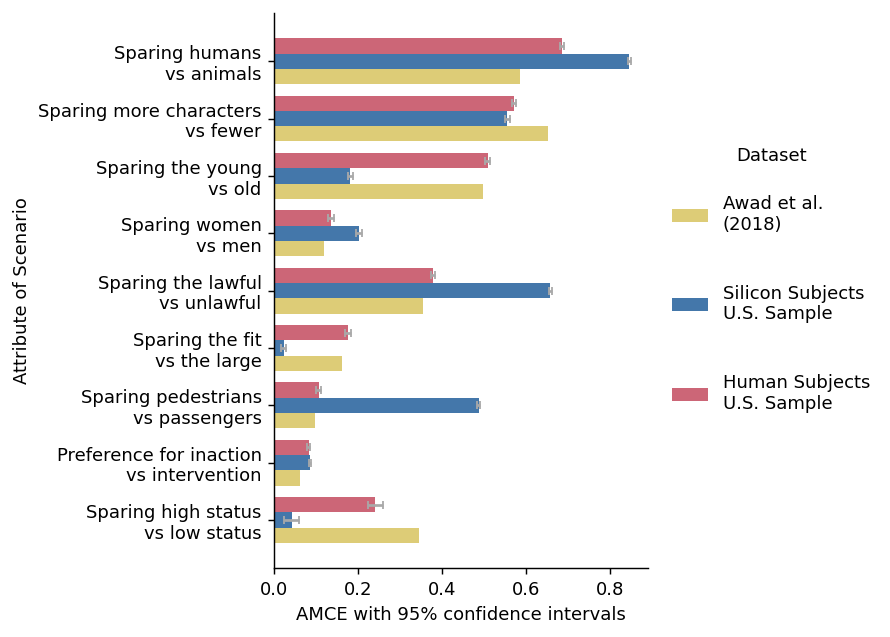

Saved: Figures/4_AMCEs.pdf


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.dpi": 130, "axes.spines.top": False, "axes.spines.right": False})
os.makedirs("Figures", exist_ok=True)

# --- Load data (edit this) ---
FNAME = "3_gpt4turbo_wp_20241118.csv.gz"
# Option A: set explicit path (recommended in Colab):
DATA_PATH = None  # e.g. "/content/3_gpt4turbo_wp_20241118.csv.gz"

# Option B: search recursively under current directory:
path = get_filepath(FNAME, search_root=".") if DATA_PATH is None else DATA_PATH
print("Reading:", path)

gpt4t = pd.read_csv(path, compression="infer")
gpt4t = preprocess_profiles(gpt4t)

for col in ["Saved", "gpt4turbo_wp_Saved"]:
    if col in gpt4t.columns:
        print(f"NA count for {col}: {gpt4t[col].isna().sum()}")

# --- AMCEs ---
main_saved = calculate_amce(gpt4t, "Saved")
main_gpt4 = calculate_amce(gpt4t, "gpt4turbo_wp_Saved")

main_saved.round(3).to_csv("4_AmceParamsSimulationR.csv", index=False)
print("Saved: 4_AmceParamsSimulationR.csv")

main_awad = pd.DataFrame({
    "amce": [0.061, 0.097, 0.353, 0.119, 0.160, 0.345, 0.497, 0.651, 0.585],
    "label": ["Intervention","Barrier","CrossingSignal","Gender","Fitness","Social Status","Age","Utilitarian","Species"],
})
main_awad["dv"] = "Awad2018"
main_awad["se"] = np.nan
main_awad["conf.low"] = np.nan
main_awad["conf.high"] = np.nan
main_awad = main_awad[["label","dv","amce","se","conf.low","conf.high"]]

# --- Plot setup (same labels/colors as R script) ---
colors = pd.DataFrame({
    "Variable": ["Species","Utilitarian","Age","Gender","CrossingSignal","Fitness","Barrier","Intervention","Social Status"],
    "Code": ["#FFBC79FF","#A3CCE9FF","#1170AAFF","#5FA2CEFF","#FC7D0BFF","#57606CFF","#C8D0D9FF","#C85200FF","#7B848FFF"],
    "Label": [
        "Sparing humans\nvs animals",
        "Sparing more characters\nvs fewer",
        "Sparing the young\nvs old",
        "Sparing women\nvs men",
        "Sparing the lawful\nvs unlawful",
        "Sparing the fit\nvs the large",
        "Sparing pedestrians\nvs passengers",
        "Preference for inaction\nvs intervention",
        "Sparing high status\nvs low status",
    ],
})

cols = pd.DataFrame({
    "dv": ["Awad2018","gpt4turbo_wp_Saved","Saved"],
    "Color": ["#DDCC77","#4477AA","#CC6677"],
    "Label": [" \nAwad et al.\n(2018)\n "," \nSilicon Subjects\nU.S. Sample\n"," \nHuman Subjects\nU.S. Sample\n "],
})

amces = pd.concat([main_saved, main_awad, main_gpt4], ignore_index=True)

# R: label factor uses colors$Variable reversed, with labels reversed
var_rev = list(reversed(colors["Variable"].tolist()))
lab_rev = list(reversed(colors["Label"].tolist()))
mapping = dict(zip(var_rev, lab_rev))

amces["label_pretty"] = amces["label"].map(mapping)
amces = amces[amces["label_pretty"].notna()].copy()
amces["label_pretty"] = pd.Categorical(amces["label_pretty"], categories=lab_rev, ordered=True)
amces["dv"] = pd.Categorical(amces["dv"], categories=cols["dv"].tolist(), ordered=True)
amces = amces.sort_values(["label_pretty","dv"])

# --- Matplotlib grouped horizontal bars + CIs ---
fig, ax = plt.subplots(figsize=(7, 5))

y_cats = amces["label_pretty"].cat.categories.tolist()
n_groups = len(cols)
bar_h = 0.8
group_h = bar_h / n_groups
y_base = np.arange(len(y_cats))

for gi, dv in enumerate(cols["dv"].tolist()):
    sub = amces[amces["dv"] == dv].set_index("label_pretty").reindex(y_cats)
    y = y_base - bar_h/2 + (gi + 0.5) * group_h
    ax.barh(y, sub["amce"].to_numpy(), height=group_h, color=cols.loc[gi, "Color"], label=cols.loc[gi, "Label"])

    lo = sub["conf.low"].to_numpy()
    hi = sub["conf.high"].to_numpy()
    xerr = np.vstack([sub["amce"].to_numpy() - lo, hi - sub["amce"].to_numpy()])
    mask = np.isfinite(xerr).all(axis=0)
    if mask.any():
        ax.errorbar(sub["amce"].to_numpy()[mask], y[mask], xerr=xerr[:, mask],
                    fmt="none", ecolor="darkgrey", capsize=2)

ax.set_yticks(y_base)
ax.set_yticklabels(y_cats)
ax.set_xlabel("AMCE with 95% confidence intervals")
ax.set_ylabel("Attribute of Scenario")
ax.axvline(0, linewidth=1)
ax.legend(title="Dataset", loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.tight_layout()
out_pdf = "Figures/4_AMCEs.pdf"
plt.savefig(out_pdf, bbox_inches="tight")
plt.show()
print("Saved:", out_pdf)

The figure shows the estimated causal effects of scenario attributes on participants' decision to save
characters. We compare three sets of AMCE estimates.

**Human subjects U.S. sample (red):** We estimate AMCEs based on 1,163,962 decisions from a sample of
U.S. respondents. These estimates represent the human subjects approach and serve as the ground truth
for our simulation.

**Silicon Subjects Approach (blue):** We compute AMCEs based on the 1,163,962 decisions predicted by
GPT4-Turbo, representing the silicon subjects approach. While this method yields AMCEs similar to
the human subjects approach in some instances, the LLM-derived AMCEs often differ notably.

**Human subjects across countries (yellow):** For completeness, we also present the AMCEs reported by
Awad et al. (2018). These estimates are based on a sample from multiple countries. Therefore, the
estimates are not expected to align perfectly with those from the sample of U.S. respondents (red).
However, the observed differences are generally small.

In [ ]:
df = pd.read_csv("3_gpt4turbo_wp_20241118.csv.gz",
                 dtype={'UserID':'string', 'ResponseID':'string'})

Covs = ['PedPed', 'Barrier', 'CrossingSignal', 'NumberOfCharacters',
        'DiffNumberOFCharacters', 'LeftHand', 'Man', 'Woman', 'Pregnant',
        'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless',
        'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive',
        'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor',
        'MaleDoctor', 'Dog', 'Cat',
        'Intervention'
        ]

sys.version

'3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]'

In [ ]:
print("Number of respondents: ", len(df["UserID"].unique()))
print("Number of scenarios: ", len(df["ResponseID"].unique()))
print("Number of options per scenario: ", df["ResponseID"].value_counts().unique()[0])
print("Avg. number of scenarios per respondent: ", round(df.groupby("UserID")["ResponseID"].count().mean()/2,1))
print("Number of rows:", df.shape[0])
print("Number of NAs in observed dependent variable: ", df["Saved"].isna().sum())
print("Number of NAs in predicted dependent variable with GPT4 Turbo: ", df["gpt4turbo_wp_Saved"].isna().sum())

Number of respondents:  55890
Number of scenarios:  581981
Number of options per scenario:  2
Avg. number of scenarios per respondent:  10.4
Number of rows: 1163962
Number of NAs in observed dependent variable:  0
Number of NAs in predicted dependent variable with GPT4 Turbo:  0


In [ ]:
amce_human_subjects = pd.concat([
    compute_amce(df, x="Intervention", y="Saved"),
    compute_amce(df, x="Barrier", y="Saved"),
    compute_amce(df, x="Gender", y="Saved"),
    compute_amce(df, x="Fitness", y="Saved"),
    compute_amce(df, x="Social Status", y="Saved"),
    compute_amce(df, x="CrossingSignal",y="Saved"),
    compute_amce(df, x="Age", y="Saved"),
    compute_amce(df, x="Utilitarian", y="Saved"),
    compute_amce(df, x="Species", y="Saved")
])
amce_human_subjects.round(3)

,x,y,beta,se,lower,upper
0,Intervention,Saved,0.081,0.002,0.078,0.084
0,Barrier,Saved,0.105,0.003,0.100,0.111
0,Gender,Saved,0.135,0.003,0.129,0.142
0,Fitness,Saved,0.176,0.004,0.169,0.183
0,Social Status,Saved,0.240,0.009,0.222,0.258
0,CrossingSignal,Saved,0.378,0.003,0.372,0.383
0,Age,Saved,0.508,0.003,0.501,0.514
0,Utilitarian,Saved,0.571,0.003,0.565,0.576
0,Species,Saved,0.684,0.003,0.679,0.690


The AMCE estimates above are the same as those calculated with the R functions by Awad et al. (2018), see object `main.Saved` and `4_AmceParamsSimulationR.csv.tar` created in the R script `4_ComputeGroundTruthAMCE.R`. Hence, the Python functions defined in this notebook give the same results as the functions defined in the original article.

We use these AMCEs computed on the human subjects as the 'ground truth' in our simulation.

### Estimate PPI correlation

Below we estimate the PPI correlation with a large number of human subjects.

In [ ]:
n = 1000000
N = df.shape[0] - n

# Sample decisions for human subjects sample
df_human = df.sample(n=n, replace = False, random_state=2024)

# Drop these decisions from the full dataset
df_remaining = df.drop(df_human.index)

# Sample decisions for silicon sample
df_silicon = df_remaining.sample(n=N, replace = False, random_state=2024)

model = "gpt4turbo_wp_Saved"

results = pd.concat([
    compute_amce_ppi(df_human, df_silicon, x="Intervention", y=model),
    compute_amce_ppi(df_human, df_silicon, x="Barrier", y=model),
    compute_amce_ppi(df_human, df_silicon, x="Gender", y=model),
    compute_amce_ppi(df_human, df_silicon, x="Fitness", y=model),
    compute_amce_ppi(df_human, df_silicon, x="Social Status", y=model),
    compute_amce_ppi(df_human, df_silicon, x="CrossingSignal",y=model),
    compute_amce_ppi(df_human, df_silicon, x="Age", y=model),
    compute_amce_ppi(df_human, df_silicon, x="Utilitarian", y=model),
    compute_amce_ppi(df_human, df_silicon, x="Species", y=model)
],ignore_index=True)

# Add sample sizes to the results
results["n"] = n
results["N"] = N

results.to_csv("5_rho.csv", index=False)
results

,y,x,beta_ppi,beta_hum,beta_sil,beta_sil_sm,se_ppi,se_hum,se_sil,lower_ppi,upper_ppi,lower_hum,upper_hum,lower_sil,upper_sil,ppi_corr,n,N
0,gpt4turbo_wp_Saved,Intervention,0.081381,0.081581,0.081985,0.081985,0.001163,0.001173,0.002817,0.079101,0.083660,0.079282,0.083881,0.076464,0.087507,0.352677,1000000,163962
1,gpt4turbo_wp_Saved,Barrier,0.105810,0.105930,0.484486,0.484486,0.001757,0.001768,0.003702,0.102366,0.109254,0.102464,0.109396,0.477231,0.491741,0.314138,1000000,163962
2,gpt4turbo_wp_Saved,Gender,0.134010,0.134204,0.197077,0.197077,0.002694,0.002707,0.006378,0.128728,0.139289,0.128897,0.139510,0.184577,0.209576,0.262760,1000000,163962
3,gpt4turbo_wp_Saved,Fitness,0.174661,0.174951,0.016098,0.016098,0.002823,0.002839,0.006787,0.169130,0.180196,0.169386,0.180516,0.002797,0.029399,0.283120,1000000,163962
4,gpt4turbo_wp_Saved,Social Status,0.248259,0.248827,0.026267,0.026267,0.007595,0.007623,0.018429,0.233386,0.263158,0.233887,0.263767,-0.009853,0.062387,0.229833,1000000,163962
5,gpt4turbo_wp_Saved,CrossingSignal,0.378954,0.378903,0.657856,0.657856,0.001954,0.001967,0.003958,0.375125,0.382783,0.375048,0.382759,0.650100,0.665613,0.308987,1000000,163962
6,gpt4turbo_wp_Saved,Age,0.506392,0.506359,0.182285,0.182285,0.002440,0.002446,0.006541,0.501611,0.511174,0.501564,0.511154,0.169465,0.195105,0.198339,1000000,163962
7,gpt4turbo_wp_Saved,Utilitarian,0.572248,0.572312,0.552874,0.552874,0.002256,0.002262,0.005516,0.567826,0.576670,0.567878,0.576746,0.542063,0.563686,0.191972,1000000,163962
8,gpt4turbo_wp_Saved,Species,0.684679,0.684791,0.833830,0.833830,0.002011,0.002011,0.003904,0.680738,0.688620,0.680849,0.688733,0.826178,0.841482,0.049155,1000000,163962


### Simulation

Next, we vary the number of human subjects and silicon subjects in a simulation. This simulation takes about 40 min. If you don't have time, skip this section. We have the results dataset prepared for you already.

In [ ]:
from multiprocessing import Pool

# Initialize multiprocessing Pool
num_cores = 9

# structural attributes of scenarios
Xs_structural  = ['Intervention', 'Barrier', 'CrossingSignal']

# attributes of characters
Xs_characters = ['Gender', 'Fitness', 'Social Status', 'Age', 'Utilitarian', 'Species']

# all attributes
Xs = Xs_structural + Xs_characters

with Pool(processes=num_cores) as pool:

    # Map the process_predictor function to all predictors
    results = pool.map(loop_attribute, Xs)

# Combine all results into a single DataFrame
result = pd.concat(results, ignore_index=True)

Scenario attribute: CrossingSignalScenario attribute: InterventionScenario attribute: BarrierScenario attribute: GenderScenario attribute: FitnessScenario attribute: Social Status
Scenario attribute: Age
Scenario attribute: Utilitarian





Scenario attribute: Species
    Silicon sample size: 1000
    Silicon sample size: 2500
    Silicon sample size: 5000
    Silicon sample size: 7500
    Silicon sample size: 10000
    Silicon sample size: 15000
    Silicon sample size: 20000


Process ForkPoolWorker-48:
Process ForkPoolWorker-47:
Process ForkPoolWorker-49:
Process ForkPoolWorker-46:
Process ForkPoolWorker-51:
Process ForkPoolWorker-53:
Process ForkPoolWorker-50:
Process ForkPoolWorker-52:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.12/multiprocessing/process.py", li

KeyboardInterrupt: 

We benchmark the silicon subjects design and the mixed subjects design against a human subjects approach.

In [ ]:
# subset point estimates of AMCEs from the entire human subjects sample
benchmark = amce_human_subjects.loc[:, ['x', 'beta']].rename(columns={'beta': 'param'})

# merge benchmark with results from simulation
result_wb = pd.merge(result, benchmark, on='x', how='left')

# report if true value is within the confidence interval from the mixed subjects
result_wb['coverage_ppi'] = (
    (result_wb['lower_ppi'] <= result_wb['param']) &
    (result_wb['param'] <= result_wb['upper_ppi'])
).astype(int)

# report if true value is within the confidence interval from the silicon subjects
result_wb['coverage_sil'] = (
    (result_wb['lower_sil'] <= result_wb['param']) &
    (result_wb['param'] <= result_wb['upper_sil'])
).astype(int)

# report if true value is within the confidence interval from the silicon subjects
result_wb['coverage_hum'] = (
    (result_wb['lower_hum'] <= result_wb['param']) &
    (result_wb['param'] <= result_wb['upper_hum'])
).astype(int)

result_wb

In [ ]:
# Group by n, N, and LLM then calculate mean across repetitions
vars = ['beta_ppi','se_ppi','lower_ppi','upper_ppi','coverage_ppi','ppi_corr',
        'beta_sil','se_sil','lower_sil','upper_sil','coverage_sil',
        'beta_hum','se_hum','lower_hum','upper_hum','coverage_hum']

summ = result_wb.groupby(['n','N','y','x','param'])[vars].mean().reset_index()

# Calculate bias columns
summ['bias_ppi'] = summ['beta_ppi'] - summ['param']
summ['bias_sil'] = summ['beta_sil'] - summ['param']
summ['bias_hum'] = summ['beta_hum'] - summ['param']

summ['rmse_ppi'] = np.sqrt(summ['bias_ppi']**2 + summ['se_ppi']**2)
summ['rmse_sil'] = np.sqrt(summ['bias_sil']**2 + summ['se_sil']**2)
summ['rmse_hum'] = np.sqrt(summ['bias_hum']**2 + summ['se_hum']**2)

# Save averaged simulation results to compressed csv file
summ.to_csv("5_ResultsPPI_coord1.csv.gz", compression="gzip", index=False)
summ

NameError: name 'result_wb' is not defined

## Compute Pearson correlation between predicted and observed outcomes

In [ ]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec

plt.rcParams.update({
    "figure.dpi": 130,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

os.makedirs("Figures", exist_ok=True)


def get_filepath(fname: str, search_root: str = ".") -> str:
    """Recursive file finder like your R get_filepath()."""
    pattern = os.path.join(search_root, "**", fname)
    matches = glob.glob(pattern, recursive=True)
    if not matches:
        raise FileNotFoundError(f"Could not find file ending with '{fname}' under '{search_root}'.")
    if len(matches) > 1:
        print(f"Warning: more than one match for {fname}. Using the first:\n  {matches[0]}")
    return matches[0]


def comma_fmt(x, pos=None):
    try:
        return f"{int(x):,}"
    except Exception:
        return str(x)

def pct_fmt_0to100(x, pos=None):
    return f"{x:.0f}%"

def pct_fmt_0to1(x, pos=None):
    return f"{100*x:.0f}%"

def format_rho(r):
    # Matches R formatting: round(3), drop leading 0, pad to 4 chars like ".500"
    s = f"{r:.3f}"
    if s.startswith("0."):
        s = "." + s[2:]
    if len(s) == 3:
        s = s + "0"
    return s

def label_rho(label: str, ppi_corr: float) -> str:
    # Matplotlib mathtext: \tilde{\rho}
    return f"{label} ($\\tilde{{\\rho}}={format_rho(ppi_corr)}$)"


# A mapping from your ggplot linetype labels to matplotlib dash patterns.
# You can tweak these if you want closer visual parity.
LINETYPE_MAP = {
    "solid": "solid",
    "dashed": "dashed",
    "longdash": (0, (10, 4)),
    "dotdash": (0, (6, 3, 1.5, 3)),
    "twodash": (0, (6, 2, 6, 6)),
    "2222": (0, (2, 2, 2, 2)),
    "F1": (0, (1, 1)),
    "F5": (0, (5, 2)),
    "F9": (0, (9, 2)),
}

In [ ]:
# ============================================
# 1) Load data (LLM moral machine samples)
# ============================================
gpt4t = pd.read_csv(get_filepath("3_gpt4turbo_wp_20241118.csv.gz"), compression="infer")
gpt4o = pd.read_csv(get_filepath("3_gpt4o_wp_20240603.csv.gz"), compression="infer")
gpt35 = pd.read_csv(get_filepath("3_gpt35turbo0125_wp_20240603.csv.gz"), compression="infer")

In [ ]:
# ============================================
# 2) Pearson correlations between Saved and LLM Saved columns
# ============================================
def pearson_corr(df: pd.DataFrame) -> pd.DataFrame:
    # R: pivot_longer(cols=matches(".Saved"))
    # In practice you likely want predicted columns like "*_Saved" and exclude the human "Saved"
    saved_cols = [c for c in df.columns if ("Saved" in c) and (c != "Saved")]
    # If your dataset includes other Saved-like columns, tighten this to c.endswith("_Saved")
    # saved_cols = [c for c in df.columns if c.endswith("_Saved") and c != "Saved"]

    tmp = df[["Saved"] + saved_cols].copy()
    # ensure numeric
    tmp["Saved"] = pd.to_numeric(tmp["Saved"], errors="coerce")
    for c in saved_cols:
        tmp[c] = pd.to_numeric(tmp[c], errors="coerce")

    long = tmp.melt(id_vars=["Saved"], value_vars=saved_cols, var_name="LLM", value_name="LLMSaved")

    out_rows = []
    for llm, sub in long.groupby("LLM", dropna=False):
        # complete.obs: keep rows where both are non-missing
        sub2 = sub.dropna(subset=["Saved", "LLMSaved"])
        nrows = len(sub2)
        r = np.corrcoef(sub2["Saved"], sub2["LLMSaved"])[0, 1] if nrows > 1 else np.nan
        out_rows.append({"LLM": llm, "nrows": nrows, "r_corr": r})
    return pd.DataFrame(out_rows)

corr = pd.concat([pearson_corr(gpt4t), pearson_corr(gpt4o), pearson_corr(gpt35)], ignore_index=True)

corr["LLM"] = corr["LLM"].replace({
    "gpt4turbo_wp_Saved": "gpt-4-turbo",
    "gpt4o_wp_Saved": "gpt-4o",
    "gpt35turbo0125_wp_Saved": "gpt-3.5-turbo-0125",
})
corr["r_corr"] = corr["r_corr"].round(3)
corr = corr.sort_values("r_corr", ascending=False)

llms = pd.DataFrame({
    "LLM": ["gpt-4-turbo", "gpt-4o", "gpt-3.5-turbo-0125"],
    "Context_window": ["128,000 tokens", "128,000 tokens", "16,385 tokens"],
    "Training_data": ["Up to Dec 2023", "Up to Oct 2023", "Up to Sep 2021"],
    "Input_cost_1K_tokens": [0.010, 0.005, 0.0005],
    "Output_cost_1K_tokens": [0.030, 0.015, 0.0015],
})

corr_llms = llms.merge(corr, on="LLM", how="left")
display(corr_llms)

# Write LaTeX table similar to kable (no collapse_rows here)
latex_path = os.path.join("Figures", "6_CorrelationTable.tex")
corr_llms_for_tex = corr_llms.copy()
# Optional rename to mirror your column names
corr_llms_for_tex = corr_llms_for_tex.rename(columns={
    "nrows": "N+n",
    "Context_window": "Context window",
    "Training_data": "Training data",
    "Input_cost_1K_tokens": "Input cost 1K tokens",
    "Output_cost_1K_tokens": "Output cost 1K tokens",
    "r_corr": "Correlation",
})
with open(latex_path, "w") as f:
    f.write(corr_llms_for_tex.to_latex(index=False, escape=False))
print("Wrote:", latex_path)

,LLM,Context_window,Training_data,Input_cost_1K_tokens,Output_cost_1K_tokens,nrows,r_corr
0,gpt-4-turbo,"128,000 tokens",Up to Dec 2023,0.0100,0.0300,1163962,0.358
1,gpt-4o,"128,000 tokens",Up to Oct 2023,0.0050,0.0150,44624,0.311
2,gpt-3.5-turbo-0125,"16,385 tokens",Up to Sep 2021,0.0005,0.0015,44628,0.113


Wrote: Figures/6_CorrelationTable.tex


In [ ]:
# ============================================
# 3) Load simulation results + rhos + build long tables
# ============================================
rhos = pd.read_csv(get_filepath("5_rho.csv"), compression="infer")  # expects columns: x, ppi_corr

colors = pd.DataFrame({
    "Variable": ["Species","Social Status","Utilitarian","Age","Gender","Fitness","CrossingSignal","Barrier","Intervention"],
    "Code": ["#FFBC79FF","#7B848FFF","#A3CCE9FF","#1170AAFF","#5FA2CEFF","#57606CFF","#FC7D0BFF","#C8D0D9FF","#C85200FF"],
    "Label": [
        "Sparing humans vs animals",
        "Sparing high status vs low status",
        "Sparing more characters vs fewer",
        "Sparing the young vs old",
        "Sparing women vs men",
        "Sparing the fit vs the large",
        "Sparing the lawful vs unlawful",
        "Sparing pedestrians vs passengers",
        "Preference for inaction vs intervention",
    ],
    "Linetype": ["solid","F1","F5","F9","longdash","dotdash","2222","twodash","dashed"]
})

# join rho and order by ppi_corr ascending like your R
colors = colors.merge(rhos, left_on="Variable", right_on="x", how="left")
colors = colors.sort_values("ppi_corr")
colors["Label"] = [label_rho(lab, rho) if pd.notna(rho) else lab for lab, rho in zip(colors["Label"], colors["ppi_corr"])]

fct_levels = colors["Variable"].tolist()  # ordered by ppi_corr
var_to_color = dict(zip(colors["Variable"], colors["Code"]))
var_to_ls = {v: LINETYPE_MAP.get(lt, "solid") for v, lt in zip(colors["Variable"], colors["Linetype"])}
var_to_label = dict(zip(colors["Variable"], colors["Label"]))

dd = pd.read_csv(get_filepath("5_ResultsPPI_coord1.csv.gz"), compression="infer")

dd["ratio_ppi_hum_se"] = dd["se_ppi"] / dd["se_hum"]
dd["ratio_sil_hum_se"] = dd["se_sil"] / dd["se_hum"]

# bias long
db = dd.melt(
    id_vars=[c for c in dd.columns if c not in ["bias_ppi", "bias_sil"]],
    value_vars=["bias_ppi", "bias_sil"],
    var_name="method",
    value_name="bias"
)
db["method"] = db["method"].str.extract("(ppi|sil)")[0]

# precision long
dp = dd.melt(
    id_vars=[c for c in dd.columns if c not in ["ratio_sil_hum_se", "ratio_ppi_hum_se"]],
    value_vars=["ratio_sil_hum_se", "ratio_ppi_hum_se"],
    var_name="method",
    value_name="ratio"
)
dp["method"] = dp["method"].str.extract("(ppi|sil)")[0]

# coverage long
dc = dd.melt(
    id_vars=[c for c in dd.columns if c not in ["coverage_ppi", "coverage_sil"]],
    value_vars=["coverage_ppi", "coverage_sil"],
    var_name="method",
    value_name="coverage"
)
dc["method"] = dc["method"].str.extract("(ppi|sil)")[0]

In [ ]:
# ============================================
# 4) Diagnostics like your "max_bias"
# ============================================
max_bias_sil = db[db["method"] == "sil"].iloc[(db[db["method"] == "sil"]["bias"].abs()).argmax()]
print("Max |bias| (sil):", float(max_bias_sil["bias"]))
print("As % of DV range [0,1]:", round(100 * float(max_bias_sil["bias"]) / 1.0, 1), "%")
if "beta_sil" in max_bias_sil:
    print("|beta_sil|:", round(abs(float(max_bias_sil["beta_sil"])), 2))
if "param" in max_bias_sil:
    print("|param|:", round(abs(float(max_bias_sil["param"])), 2))
    if float(max_bias_sil["param"]) != 0:
        print("% of |param|:", round(100 * abs(float(max_bias_sil["bias"])) / abs(float(max_bias_sil["param"])), 0), "%")

Max |bias| (sil): 0.383106834666135
As % of DV range [0,1]: 38.3 %
|beta_sil|: 0.49
|param|: 0.11
% of |param|: 363.0 %


We found that bias in silicon sampling can be
as large as 38.3% of the total scale of the variable, which ranges from zero (harm) to one (save). Large
biases are particularly consequential if the underlying effect is small. While the silicon subject estimate
suggests that there is a 49 percentage point difference in the preference to spare pedestrians rather than
passengers, the ground truth AMCE indicates that this preference amounts to only 11 percentage points.
This bias corresponds to about 363% of the original effect.

In [ ]:
# ============================================
# 5) Plot helpers for the 3x2 patchwork equivalent
# ============================================
def plot_lines(ax, df, xcol, ycol, method_value, ylabel, xlabel, y_limits=None, hline=None, y_as_percent_0to100=False):
    sub = df[df["method"] == method_value].copy()

    # ensure ordering by N
    if "N" in sub.columns:
        sub = sub.sort_values("N")

    # plot each variable x with distinct linestyle
    for var in fct_levels:
        dvar = sub[sub["x"] == var]
        if dvar.empty:
            continue
        ax.plot(
            dvar[xcol], dvar[ycol],
            color=var_to_color.get(var, None),
            linestyle=var_to_ls.get(var, "solid"),
            linewidth=1.6,
            label=var_to_label.get(var, var),
        )

    if hline is not None:
        ax.axhline(hline, color="darkgrey", linestyle="dotted", linewidth=1)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_major_formatter(FuncFormatter(comma_fmt))

    if y_limits is not None:
        ax.set_ylim(*y_limits)

    if y_as_percent_0to100:
        ax.yaxis.set_major_formatter(FuncFormatter(pct_fmt_0to100))

    ax.grid(True, which="major", linewidth=0.2)
    ax.grid(True, which="minor", linewidth=0.1)

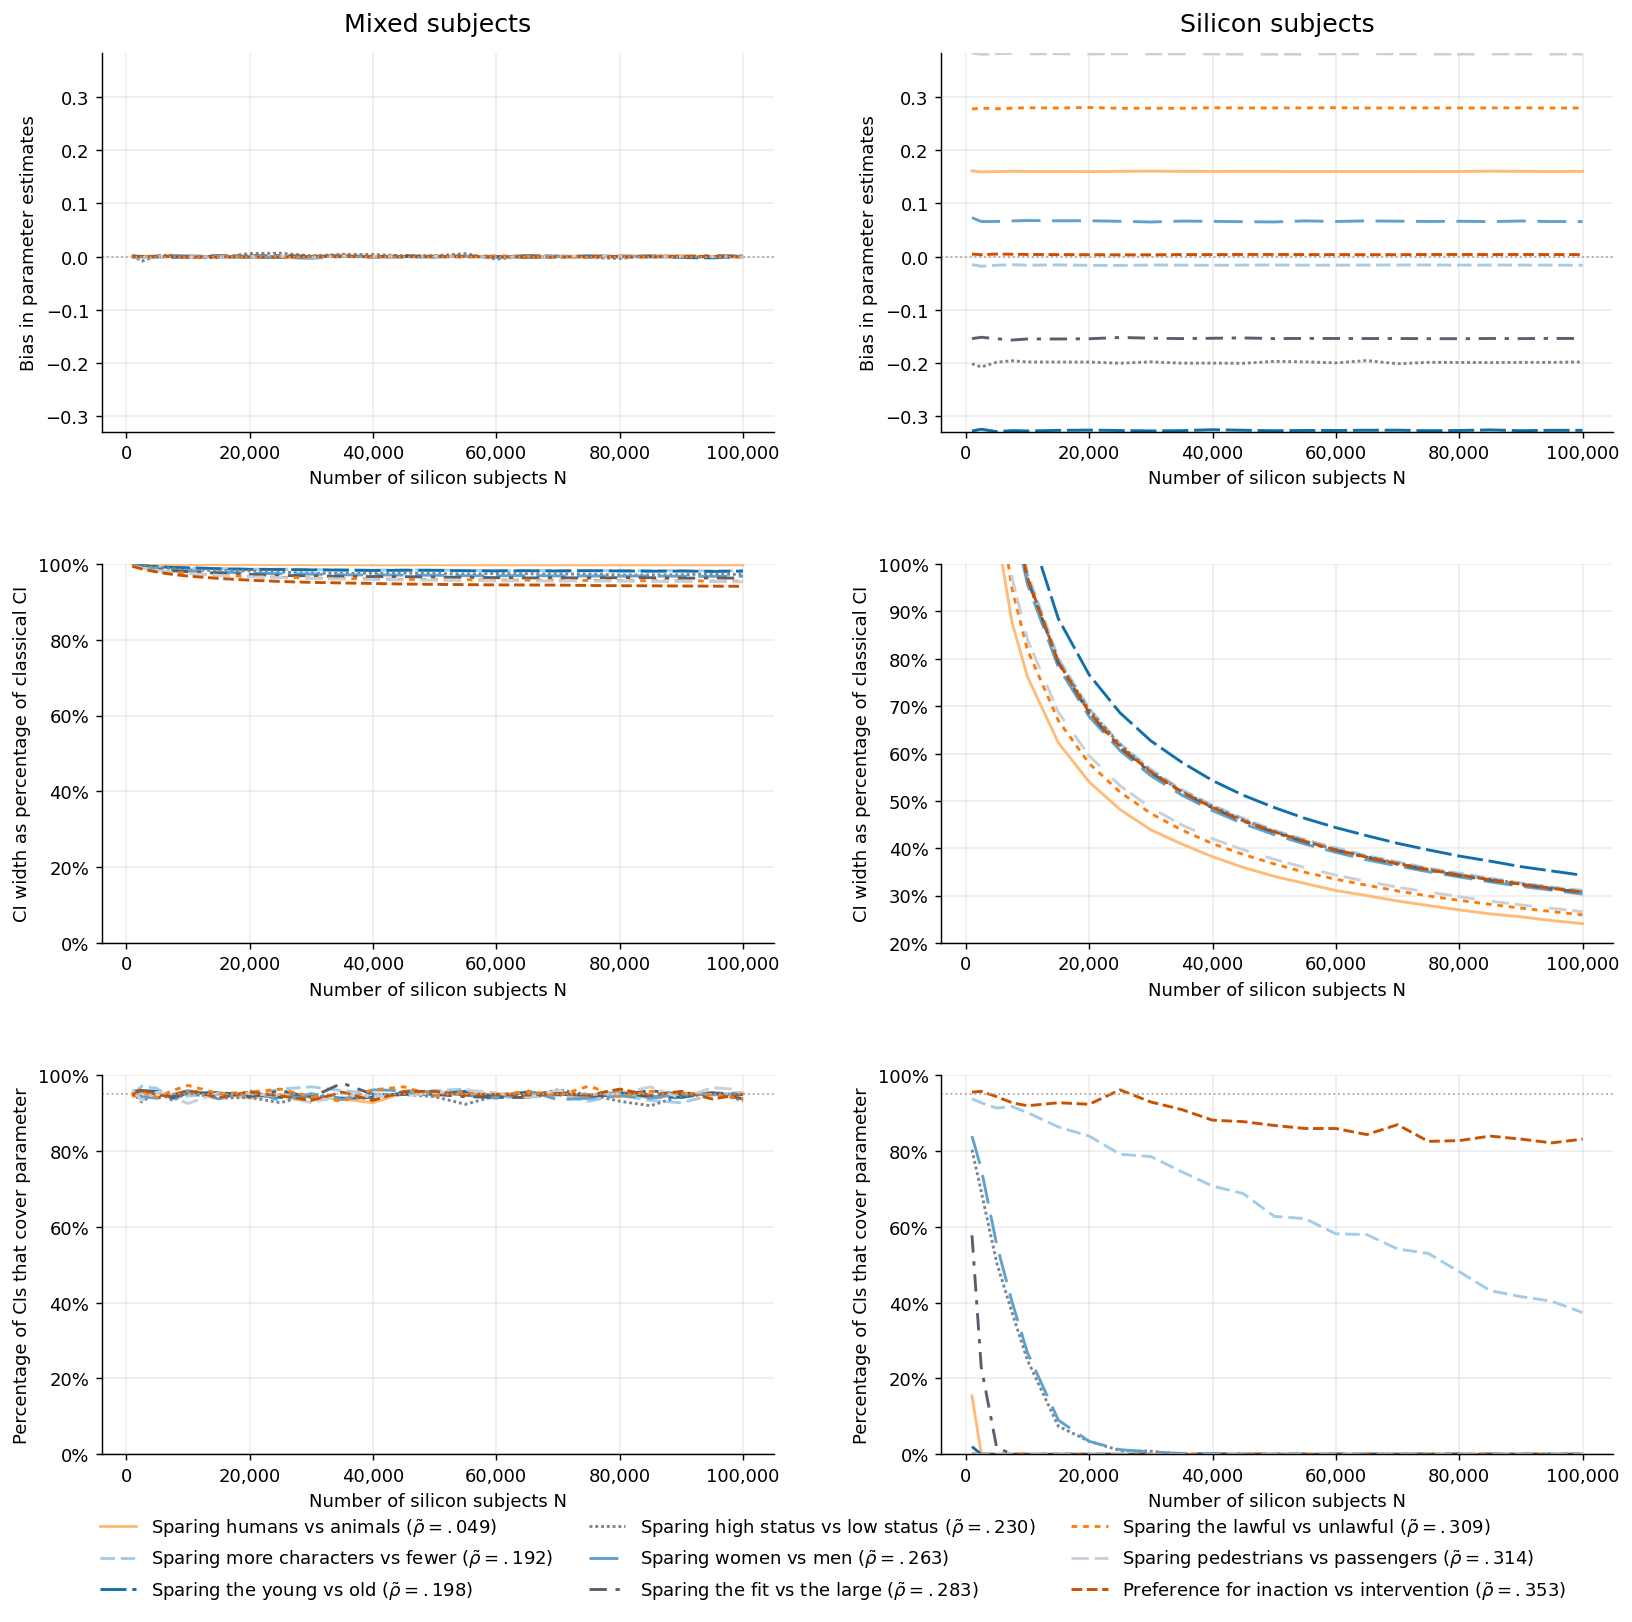

Saved: Figures/6_SimulationResults.pdf


In [ ]:
# ============================================
# 6) Build the 3x2 combined figure (Bias / Precision / Coverage) × (PPI / Silicon)
# ============================================
# Establish common y-limits for bias like R: limits = c(min(db$bias), max(db$bias))
bias_min, bias_max = float(db["bias"].min()), float(db["bias"].max())

fig = plt.figure(figsize=(15, 14))
gs = GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.25)

ax_b_ppi = fig.add_subplot(gs[0, 0])
ax_b_sil = fig.add_subplot(gs[0, 1])
ax_p_ppi = fig.add_subplot(gs[1, 0])
ax_p_sil = fig.add_subplot(gs[1, 1])
ax_c_ppi = fig.add_subplot(gs[2, 0])
ax_c_sil = fig.add_subplot(gs[2, 1])

# Bias plots
plot_lines(
    ax_b_ppi, db, xcol="N", ycol="bias", method_value="ppi",
    ylabel="Bias in parameter estimates", xlabel="Number of silicon subjects N",
    y_limits=(bias_min, bias_max), hline=0, y_as_percent_0to100=False
)
plot_lines(
    ax_b_sil, db, xcol="N", ycol="bias", method_value="sil",
    ylabel="Bias in parameter estimates", xlabel="Number of silicon subjects N",
    y_limits=(bias_min, bias_max), hline=0, y_as_percent_0to100=False
)

# Precision plots (y = 100*ratio, cap at 100 like coord_cartesian)
dp2 = dp.copy()
dp2["ratio_pct"] = 100 * dp2["ratio"]
plot_lines(
    ax_p_ppi, dp2, xcol="N", ycol="ratio_pct", method_value="ppi",
    ylabel="CI width as percentage of classical CI", xlabel="Number of silicon subjects N",
    y_limits=(0, 100), hline=None, y_as_percent_0to100=True
)
plot_lines(
    ax_p_sil, dp2, xcol="N", ycol="ratio_pct", method_value="sil",
    ylabel="CI width as percentage of classical CI", xlabel="Number of silicon subjects N",
    y_limits=(20, 100), hline=None, y_as_percent_0to100=True
)

# Coverage plots (y = 100*coverage, hline at 95)
dc2 = dc.copy()
dc2["cov_pct"] = 100 * dc2["coverage"]
plot_lines(
    ax_c_ppi, dc2, xcol="N", ycol="cov_pct", method_value="ppi",
    ylabel="Percentage of CIs that cover parameter", xlabel="Number of silicon subjects N",
    y_limits=(0, 100), hline=95, y_as_percent_0to100=True
)
plot_lines(
    ax_c_sil, dc2, xcol="N", ycol="cov_pct", method_value="sil",
    ylabel="Percentage of CIs that cover parameter", xlabel="Number of silicon subjects N",
    y_limits=(0, 100), hline=95, y_as_percent_0to100=True
)

# Column titles (Mixed subjects vs Silicon subjects)
ax_b_ppi.set_title("Mixed subjects", fontsize=14, pad=12)
ax_b_sil.set_title("Silicon subjects", fontsize=14, pad=12)

# Collect a single legend (3 rows-ish)
handles, labels = ax_b_ppi.get_legend_handles_labels()
# Deduplicate while preserving order
seen = set()
uniq = []
for h, l in zip(handles, labels):
    if l not in seen:
        uniq.append((h, l))
        seen.add(l)
handles, labels = zip(*uniq) if uniq else ([], [])

fig.legend(handles, labels, loc="lower center", ncol=3, frameon=False, bbox_to_anchor=(0.5, 0.02))
plt.tight_layout(rect=[0, 0.06, 1, 1])

out_sim = os.path.join("Figures", "6_SimulationResults.pdf")
plt.savefig(out_sim, bbox_inches="tight")
plt.show()
print("Saved:", out_sim)

We now comment on our findings on the precision of parameter estimates in the mixed subjects and
silicon subjects design (Figure c and d). We confirm that the degree to which LLM predictions reduce
the width of confidence intervals depends greatly on the PPI correlation. We find that LLM predictions
of decisions to moral dilemmas from GPT-4 Turbo are mostly not interchangeable with observed decisions
from survey respondents—the PPI correlation ranged from 0.049 to 0.353 for the nine different
scenario characteristics. As a result of this modest interchangeability, complementing the 10,000 human
observations with 100,000 LLM predictions results in an effective sample size of at most 11,275.

In contrast, Figure d shows that the silicon subjects design first gives a wider confidence interval than
the human subjects design. The confidence intervals for the silicon subjects become increasingly narrow
as the sample size increases. Overly narrow confidence intervals give a false sense
of precision if the estimates are biased.

Figure e shows that PPI, unlike the estimates derived from silicon subjects alone, maintains a nominal
coverage rate of 95%. PPI therefore correctly quantifies uncertainty about the true population parameter.
Figure f demonstrates that none of the silicon subjects confidence intervals achieve nominal coverage
for larger sample sizes. This lack of coverage results from a combination of bias and overconfidence.
Without an appropriate correction, even small biases cause a lack of coverage, with coverage decreasing
more rapidly for parameter estimates with greater bias.

Finally, Figures b and c demonstrate an interesting property of PPI—bias and interchangeability do
not exclude each other. The attribute with the highest bias in silicon sampling (sparing pedestrians vs
passengers) also achieved the second-highest PPI correlation. As such, biased information from the LLM
can still be useful for increasing precision in PPI.

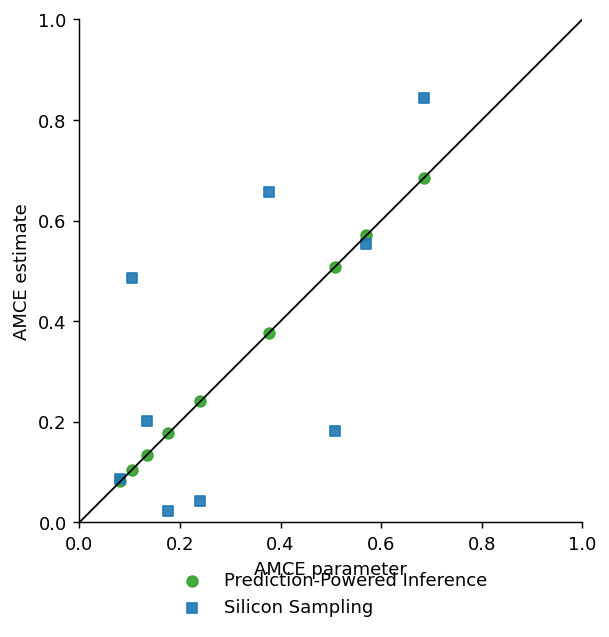

Saved: Figures/6_ScatterplotAMCE.pdf


In [ ]:
# ============================================
# 7) Scatterplot for MME simulation (N == 1e5)
# ============================================
dscatter = dd[dd["N"] == 10**5][["param", "beta_ppi", "beta_sil"]].copy()
dscatter = dscatter.melt(id_vars=["param"], var_name="estimator", value_name="estimate")
dscatter["estimator"] = dscatter["estimator"].replace({
    "beta_ppi": "Prediction-Powered Inference",
    "beta_sil": "Silicon Sampling",
})

custom_colors = {"Silicon Sampling": "#1f78b4", "Prediction-Powered Inference": "#33a02c"}
custom_markers = {"Prediction-Powered Inference": "o", "Silicon Sampling": "s"}

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot([0, 1], [0, 1], color="black", linewidth=1)  # y=x

for est in ["Prediction-Powered Inference", "Silicon Sampling"]:
    sub = dscatter[dscatter["estimator"] == est]
    ax.scatter(
        sub["param"], sub["estimate"],
        s=35,
        color=custom_colors[est],
        marker=custom_markers[est],
        label=est,
        alpha=0.9
    )

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("AMCE parameter")
ax.set_ylabel("AMCE estimate")
ax.set_aspect("equal", adjustable="box")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.22), ncol=1, frameon=False)
plt.tight_layout()

out_sc = os.path.join("Figures", "6_ScatterplotAMCE.pdf")
plt.savefig(out_sc, bbox_inches="tight")
plt.show()
print("Saved:", out_sc)

Here, we clearly show you that mixed subject design enables unbiased ACME estimation!

## Assignment Exercise

**1)** Identify a real or plausible human-subject experiment where adding silicon subjects (LLM-generated responses or model predictions) could meaningfully improve the study.

In your answer, describe:
- Experiment: What is the research question, who are the human participants, and what decisions/labels/outcomes are being collected?
- Where silicon subjects enter: What would the LLM do (e.g., generate predicted responses, label items, simulate judgments, propose ratings), and what would humans do?
- Why mixed-subjects helps: Explain specifically what improves—e.g., lower cost, higher statistical power (effective sample size), broader coverage of stimuli, faster iteration, or reduced measurement noise.
- What must be checked: What assumptions need to hold for this to work (e.g., sufficient correlation between LLM and human outcomes, stable task framing, representativeness of the human-labeled subset), and what could go wrong (bias, domain shift, spurious correlation)?
- A simple design sketch: Provide a minimal plan with n humans, N silicon subjects, and what you would estimate (mean, treatment effect, AMCE, etc.). Include one sentence about how you’d validate the LLM signal (e.g., compute $\tilde{\rho}$ on a holdout set).

**2)** Make the strongest argument for and against using silicon subjects in social-science measurement. Each side gets one paragraph, and each must include at least one statistical point and one ethical point.

**3)** Suppose $n=800$ human labels, $N=8{,}000$ silicon labels, and $\tilde{\rho}=0.7$. Compute the effective sample size $n_0$ using
$n_0=\frac{n(k+1)}{k(1-\tilde{\rho}^2)+1},\quad k=N/n$.
Interpret the result in one sentence.

# Memo Pilot Test

Create a preliminary implementation (pilot) of the research design you outlined in your memo of this week. Use the techniques and frameworks introduced in this assignment to demonstrate how your proposed approach can be operationalized.

<font color="purple">**Reminder:** To complete this week’s off-class work, please fill out the survey using the [link](https://forms.gle/N6wyqTxbzRWGTKtL7). Thank you for your feedback!</font>